# __Tugas Besar 1 Pembelajaran Mesin__

Kelompok 52

Group Member:
- Satriadhikara Panji Yudhistira (13522125)
- Mohammad Andhika Fadillah (13522128)
- Farrel Natha Saskoro (13522145)

## Import Libraries and Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from core.neural_network import NeuralNetwork
from core.loss_functions import (
    CategoricalCrossEntropy,
    BinaryCrossEntropy,
    MeanSquaredError,
)
from core.weight_initializers import (
    ZeroInitializer,
    UniformInitializer,
    NormalInitializer,
    XavierInitializer,
    HeInitializer,
)
from core.activations import (
    Linear,
    Sigmoid,
    ReLU,
    Tanh,
    Softmax,
    Swish,
    GELU,
)


## Setup Dataset

In [2]:
# Load dataset
print("Loading MNIST dataset...")
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target

y = y.astype(np.int8)
X = X.to_numpy()
y = y.to_numpy()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

def to_categorical(y, num_classes=10):
    return np.eye(num_classes)[y]

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

X_train, X_val, y_train_cat, y_val_cat = train_test_split(
    X_train, y_train_cat, test_size=0.2, random_state=42
)

Loading MNIST dataset...


## Base Model

In [3]:
# Test base model
model = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history = model.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred = model.forward(X_test)
pred_classes = np.argmax(pred, axis=1)
accuracy = np.mean(pred_classes == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1199.39it/s]


Epoch 1/50, Train Loss: 1.7809, Val Loss: 1.2668, Val Acc: 0.6997


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1105.47it/s]


Epoch 2/50, Train Loss: 1.0133, Val Loss: 0.8450, Val Acc: 0.7809


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1007.16it/s]


Epoch 3/50, Train Loss: 0.7408, Val Loss: 0.6746, Val Acc: 0.8232


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1289.70it/s]


Epoch 4/50, Train Loss: 0.6139, Val Loss: 0.5818, Val Acc: 0.8447


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1152.16it/s]


Epoch 5/50, Train Loss: 0.5395, Val Loss: 0.5227, Val Acc: 0.8612


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1314.56it/s]


Epoch 6/50, Train Loss: 0.4903, Val Loss: 0.4822, Val Acc: 0.8687


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 903.76it/s]


Epoch 7/50, Train Loss: 0.4553, Val Loss: 0.4530, Val Acc: 0.8748


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1148.88it/s]


Epoch 8/50, Train Loss: 0.4290, Val Loss: 0.4309, Val Acc: 0.8794


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1031.10it/s]


Epoch 9/50, Train Loss: 0.4091, Val Loss: 0.4126, Val Acc: 0.8839


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1199.36it/s]


Epoch 10/50, Train Loss: 0.3929, Val Loss: 0.3988, Val Acc: 0.8866


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1145.70it/s]


Epoch 11/50, Train Loss: 0.3798, Val Loss: 0.3870, Val Acc: 0.8896


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1256.55it/s]


Epoch 12/50, Train Loss: 0.3688, Val Loss: 0.3776, Val Acc: 0.8918


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1273.06it/s]


Epoch 13/50, Train Loss: 0.3596, Val Loss: 0.3682, Val Acc: 0.8944


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1002.54it/s]


Epoch 14/50, Train Loss: 0.3516, Val Loss: 0.3610, Val Acc: 0.8965


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1247.74it/s]


Epoch 15/50, Train Loss: 0.3446, Val Loss: 0.3555, Val Acc: 0.8978


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1225.69it/s]


Epoch 16/50, Train Loss: 0.3383, Val Loss: 0.3496, Val Acc: 0.8992


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1379.32it/s]


Epoch 17/50, Train Loss: 0.3326, Val Loss: 0.3446, Val Acc: 0.8996


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1335.62it/s]


Epoch 18/50, Train Loss: 0.3276, Val Loss: 0.3398, Val Acc: 0.9015


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1412.59it/s]


Epoch 19/50, Train Loss: 0.3231, Val Loss: 0.3346, Val Acc: 0.9022


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1439.12it/s]


Epoch 20/50, Train Loss: 0.3187, Val Loss: 0.3319, Val Acc: 0.9032


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1300.64it/s]


Epoch 21/50, Train Loss: 0.3148, Val Loss: 0.3280, Val Acc: 0.9054


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 976.97it/s]


Epoch 22/50, Train Loss: 0.3111, Val Loss: 0.3249, Val Acc: 0.9055


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1098.16it/s]


Epoch 23/50, Train Loss: 0.3078, Val Loss: 0.3209, Val Acc: 0.9077


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1180.86it/s]


Epoch 24/50, Train Loss: 0.3046, Val Loss: 0.3182, Val Acc: 0.9088


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1194.46it/s]


Epoch 25/50, Train Loss: 0.3015, Val Loss: 0.3149, Val Acc: 0.9109


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1195.13it/s]


Epoch 26/50, Train Loss: 0.2986, Val Loss: 0.3132, Val Acc: 0.9095


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1038.43it/s]


Epoch 27/50, Train Loss: 0.2960, Val Loss: 0.3102, Val Acc: 0.9118


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1186.79it/s]


Epoch 28/50, Train Loss: 0.2934, Val Loss: 0.3077, Val Acc: 0.9129


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1297.27it/s]


Epoch 29/50, Train Loss: 0.2907, Val Loss: 0.3054, Val Acc: 0.9138


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1157.63it/s]


Epoch 30/50, Train Loss: 0.2883, Val Loss: 0.3049, Val Acc: 0.9125


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1067.35it/s]


Epoch 31/50, Train Loss: 0.2861, Val Loss: 0.3011, Val Acc: 0.9148


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1169.92it/s]


Epoch 32/50, Train Loss: 0.2839, Val Loss: 0.2998, Val Acc: 0.9144


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1248.66it/s]


Epoch 33/50, Train Loss: 0.2816, Val Loss: 0.2983, Val Acc: 0.9161


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1377.93it/s]


Epoch 34/50, Train Loss: 0.2797, Val Loss: 0.2966, Val Acc: 0.9161


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1309.05it/s]


Epoch 35/50, Train Loss: 0.2776, Val Loss: 0.2930, Val Acc: 0.9172


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1257.74it/s]


Epoch 36/50, Train Loss: 0.2755, Val Loss: 0.2921, Val Acc: 0.9173


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1160.85it/s]


Epoch 37/50, Train Loss: 0.2736, Val Loss: 0.2913, Val Acc: 0.9166


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1214.26it/s]


Epoch 38/50, Train Loss: 0.2717, Val Loss: 0.2884, Val Acc: 0.9176


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1282.03it/s]


Epoch 39/50, Train Loss: 0.2698, Val Loss: 0.2862, Val Acc: 0.9189


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1199.05it/s]


Epoch 40/50, Train Loss: 0.2680, Val Loss: 0.2853, Val Acc: 0.9194


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 988.82it/s] 


Epoch 41/50, Train Loss: 0.2660, Val Loss: 0.2832, Val Acc: 0.9182


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1150.05it/s]


Epoch 42/50, Train Loss: 0.2643, Val Loss: 0.2816, Val Acc: 0.9206


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 955.27it/s]


Epoch 43/50, Train Loss: 0.2625, Val Loss: 0.2804, Val Acc: 0.9196


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1055.04it/s]


Epoch 44/50, Train Loss: 0.2608, Val Loss: 0.2786, Val Acc: 0.9201


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1156.61it/s]


Epoch 45/50, Train Loss: 0.2591, Val Loss: 0.2776, Val Acc: 0.9200


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1078.45it/s]


Epoch 46/50, Train Loss: 0.2574, Val Loss: 0.2760, Val Acc: 0.9213


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1278.30it/s]


Epoch 47/50, Train Loss: 0.2559, Val Loss: 0.2738, Val Acc: 0.9218


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1358.81it/s]


Epoch 48/50, Train Loss: 0.2541, Val Loss: 0.2724, Val Acc: 0.9224


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1208.13it/s]


Epoch 49/50, Train Loss: 0.2525, Val Loss: 0.2716, Val Acc: 0.9229


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1202.65it/s]


Epoch 50/50, Train Loss: 0.2509, Val Loss: 0.2693, Val Acc: 0.9232
Test Accuracy: 0.9252


## HyperParameter Experiment

### Pengaruh Depth dan Width

#### Variasi pada Depth

Training model depth configurations 1


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1047.78it/s]


Epoch 1/50, Train Loss: 1.8874, Val Loss: 1.3556, Val Acc: 0.6399


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1073.58it/s]


Epoch 2/50, Train Loss: 1.0860, Val Loss: 0.8926, Val Acc: 0.7546


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1340.64it/s]


Epoch 3/50, Train Loss: 0.7663, Val Loss: 0.6903, Val Acc: 0.8113


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1385.84it/s]


Epoch 4/50, Train Loss: 0.6215, Val Loss: 0.5885, Val Acc: 0.8365


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1342.92it/s]


Epoch 5/50, Train Loss: 0.5408, Val Loss: 0.5256, Val Acc: 0.8547


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1344.36it/s]


Epoch 6/50, Train Loss: 0.4875, Val Loss: 0.4788, Val Acc: 0.8656


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1177.87it/s]


Epoch 7/50, Train Loss: 0.4484, Val Loss: 0.4453, Val Acc: 0.8770


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1329.93it/s]


Epoch 8/50, Train Loss: 0.4191, Val Loss: 0.4210, Val Acc: 0.8814


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 828.87it/s] 


Epoch 9/50, Train Loss: 0.3963, Val Loss: 0.4002, Val Acc: 0.8866


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 680.71it/s]


Epoch 10/50, Train Loss: 0.3783, Val Loss: 0.3854, Val Acc: 0.8898


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1174.23it/s]


Epoch 11/50, Train Loss: 0.3634, Val Loss: 0.3705, Val Acc: 0.8945


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1077.77it/s]


Epoch 12/50, Train Loss: 0.3512, Val Loss: 0.3588, Val Acc: 0.8967


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1183.87it/s]


Epoch 13/50, Train Loss: 0.3410, Val Loss: 0.3508, Val Acc: 0.8989


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1138.30it/s]


Epoch 14/50, Train Loss: 0.3319, Val Loss: 0.3416, Val Acc: 0.9030


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 948.42it/s]


Epoch 15/50, Train Loss: 0.3240, Val Loss: 0.3354, Val Acc: 0.9024


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 825.85it/s]


Epoch 16/50, Train Loss: 0.3169, Val Loss: 0.3277, Val Acc: 0.9041


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 771.73it/s]


Epoch 17/50, Train Loss: 0.3107, Val Loss: 0.3224, Val Acc: 0.9073


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 718.91it/s]


Epoch 18/50, Train Loss: 0.3048, Val Loss: 0.3173, Val Acc: 0.9076


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1019.61it/s]


Epoch 19/50, Train Loss: 0.2994, Val Loss: 0.3115, Val Acc: 0.9086


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 891.76it/s] 


Epoch 20/50, Train Loss: 0.2943, Val Loss: 0.3068, Val Acc: 0.9114


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1045.78it/s]


Epoch 21/50, Train Loss: 0.2899, Val Loss: 0.3032, Val Acc: 0.9104


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 895.44it/s]


Epoch 22/50, Train Loss: 0.2853, Val Loss: 0.2988, Val Acc: 0.9124


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 908.99it/s]


Epoch 23/50, Train Loss: 0.2812, Val Loss: 0.2954, Val Acc: 0.9127


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1063.25it/s]


Epoch 24/50, Train Loss: 0.2773, Val Loss: 0.2928, Val Acc: 0.9142


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 786.45it/s]


Epoch 25/50, Train Loss: 0.2735, Val Loss: 0.2879, Val Acc: 0.9157


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 735.77it/s]


Epoch 26/50, Train Loss: 0.2699, Val Loss: 0.2845, Val Acc: 0.9163


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1220.66it/s]


Epoch 27/50, Train Loss: 0.2661, Val Loss: 0.2810, Val Acc: 0.9181


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1215.30it/s]


Epoch 28/50, Train Loss: 0.2629, Val Loss: 0.2785, Val Acc: 0.9187


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1101.53it/s]


Epoch 29/50, Train Loss: 0.2594, Val Loss: 0.2741, Val Acc: 0.9201


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1298.12it/s]


Epoch 30/50, Train Loss: 0.2564, Val Loss: 0.2727, Val Acc: 0.9202


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1209.46it/s]


Epoch 31/50, Train Loss: 0.2532, Val Loss: 0.2689, Val Acc: 0.9217


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1053.28it/s]


Epoch 32/50, Train Loss: 0.2503, Val Loss: 0.2658, Val Acc: 0.9213


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 939.62it/s] 


Epoch 33/50, Train Loss: 0.2472, Val Loss: 0.2644, Val Acc: 0.9227


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 844.72it/s]


Epoch 34/50, Train Loss: 0.2446, Val Loss: 0.2610, Val Acc: 0.9237


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 979.21it/s] 


Epoch 35/50, Train Loss: 0.2415, Val Loss: 0.2581, Val Acc: 0.9245


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1084.68it/s]


Epoch 36/50, Train Loss: 0.2388, Val Loss: 0.2550, Val Acc: 0.9245


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 926.53it/s]


Epoch 37/50, Train Loss: 0.2361, Val Loss: 0.2515, Val Acc: 0.9262


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1004.74it/s]


Epoch 38/50, Train Loss: 0.2333, Val Loss: 0.2490, Val Acc: 0.9271


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1028.83it/s]


Epoch 39/50, Train Loss: 0.2308, Val Loss: 0.2463, Val Acc: 0.9276


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1126.34it/s]


Epoch 40/50, Train Loss: 0.2280, Val Loss: 0.2451, Val Acc: 0.9284


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1272.74it/s]


Epoch 41/50, Train Loss: 0.2255, Val Loss: 0.2427, Val Acc: 0.9285


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1168.84it/s]


Epoch 42/50, Train Loss: 0.2231, Val Loss: 0.2407, Val Acc: 0.9285


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1234.27it/s]


Epoch 43/50, Train Loss: 0.2207, Val Loss: 0.2376, Val Acc: 0.9296


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1175.55it/s]


Epoch 44/50, Train Loss: 0.2181, Val Loss: 0.2354, Val Acc: 0.9310


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1173.63it/s]


Epoch 45/50, Train Loss: 0.2158, Val Loss: 0.2326, Val Acc: 0.9317


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1116.97it/s]


Epoch 46/50, Train Loss: 0.2133, Val Loss: 0.2304, Val Acc: 0.9318


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 960.10it/s] 


Epoch 47/50, Train Loss: 0.2110, Val Loss: 0.2300, Val Acc: 0.9316


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 964.89it/s] 


Epoch 48/50, Train Loss: 0.2089, Val Loss: 0.2264, Val Acc: 0.9329


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 836.70it/s]


Epoch 49/50, Train Loss: 0.2064, Val Loss: 0.2246, Val Acc: 0.9332


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 910.48it/s]


Epoch 50/50, Train Loss: 0.2043, Val Loss: 0.2225, Val Acc: 0.9341
Test Accuracy (Depth): 0.9348

Training model depth configurations 2


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 395.13it/s]


Epoch 1/50, Train Loss: 1.7876, Val Loss: 1.2842, Val Acc: 0.6582


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 571.64it/s]


Epoch 2/50, Train Loss: 1.0038, Val Loss: 0.7955, Val Acc: 0.7915


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 560.71it/s]


Epoch 3/50, Train Loss: 0.6728, Val Loss: 0.5951, Val Acc: 0.8371


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 572.70it/s]


Epoch 4/50, Train Loss: 0.5338, Val Loss: 0.5025, Val Acc: 0.8571


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 553.44it/s]


Epoch 5/50, Train Loss: 0.4657, Val Loss: 0.4538, Val Acc: 0.8666


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 457.45it/s]


Epoch 6/50, Train Loss: 0.4247, Val Loss: 0.4243, Val Acc: 0.8754


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 400.31it/s]


Epoch 7/50, Train Loss: 0.3974, Val Loss: 0.4025, Val Acc: 0.8846


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 473.14it/s]


Epoch 8/50, Train Loss: 0.3776, Val Loss: 0.3827, Val Acc: 0.8902


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 479.76it/s]


Epoch 9/50, Train Loss: 0.3611, Val Loss: 0.3690, Val Acc: 0.8933


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 613.33it/s]


Epoch 10/50, Train Loss: 0.3482, Val Loss: 0.3587, Val Acc: 0.8962


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 642.83it/s]


Epoch 11/50, Train Loss: 0.3371, Val Loss: 0.3488, Val Acc: 0.9003


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 472.92it/s]


Epoch 12/50, Train Loss: 0.3269, Val Loss: 0.3408, Val Acc: 0.9029


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 526.29it/s]


Epoch 13/50, Train Loss: 0.3178, Val Loss: 0.3350, Val Acc: 0.9026


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 621.05it/s]


Epoch 14/50, Train Loss: 0.3108, Val Loss: 0.3243, Val Acc: 0.9054


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 551.39it/s]


Epoch 15/50, Train Loss: 0.3033, Val Loss: 0.3161, Val Acc: 0.9070


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 554.71it/s]


Epoch 16/50, Train Loss: 0.2964, Val Loss: 0.3118, Val Acc: 0.9098


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 578.95it/s]


Epoch 17/50, Train Loss: 0.2903, Val Loss: 0.3046, Val Acc: 0.9098


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 546.53it/s]


Epoch 18/50, Train Loss: 0.2844, Val Loss: 0.3020, Val Acc: 0.9087


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 488.31it/s]


Epoch 19/50, Train Loss: 0.2794, Val Loss: 0.2956, Val Acc: 0.9146


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 519.66it/s]


Epoch 20/50, Train Loss: 0.2745, Val Loss: 0.2928, Val Acc: 0.9154


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 574.64it/s]


Epoch 21/50, Train Loss: 0.2694, Val Loss: 0.2848, Val Acc: 0.9170


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 574.71it/s]


Epoch 22/50, Train Loss: 0.2647, Val Loss: 0.2816, Val Acc: 0.9184


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 577.50it/s]


Epoch 23/50, Train Loss: 0.2605, Val Loss: 0.2770, Val Acc: 0.9200


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 564.27it/s]


Epoch 24/50, Train Loss: 0.2558, Val Loss: 0.2738, Val Acc: 0.9191


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 566.41it/s]


Epoch 25/50, Train Loss: 0.2514, Val Loss: 0.2750, Val Acc: 0.9187


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 570.09it/s]


Epoch 26/50, Train Loss: 0.2477, Val Loss: 0.2688, Val Acc: 0.9207


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 565.42it/s]


Epoch 27/50, Train Loss: 0.2432, Val Loss: 0.2632, Val Acc: 0.9214


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 652.39it/s]


Epoch 28/50, Train Loss: 0.2397, Val Loss: 0.2578, Val Acc: 0.9247


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 598.97it/s]


Epoch 29/50, Train Loss: 0.2356, Val Loss: 0.2546, Val Acc: 0.9239


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 509.61it/s]


Epoch 30/50, Train Loss: 0.2322, Val Loss: 0.2510, Val Acc: 0.9256


Epoch 31/50: 100%|██████████| 700/700 [00:01<00:00, 549.60it/s]


Epoch 31/50, Train Loss: 0.2288, Val Loss: 0.2495, Val Acc: 0.9263


Epoch 32/50: 100%|██████████| 700/700 [00:01<00:00, 475.06it/s]


Epoch 32/50, Train Loss: 0.2249, Val Loss: 0.2467, Val Acc: 0.9258


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 499.61it/s]


Epoch 33/50, Train Loss: 0.2216, Val Loss: 0.2444, Val Acc: 0.9300


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 461.47it/s]


Epoch 34/50, Train Loss: 0.2183, Val Loss: 0.2388, Val Acc: 0.9299


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 505.01it/s]


Epoch 35/50, Train Loss: 0.2149, Val Loss: 0.2360, Val Acc: 0.9300


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 456.67it/s]


Epoch 36/50, Train Loss: 0.2116, Val Loss: 0.2345, Val Acc: 0.9301


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 485.39it/s]


Epoch 37/50, Train Loss: 0.2090, Val Loss: 0.2305, Val Acc: 0.9320


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 437.80it/s]


Epoch 38/50, Train Loss: 0.2061, Val Loss: 0.2284, Val Acc: 0.9322


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 529.98it/s]


Epoch 39/50, Train Loss: 0.2029, Val Loss: 0.2259, Val Acc: 0.9329


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 467.73it/s]


Epoch 40/50, Train Loss: 0.1995, Val Loss: 0.2238, Val Acc: 0.9333


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 493.17it/s]


Epoch 41/50, Train Loss: 0.1972, Val Loss: 0.2206, Val Acc: 0.9337


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 535.71it/s]


Epoch 42/50, Train Loss: 0.1942, Val Loss: 0.2182, Val Acc: 0.9342


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 499.18it/s]


Epoch 43/50, Train Loss: 0.1914, Val Loss: 0.2161, Val Acc: 0.9359


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 535.67it/s]


Epoch 44/50, Train Loss: 0.1891, Val Loss: 0.2127, Val Acc: 0.9354


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 542.16it/s]


Epoch 45/50, Train Loss: 0.1866, Val Loss: 0.2120, Val Acc: 0.9358


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 547.55it/s]


Epoch 46/50, Train Loss: 0.1840, Val Loss: 0.2103, Val Acc: 0.9362


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 605.50it/s]


Epoch 47/50, Train Loss: 0.1816, Val Loss: 0.2069, Val Acc: 0.9372


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 609.42it/s]


Epoch 48/50, Train Loss: 0.1790, Val Loss: 0.2044, Val Acc: 0.9389


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 588.89it/s]


Epoch 49/50, Train Loss: 0.1767, Val Loss: 0.2022, Val Acc: 0.9373


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 567.35it/s]


Epoch 50/50, Train Loss: 0.1747, Val Loss: 0.2040, Val Acc: 0.9367
Test Accuracy (Depth 2): 0.9416

Training model depth configurations 3


Epoch 1/50: 100%|██████████| 700/700 [00:04<00:00, 149.64it/s]


Epoch 1/50, Train Loss: 1.8513, Val Loss: 1.0742, Val Acc: 0.6885


Epoch 2/50: 100%|██████████| 700/700 [00:04<00:00, 154.74it/s]


Epoch 2/50, Train Loss: 0.8131, Val Loss: 0.6733, Val Acc: 0.8088


Epoch 3/50: 100%|██████████| 700/700 [00:04<00:00, 152.83it/s]


Epoch 3/50, Train Loss: 0.5679, Val Loss: 0.5379, Val Acc: 0.8462


Epoch 4/50: 100%|██████████| 700/700 [00:04<00:00, 152.75it/s]


Epoch 4/50, Train Loss: 0.4708, Val Loss: 0.4760, Val Acc: 0.8578


Epoch 5/50: 100%|██████████| 700/700 [00:04<00:00, 152.27it/s]


Epoch 5/50, Train Loss: 0.4172, Val Loss: 0.4159, Val Acc: 0.8819


Epoch 6/50: 100%|██████████| 700/700 [00:04<00:00, 154.05it/s]


Epoch 6/50, Train Loss: 0.3807, Val Loss: 0.3824, Val Acc: 0.8875


Epoch 7/50: 100%|██████████| 700/700 [00:04<00:00, 158.81it/s]


Epoch 7/50, Train Loss: 0.3556, Val Loss: 0.3635, Val Acc: 0.8952


Epoch 8/50: 100%|██████████| 700/700 [00:04<00:00, 160.59it/s]


Epoch 8/50, Train Loss: 0.3367, Val Loss: 0.3475, Val Acc: 0.8974


Epoch 9/50: 100%|██████████| 700/700 [00:04<00:00, 153.53it/s]


Epoch 9/50, Train Loss: 0.3204, Val Loss: 0.3281, Val Acc: 0.9056


Epoch 10/50: 100%|██████████| 700/700 [00:04<00:00, 154.99it/s]


Epoch 10/50, Train Loss: 0.3056, Val Loss: 0.3154, Val Acc: 0.9072


Epoch 11/50: 100%|██████████| 700/700 [00:04<00:00, 160.68it/s]


Epoch 11/50, Train Loss: 0.2952, Val Loss: 0.3127, Val Acc: 0.9088


Epoch 12/50: 100%|██████████| 700/700 [00:04<00:00, 170.95it/s]


Epoch 12/50, Train Loss: 0.2847, Val Loss: 0.2953, Val Acc: 0.9152


Epoch 13/50: 100%|██████████| 700/700 [00:04<00:00, 173.60it/s]


Epoch 13/50, Train Loss: 0.2749, Val Loss: 0.2850, Val Acc: 0.9178


Epoch 14/50: 100%|██████████| 700/700 [00:04<00:00, 169.54it/s]


Epoch 14/50, Train Loss: 0.2670, Val Loss: 0.2789, Val Acc: 0.9193


Epoch 15/50: 100%|██████████| 700/700 [00:03<00:00, 176.35it/s]


Epoch 15/50, Train Loss: 0.2590, Val Loss: 0.2723, Val Acc: 0.9207


Epoch 16/50: 100%|██████████| 700/700 [00:04<00:00, 159.79it/s]


Epoch 16/50, Train Loss: 0.2519, Val Loss: 0.2649, Val Acc: 0.9203


Epoch 17/50: 100%|██████████| 700/700 [00:04<00:00, 160.28it/s]


Epoch 17/50, Train Loss: 0.2453, Val Loss: 0.2598, Val Acc: 0.9244


Epoch 18/50: 100%|██████████| 700/700 [00:04<00:00, 157.00it/s]


Epoch 18/50, Train Loss: 0.2388, Val Loss: 0.2582, Val Acc: 0.9254


Epoch 19/50: 100%|██████████| 700/700 [00:04<00:00, 161.31it/s]


Epoch 19/50, Train Loss: 0.2340, Val Loss: 0.2449, Val Acc: 0.9288


Epoch 20/50: 100%|██████████| 700/700 [00:04<00:00, 152.70it/s]


Epoch 20/50, Train Loss: 0.2268, Val Loss: 0.2478, Val Acc: 0.9264


Epoch 21/50: 100%|██████████| 700/700 [00:04<00:00, 161.41it/s]


Epoch 21/50, Train Loss: 0.2236, Val Loss: 0.2429, Val Acc: 0.9293


Epoch 22/50: 100%|██████████| 700/700 [00:04<00:00, 169.17it/s]


Epoch 22/50, Train Loss: 0.2175, Val Loss: 0.2347, Val Acc: 0.9323


Epoch 23/50: 100%|██████████| 700/700 [00:04<00:00, 158.32it/s]


Epoch 23/50, Train Loss: 0.2126, Val Loss: 0.2315, Val Acc: 0.9331


Epoch 24/50: 100%|██████████| 700/700 [00:04<00:00, 164.51it/s]


Epoch 24/50, Train Loss: 0.2076, Val Loss: 0.2266, Val Acc: 0.9332


Epoch 25/50: 100%|██████████| 700/700 [00:04<00:00, 160.14it/s]


Epoch 25/50, Train Loss: 0.2034, Val Loss: 0.2207, Val Acc: 0.9351


Epoch 26/50: 100%|██████████| 700/700 [00:04<00:00, 167.88it/s]


Epoch 26/50, Train Loss: 0.1992, Val Loss: 0.2195, Val Acc: 0.9364


Epoch 27/50: 100%|██████████| 700/700 [00:04<00:00, 167.45it/s]


Epoch 27/50, Train Loss: 0.1947, Val Loss: 0.2169, Val Acc: 0.9379


Epoch 28/50: 100%|██████████| 700/700 [00:04<00:00, 156.46it/s]


Epoch 28/50, Train Loss: 0.1913, Val Loss: 0.2132, Val Acc: 0.9379


Epoch 29/50: 100%|██████████| 700/700 [00:03<00:00, 177.06it/s]


Epoch 29/50, Train Loss: 0.1875, Val Loss: 0.2075, Val Acc: 0.9379


Epoch 30/50: 100%|██████████| 700/700 [00:04<00:00, 163.71it/s]


Epoch 30/50, Train Loss: 0.1842, Val Loss: 0.2015, Val Acc: 0.9432


Epoch 31/50: 100%|██████████| 700/700 [00:04<00:00, 157.21it/s]


Epoch 31/50, Train Loss: 0.1810, Val Loss: 0.2011, Val Acc: 0.9407


Epoch 32/50: 100%|██████████| 700/700 [00:04<00:00, 162.30it/s]


Epoch 32/50, Train Loss: 0.1775, Val Loss: 0.2002, Val Acc: 0.9422


Epoch 33/50: 100%|██████████| 700/700 [00:04<00:00, 155.46it/s]


Epoch 33/50, Train Loss: 0.1734, Val Loss: 0.1942, Val Acc: 0.9430


Epoch 34/50: 100%|██████████| 700/700 [00:04<00:00, 153.85it/s]


Epoch 34/50, Train Loss: 0.1715, Val Loss: 0.1943, Val Acc: 0.9444


Epoch 35/50: 100%|██████████| 700/700 [00:04<00:00, 156.34it/s]


Epoch 35/50, Train Loss: 0.1686, Val Loss: 0.1915, Val Acc: 0.9433


Epoch 36/50: 100%|██████████| 700/700 [00:04<00:00, 156.59it/s]


Epoch 36/50, Train Loss: 0.1657, Val Loss: 0.1935, Val Acc: 0.9445


Epoch 37/50: 100%|██████████| 700/700 [00:04<00:00, 161.36it/s]


Epoch 37/50, Train Loss: 0.1628, Val Loss: 0.1838, Val Acc: 0.9452


Epoch 38/50: 100%|██████████| 700/700 [00:04<00:00, 151.82it/s]


Epoch 38/50, Train Loss: 0.1599, Val Loss: 0.1830, Val Acc: 0.9454


Epoch 39/50: 100%|██████████| 700/700 [00:04<00:00, 159.23it/s]


Epoch 39/50, Train Loss: 0.1571, Val Loss: 0.1820, Val Acc: 0.9474


Epoch 40/50: 100%|██████████| 700/700 [00:04<00:00, 150.58it/s]


Epoch 40/50, Train Loss: 0.1549, Val Loss: 0.1825, Val Acc: 0.9469


Epoch 41/50: 100%|██████████| 700/700 [00:04<00:00, 150.04it/s]


Epoch 41/50, Train Loss: 0.1522, Val Loss: 0.1786, Val Acc: 0.9474


Epoch 42/50: 100%|██████████| 700/700 [00:04<00:00, 150.78it/s]


Epoch 42/50, Train Loss: 0.1509, Val Loss: 0.1742, Val Acc: 0.9497


Epoch 43/50: 100%|██████████| 700/700 [00:04<00:00, 155.94it/s]


Epoch 43/50, Train Loss: 0.1470, Val Loss: 0.1759, Val Acc: 0.9481


Epoch 44/50: 100%|██████████| 700/700 [00:04<00:00, 154.77it/s]


Epoch 44/50, Train Loss: 0.1456, Val Loss: 0.1804, Val Acc: 0.9460


Epoch 45/50: 100%|██████████| 700/700 [00:04<00:00, 151.98it/s]


Epoch 45/50, Train Loss: 0.1423, Val Loss: 0.1688, Val Acc: 0.9500


Epoch 46/50: 100%|██████████| 700/700 [00:04<00:00, 157.65it/s]


Epoch 46/50, Train Loss: 0.1410, Val Loss: 0.1689, Val Acc: 0.9491


Epoch 47/50: 100%|██████████| 700/700 [00:03<00:00, 177.51it/s]


Epoch 47/50, Train Loss: 0.1390, Val Loss: 0.1695, Val Acc: 0.9497


Epoch 48/50: 100%|██████████| 700/700 [00:04<00:00, 154.58it/s]


Epoch 48/50, Train Loss: 0.1376, Val Loss: 0.1644, Val Acc: 0.9515


Epoch 49/50: 100%|██████████| 700/700 [00:04<00:00, 167.43it/s]


Epoch 49/50, Train Loss: 0.1352, Val Loss: 0.1643, Val Acc: 0.9519


Epoch 50/50: 100%|██████████| 700/700 [00:04<00:00, 172.39it/s]


Epoch 50/50, Train Loss: 0.1323, Val Loss: 0.1622, Val Acc: 0.9504
Test Accuracy (Depth 3): 0.9530


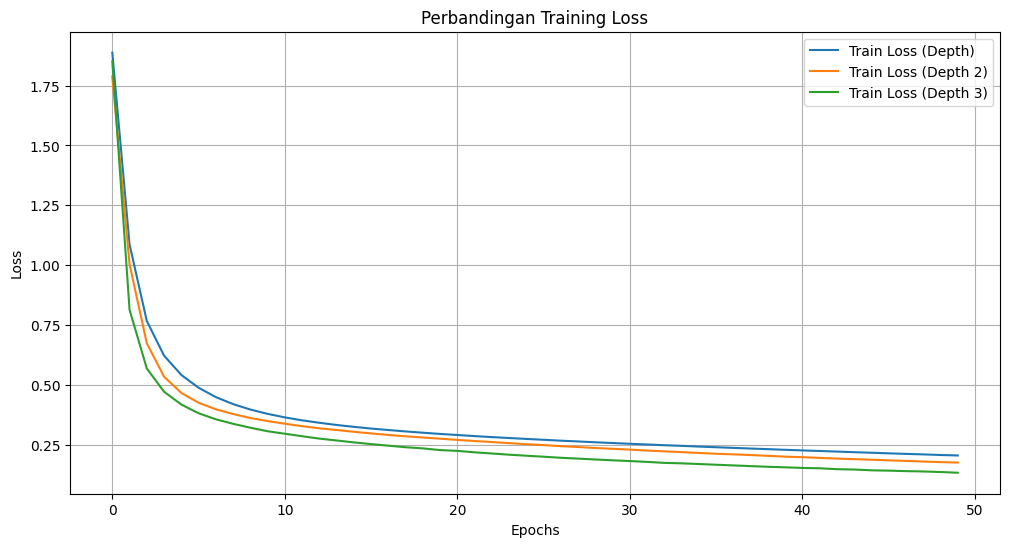

In [ ]:
print("Training model depth configurations 1")
model_depth = NeuralNetwork(
    layer_sizes=[784, 128, 64, 32, 10],
    activation_names=[None, "swish", "gelu", "swish", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_depth = model_depth.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_depth = model_depth.forward(X_test)
pred_classes_depth = np.argmax(pred_depth, axis=1)
accuracy_depth = np.mean(pred_classes_depth == y_test)
print(f"Test Accuracy (Depth): {accuracy_depth:.4f}\n")

print("Training model depth configurations 2")
model_depth_2 = NeuralNetwork(
    layer_sizes=[784, 256, 128, 64, 32, 10],
    activation_names=[None, "swish", "gelu", "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_depth_2 = model_depth_2.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_depth_2 = model_depth_2.forward(X_test)
pred_classes_depth_2 = np.argmax(pred_depth_2, axis=1)
accuracy_depth_2 = np.mean(pred_classes_depth_2 == y_test)
print(f"Test Accuracy (Depth 2): {accuracy_depth_2:.4f}\n")

print("Training model depth configurations 3")
model_depth_3 = NeuralNetwork(
    layer_sizes=[784, 512, 256, 128, 64, 32, 10],
    activation_names=[None, "swish", "gelu", "swish", "gelu", "swish", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_depth_3 = model_depth_3.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_depth_3 = model_depth_3.forward(X_test)
pred_classes_depth_3 = np.argmax(pred_depth_3, axis=1)
accuracy_depth_3 = np.mean(pred_classes_depth_3 == y_test)
print(f"Test Accuracy (Depth 3): {accuracy_depth_3:.4f}")

# Plot perbandingan loss
plt.figure(figsize=(12, 6))
plt.plot(
    history_depth["train_loss"], label="Train Loss (Depth)"
)
plt.plot(
    history_depth_2["train_loss"], label="Train Loss (Depth 2)"
)
plt.plot(
    history_depth_3["train_loss"], label="Train Loss (Depth 3)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

#### Variasi pada Width

Training model width configurations 1


Epoch 1/50: 100%|██████████| 700/700 [00:01<00:00, 559.35it/s]


Epoch 1/50, Train Loss: 1.7080, Val Loss: 1.0921, Val Acc: 0.7433


Epoch 2/50: 100%|██████████| 700/700 [00:01<00:00, 538.61it/s]


Epoch 2/50, Train Loss: 0.8699, Val Loss: 0.7245, Val Acc: 0.8191


Epoch 3/50: 100%|██████████| 700/700 [00:01<00:00, 580.32it/s]


Epoch 3/50, Train Loss: 0.6397, Val Loss: 0.5868, Val Acc: 0.8431


Epoch 4/50: 100%|██████████| 700/700 [00:01<00:00, 585.68it/s]


Epoch 4/50, Train Loss: 0.5385, Val Loss: 0.5142, Val Acc: 0.8612


Epoch 5/50: 100%|██████████| 700/700 [00:01<00:00, 505.03it/s]


Epoch 5/50, Train Loss: 0.4811, Val Loss: 0.4704, Val Acc: 0.8691


Epoch 6/50: 100%|██████████| 700/700 [00:01<00:00, 539.30it/s]


Epoch 6/50, Train Loss: 0.4441, Val Loss: 0.4409, Val Acc: 0.8759


Epoch 7/50: 100%|██████████| 700/700 [00:01<00:00, 530.37it/s]


Epoch 7/50, Train Loss: 0.4177, Val Loss: 0.4180, Val Acc: 0.8808


Epoch 8/50: 100%|██████████| 700/700 [00:01<00:00, 534.91it/s]


Epoch 8/50, Train Loss: 0.3983, Val Loss: 0.4013, Val Acc: 0.8847


Epoch 9/50: 100%|██████████| 700/700 [00:01<00:00, 531.92it/s]


Epoch 9/50, Train Loss: 0.3831, Val Loss: 0.3889, Val Acc: 0.8875


Epoch 10/50: 100%|██████████| 700/700 [00:01<00:00, 559.38it/s]


Epoch 10/50, Train Loss: 0.3708, Val Loss: 0.3786, Val Acc: 0.8888


Epoch 11/50: 100%|██████████| 700/700 [00:01<00:00, 555.43it/s]


Epoch 11/50, Train Loss: 0.3607, Val Loss: 0.3714, Val Acc: 0.8910


Epoch 12/50: 100%|██████████| 700/700 [00:01<00:00, 460.71it/s]


Epoch 12/50, Train Loss: 0.3520, Val Loss: 0.3620, Val Acc: 0.8946


Epoch 13/50: 100%|██████████| 700/700 [00:01<00:00, 496.89it/s]


Epoch 13/50, Train Loss: 0.3445, Val Loss: 0.3542, Val Acc: 0.8960


Epoch 14/50: 100%|██████████| 700/700 [00:01<00:00, 560.11it/s]


Epoch 14/50, Train Loss: 0.3380, Val Loss: 0.3479, Val Acc: 0.8989


Epoch 15/50: 100%|██████████| 700/700 [00:01<00:00, 561.79it/s]


Epoch 15/50, Train Loss: 0.3320, Val Loss: 0.3434, Val Acc: 0.8987


Epoch 16/50: 100%|██████████| 700/700 [00:01<00:00, 592.31it/s]


Epoch 16/50, Train Loss: 0.3267, Val Loss: 0.3386, Val Acc: 0.8997


Epoch 17/50: 100%|██████████| 700/700 [00:01<00:00, 604.29it/s]


Epoch 17/50, Train Loss: 0.3219, Val Loss: 0.3339, Val Acc: 0.9011


Epoch 18/50: 100%|██████████| 700/700 [00:01<00:00, 605.27it/s]


Epoch 18/50, Train Loss: 0.3177, Val Loss: 0.3302, Val Acc: 0.9013


Epoch 19/50: 100%|██████████| 700/700 [00:01<00:00, 605.12it/s]


Epoch 19/50, Train Loss: 0.3137, Val Loss: 0.3259, Val Acc: 0.9035


Epoch 20/50: 100%|██████████| 700/700 [00:01<00:00, 580.15it/s]


Epoch 20/50, Train Loss: 0.3100, Val Loss: 0.3232, Val Acc: 0.9034


Epoch 21/50: 100%|██████████| 700/700 [00:01<00:00, 543.77it/s]


Epoch 21/50, Train Loss: 0.3064, Val Loss: 0.3192, Val Acc: 0.9058


Epoch 22/50: 100%|██████████| 700/700 [00:01<00:00, 565.01it/s]


Epoch 22/50, Train Loss: 0.3033, Val Loss: 0.3162, Val Acc: 0.9055


Epoch 23/50: 100%|██████████| 700/700 [00:01<00:00, 576.65it/s]


Epoch 23/50, Train Loss: 0.2999, Val Loss: 0.3134, Val Acc: 0.9081


Epoch 24/50: 100%|██████████| 700/700 [00:01<00:00, 594.93it/s]


Epoch 24/50, Train Loss: 0.2975, Val Loss: 0.3110, Val Acc: 0.9077


Epoch 25/50: 100%|██████████| 700/700 [00:01<00:00, 600.74it/s]


Epoch 25/50, Train Loss: 0.2945, Val Loss: 0.3086, Val Acc: 0.9090


Epoch 26/50: 100%|██████████| 700/700 [00:01<00:00, 580.68it/s]


Epoch 26/50, Train Loss: 0.2918, Val Loss: 0.3068, Val Acc: 0.9092


Epoch 27/50: 100%|██████████| 700/700 [00:01<00:00, 594.14it/s]


Epoch 27/50, Train Loss: 0.2893, Val Loss: 0.3042, Val Acc: 0.9104


Epoch 28/50: 100%|██████████| 700/700 [00:01<00:00, 602.03it/s]


Epoch 28/50, Train Loss: 0.2867, Val Loss: 0.3027, Val Acc: 0.9108


Epoch 29/50: 100%|██████████| 700/700 [00:01<00:00, 604.16it/s]


Epoch 29/50, Train Loss: 0.2845, Val Loss: 0.3004, Val Acc: 0.9117


Epoch 30/50: 100%|██████████| 700/700 [00:01<00:00, 568.69it/s]


Epoch 30/50, Train Loss: 0.2821, Val Loss: 0.2990, Val Acc: 0.9110


Epoch 31/50: 100%|██████████| 700/700 [00:01<00:00, 586.54it/s]


Epoch 31/50, Train Loss: 0.2798, Val Loss: 0.2983, Val Acc: 0.9111


Epoch 32/50: 100%|██████████| 700/700 [00:01<00:00, 542.84it/s]


Epoch 32/50, Train Loss: 0.2778, Val Loss: 0.2938, Val Acc: 0.9147


Epoch 33/50: 100%|██████████| 700/700 [00:01<00:00, 539.04it/s]


Epoch 33/50, Train Loss: 0.2759, Val Loss: 0.2917, Val Acc: 0.9143


Epoch 34/50: 100%|██████████| 700/700 [00:01<00:00, 565.68it/s]


Epoch 34/50, Train Loss: 0.2740, Val Loss: 0.2901, Val Acc: 0.9160


Epoch 35/50: 100%|██████████| 700/700 [00:01<00:00, 588.49it/s]


Epoch 35/50, Train Loss: 0.2715, Val Loss: 0.2905, Val Acc: 0.9136


Epoch 36/50: 100%|██████████| 700/700 [00:01<00:00, 597.53it/s]


Epoch 36/50, Train Loss: 0.2700, Val Loss: 0.2881, Val Acc: 0.9148


Epoch 37/50: 100%|██████████| 700/700 [00:01<00:00, 573.95it/s]


Epoch 37/50, Train Loss: 0.2681, Val Loss: 0.2855, Val Acc: 0.9154


Epoch 38/50: 100%|██████████| 700/700 [00:01<00:00, 607.53it/s]


Epoch 38/50, Train Loss: 0.2660, Val Loss: 0.2844, Val Acc: 0.9163


Epoch 39/50: 100%|██████████| 700/700 [00:01<00:00, 600.38it/s]


Epoch 39/50, Train Loss: 0.2641, Val Loss: 0.2850, Val Acc: 0.9152


Epoch 40/50: 100%|██████████| 700/700 [00:01<00:00, 550.96it/s]


Epoch 40/50, Train Loss: 0.2624, Val Loss: 0.2800, Val Acc: 0.9196


Epoch 41/50: 100%|██████████| 700/700 [00:01<00:00, 550.32it/s]


Epoch 41/50, Train Loss: 0.2606, Val Loss: 0.2789, Val Acc: 0.9183


Epoch 42/50: 100%|██████████| 700/700 [00:01<00:00, 559.11it/s]


Epoch 42/50, Train Loss: 0.2591, Val Loss: 0.2765, Val Acc: 0.9192


Epoch 43/50: 100%|██████████| 700/700 [00:01<00:00, 565.67it/s]


Epoch 43/50, Train Loss: 0.2570, Val Loss: 0.2755, Val Acc: 0.9192


Epoch 44/50: 100%|██████████| 700/700 [00:01<00:00, 574.11it/s]


Epoch 44/50, Train Loss: 0.2553, Val Loss: 0.2734, Val Acc: 0.9204


Epoch 45/50: 100%|██████████| 700/700 [00:01<00:00, 589.45it/s]


Epoch 45/50, Train Loss: 0.2536, Val Loss: 0.2724, Val Acc: 0.9195


Epoch 46/50: 100%|██████████| 700/700 [00:01<00:00, 591.82it/s]


Epoch 46/50, Train Loss: 0.2518, Val Loss: 0.2721, Val Acc: 0.9203


Epoch 47/50: 100%|██████████| 700/700 [00:01<00:00, 603.86it/s]


Epoch 47/50, Train Loss: 0.2503, Val Loss: 0.2688, Val Acc: 0.9206


Epoch 48/50: 100%|██████████| 700/700 [00:01<00:00, 563.34it/s]


Epoch 48/50, Train Loss: 0.2487, Val Loss: 0.2684, Val Acc: 0.9212


Epoch 49/50: 100%|██████████| 700/700 [00:01<00:00, 600.46it/s]


Epoch 49/50, Train Loss: 0.2469, Val Loss: 0.2660, Val Acc: 0.9223


Epoch 50/50: 100%|██████████| 700/700 [00:01<00:00, 576.05it/s]


Epoch 50/50, Train Loss: 0.2451, Val Loss: 0.2654, Val Acc: 0.9216
Test Accuracy (Width): 0.9243

Training model width configurations 2


Epoch 1/50: 100%|██████████| 700/700 [00:03<00:00, 188.03it/s]


Epoch 1/50, Train Loss: 1.5198, Val Loss: 0.9836, Val Acc: 0.7733


Epoch 2/50: 100%|██████████| 700/700 [00:03<00:00, 179.03it/s]


Epoch 2/50, Train Loss: 0.7908, Val Loss: 0.6774, Val Acc: 0.8272


Epoch 3/50: 100%|██████████| 700/700 [00:03<00:00, 181.59it/s]


Epoch 3/50, Train Loss: 0.5950, Val Loss: 0.5520, Val Acc: 0.8538


Epoch 4/50: 100%|██████████| 700/700 [00:03<00:00, 187.57it/s]


Epoch 4/50, Train Loss: 0.5060, Val Loss: 0.4870, Val Acc: 0.8682


Epoch 5/50: 100%|██████████| 700/700 [00:03<00:00, 181.08it/s]


Epoch 5/50, Train Loss: 0.4563, Val Loss: 0.4494, Val Acc: 0.8737


Epoch 6/50: 100%|██████████| 700/700 [00:03<00:00, 189.38it/s]


Epoch 6/50, Train Loss: 0.4241, Val Loss: 0.4215, Val Acc: 0.8824


Epoch 7/50: 100%|██████████| 700/700 [00:03<00:00, 188.84it/s]


Epoch 7/50, Train Loss: 0.4010, Val Loss: 0.4039, Val Acc: 0.8820


Epoch 8/50: 100%|██████████| 700/700 [00:03<00:00, 181.59it/s]


Epoch 8/50, Train Loss: 0.3838, Val Loss: 0.3870, Val Acc: 0.8890


Epoch 9/50: 100%|██████████| 700/700 [00:03<00:00, 196.62it/s]


Epoch 9/50, Train Loss: 0.3703, Val Loss: 0.3762, Val Acc: 0.8892


Epoch 10/50: 100%|██████████| 700/700 [00:03<00:00, 187.38it/s]


Epoch 10/50, Train Loss: 0.3592, Val Loss: 0.3647, Val Acc: 0.8934


Epoch 11/50: 100%|██████████| 700/700 [00:03<00:00, 192.18it/s]


Epoch 11/50, Train Loss: 0.3501, Val Loss: 0.3577, Val Acc: 0.8947


Epoch 12/50: 100%|██████████| 700/700 [00:03<00:00, 189.51it/s]


Epoch 12/50, Train Loss: 0.3421, Val Loss: 0.3502, Val Acc: 0.8975


Epoch 13/50: 100%|██████████| 700/700 [00:03<00:00, 185.89it/s]


Epoch 13/50, Train Loss: 0.3355, Val Loss: 0.3440, Val Acc: 0.8995


Epoch 14/50: 100%|██████████| 700/700 [00:03<00:00, 191.52it/s]


Epoch 14/50, Train Loss: 0.3294, Val Loss: 0.3380, Val Acc: 0.9011


Epoch 15/50: 100%|██████████| 700/700 [00:03<00:00, 183.23it/s]


Epoch 15/50, Train Loss: 0.3240, Val Loss: 0.3337, Val Acc: 0.9027


Epoch 16/50: 100%|██████████| 700/700 [00:03<00:00, 183.68it/s]


Epoch 16/50, Train Loss: 0.3192, Val Loss: 0.3297, Val Acc: 0.9035


Epoch 17/50: 100%|██████████| 700/700 [00:03<00:00, 187.50it/s]


Epoch 17/50, Train Loss: 0.3146, Val Loss: 0.3262, Val Acc: 0.9030


Epoch 18/50: 100%|██████████| 700/700 [00:03<00:00, 182.76it/s]


Epoch 18/50, Train Loss: 0.3107, Val Loss: 0.3224, Val Acc: 0.9045


Epoch 19/50: 100%|██████████| 700/700 [00:03<00:00, 180.50it/s]


Epoch 19/50, Train Loss: 0.3071, Val Loss: 0.3204, Val Acc: 0.9064


Epoch 20/50: 100%|██████████| 700/700 [00:03<00:00, 189.41it/s]


Epoch 20/50, Train Loss: 0.3034, Val Loss: 0.3163, Val Acc: 0.9075


Epoch 21/50: 100%|██████████| 700/700 [00:03<00:00, 178.46it/s]


Epoch 21/50, Train Loss: 0.3001, Val Loss: 0.3123, Val Acc: 0.9095


Epoch 22/50: 100%|██████████| 700/700 [00:03<00:00, 187.24it/s]


Epoch 22/50, Train Loss: 0.2970, Val Loss: 0.3096, Val Acc: 0.9091


Epoch 23/50: 100%|██████████| 700/700 [00:03<00:00, 178.59it/s]


Epoch 23/50, Train Loss: 0.2941, Val Loss: 0.3069, Val Acc: 0.9099


Epoch 24/50: 100%|██████████| 700/700 [00:03<00:00, 183.23it/s]


Epoch 24/50, Train Loss: 0.2914, Val Loss: 0.3051, Val Acc: 0.9105


Epoch 25/50: 100%|██████████| 700/700 [00:03<00:00, 192.06it/s]


Epoch 25/50, Train Loss: 0.2886, Val Loss: 0.3012, Val Acc: 0.9137


Epoch 26/50: 100%|██████████| 700/700 [00:03<00:00, 187.02it/s]


Epoch 26/50, Train Loss: 0.2860, Val Loss: 0.2996, Val Acc: 0.9145


Epoch 27/50: 100%|██████████| 700/700 [00:03<00:00, 191.22it/s]


Epoch 27/50, Train Loss: 0.2838, Val Loss: 0.2971, Val Acc: 0.9150


Epoch 28/50: 100%|██████████| 700/700 [00:03<00:00, 177.24it/s]


Epoch 28/50, Train Loss: 0.2813, Val Loss: 0.2956, Val Acc: 0.9157


Epoch 29/50: 100%|██████████| 700/700 [00:04<00:00, 160.66it/s]


Epoch 29/50, Train Loss: 0.2788, Val Loss: 0.2935, Val Acc: 0.9157


Epoch 30/50: 100%|██████████| 700/700 [00:04<00:00, 163.76it/s]


Epoch 30/50, Train Loss: 0.2764, Val Loss: 0.2910, Val Acc: 0.9152


Epoch 31/50: 100%|██████████| 700/700 [00:03<00:00, 177.79it/s]


Epoch 31/50, Train Loss: 0.2742, Val Loss: 0.2887, Val Acc: 0.9174


Epoch 32/50: 100%|██████████| 700/700 [00:03<00:00, 175.08it/s]


Epoch 32/50, Train Loss: 0.2724, Val Loss: 0.2891, Val Acc: 0.9168


Epoch 33/50: 100%|██████████| 700/700 [00:04<00:00, 169.04it/s]


Epoch 33/50, Train Loss: 0.2703, Val Loss: 0.2863, Val Acc: 0.9175


Epoch 34/50: 100%|██████████| 700/700 [00:04<00:00, 169.78it/s]


Epoch 34/50, Train Loss: 0.2682, Val Loss: 0.2837, Val Acc: 0.9200


Epoch 35/50: 100%|██████████| 700/700 [00:03<00:00, 178.90it/s]


Epoch 35/50, Train Loss: 0.2662, Val Loss: 0.2816, Val Acc: 0.9188


Epoch 36/50: 100%|██████████| 700/700 [00:03<00:00, 178.05it/s]


Epoch 36/50, Train Loss: 0.2642, Val Loss: 0.2819, Val Acc: 0.9179


Epoch 37/50: 100%|██████████| 700/700 [00:03<00:00, 181.64it/s]


Epoch 37/50, Train Loss: 0.2621, Val Loss: 0.2795, Val Acc: 0.9192


Epoch 38/50: 100%|██████████| 700/700 [00:04<00:00, 169.93it/s]


Epoch 38/50, Train Loss: 0.2604, Val Loss: 0.2773, Val Acc: 0.9203


Epoch 39/50: 100%|██████████| 700/700 [00:03<00:00, 177.46it/s]


Epoch 39/50, Train Loss: 0.2585, Val Loss: 0.2753, Val Acc: 0.9206


Epoch 40/50: 100%|██████████| 700/700 [00:03<00:00, 181.72it/s]


Epoch 40/50, Train Loss: 0.2567, Val Loss: 0.2737, Val Acc: 0.9214


Epoch 41/50: 100%|██████████| 700/700 [00:03<00:00, 184.60it/s]


Epoch 41/50, Train Loss: 0.2547, Val Loss: 0.2709, Val Acc: 0.9235


Epoch 42/50: 100%|██████████| 700/700 [00:03<00:00, 180.68it/s]


Epoch 42/50, Train Loss: 0.2529, Val Loss: 0.2709, Val Acc: 0.9231


Epoch 43/50: 100%|██████████| 700/700 [00:03<00:00, 178.08it/s]


Epoch 43/50, Train Loss: 0.2511, Val Loss: 0.2677, Val Acc: 0.9248


Epoch 44/50: 100%|██████████| 700/700 [00:03<00:00, 181.15it/s]


Epoch 44/50, Train Loss: 0.2493, Val Loss: 0.2685, Val Acc: 0.9227


Epoch 45/50: 100%|██████████| 700/700 [00:03<00:00, 179.99it/s]


Epoch 45/50, Train Loss: 0.2478, Val Loss: 0.2662, Val Acc: 0.9246


Epoch 46/50: 100%|██████████| 700/700 [00:04<00:00, 170.11it/s]


Epoch 46/50, Train Loss: 0.2458, Val Loss: 0.2648, Val Acc: 0.9263


Epoch 47/50: 100%|██████████| 700/700 [00:03<00:00, 177.18it/s]


Epoch 47/50, Train Loss: 0.2442, Val Loss: 0.2623, Val Acc: 0.9260


Epoch 48/50: 100%|██████████| 700/700 [00:03<00:00, 178.65it/s]


Epoch 48/50, Train Loss: 0.2425, Val Loss: 0.2602, Val Acc: 0.9276


Epoch 49/50: 100%|██████████| 700/700 [00:04<00:00, 174.91it/s]


Epoch 49/50, Train Loss: 0.2408, Val Loss: 0.2612, Val Acc: 0.9257


Epoch 50/50: 100%|██████████| 700/700 [00:04<00:00, 173.48it/s]


Epoch 50/50, Train Loss: 0.2389, Val Loss: 0.2593, Val Acc: 0.9263
Test Accuracy (Width 2): 0.9284

Training model width configurations 3


Epoch 1/50: 100%|██████████| 700/700 [00:10<00:00, 64.39it/s]


Epoch 1/50, Train Loss: 1.3755, Val Loss: 0.8421, Val Acc: 0.8092


Epoch 2/50: 100%|██████████| 700/700 [00:10<00:00, 63.85it/s]


Epoch 2/50, Train Loss: 0.6887, Val Loss: 0.5983, Val Acc: 0.8490


Epoch 3/50: 100%|██████████| 700/700 [00:11<00:00, 63.11it/s]


Epoch 3/50, Train Loss: 0.5348, Val Loss: 0.5025, Val Acc: 0.8638


Epoch 4/50: 100%|██████████| 700/700 [00:10<00:00, 64.17it/s]


Epoch 4/50, Train Loss: 0.4666, Val Loss: 0.4569, Val Acc: 0.8726


Epoch 5/50: 100%|██████████| 700/700 [00:10<00:00, 64.36it/s]


Epoch 5/50, Train Loss: 0.4282, Val Loss: 0.4225, Val Acc: 0.8804


Epoch 6/50: 100%|██████████| 700/700 [00:10<00:00, 64.88it/s]


Epoch 6/50, Train Loss: 0.4029, Val Loss: 0.4039, Val Acc: 0.8857


Epoch 7/50: 100%|██████████| 700/700 [00:10<00:00, 64.10it/s]


Epoch 7/50, Train Loss: 0.3839, Val Loss: 0.3939, Val Acc: 0.8878


Epoch 8/50: 100%|██████████| 700/700 [00:11<00:00, 62.55it/s]


Epoch 8/50, Train Loss: 0.3703, Val Loss: 0.3771, Val Acc: 0.8910


Epoch 9/50: 100%|██████████| 700/700 [00:11<00:00, 61.65it/s]


Epoch 9/50, Train Loss: 0.3582, Val Loss: 0.3655, Val Acc: 0.8934


Epoch 10/50: 100%|██████████| 700/700 [00:10<00:00, 63.87it/s]


Epoch 10/50, Train Loss: 0.3494, Val Loss: 0.3572, Val Acc: 0.8950


Epoch 11/50: 100%|██████████| 700/700 [00:10<00:00, 63.86it/s]


Epoch 11/50, Train Loss: 0.3414, Val Loss: 0.3510, Val Acc: 0.8969


Epoch 12/50: 100%|██████████| 700/700 [00:13<00:00, 51.31it/s]


Epoch 12/50, Train Loss: 0.3350, Val Loss: 0.3466, Val Acc: 0.8975


Epoch 13/50: 100%|██████████| 700/700 [00:12<00:00, 56.68it/s]


Epoch 13/50, Train Loss: 0.3290, Val Loss: 0.3380, Val Acc: 0.9009


Epoch 14/50: 100%|██████████| 700/700 [00:12<00:00, 55.26it/s]


Epoch 14/50, Train Loss: 0.3236, Val Loss: 0.3353, Val Acc: 0.9010


Epoch 15/50: 100%|██████████| 700/700 [00:12<00:00, 55.95it/s]


Epoch 15/50, Train Loss: 0.3191, Val Loss: 0.3300, Val Acc: 0.9023


Epoch 16/50: 100%|██████████| 700/700 [00:12<00:00, 54.77it/s]


Epoch 16/50, Train Loss: 0.3149, Val Loss: 0.3262, Val Acc: 0.9038


Epoch 17/50: 100%|██████████| 700/700 [00:12<00:00, 55.56it/s]


Epoch 17/50, Train Loss: 0.3109, Val Loss: 0.3237, Val Acc: 0.9041


Epoch 18/50: 100%|██████████| 700/700 [00:12<00:00, 54.29it/s]


Epoch 18/50, Train Loss: 0.3074, Val Loss: 0.3203, Val Acc: 0.9054


Epoch 19/50: 100%|██████████| 700/700 [00:12<00:00, 56.39it/s]


Epoch 19/50, Train Loss: 0.3042, Val Loss: 0.3158, Val Acc: 0.9067


Epoch 20/50: 100%|██████████| 700/700 [00:12<00:00, 55.77it/s]


Epoch 20/50, Train Loss: 0.3009, Val Loss: 0.3136, Val Acc: 0.9065


Epoch 21/50: 100%|██████████| 700/700 [00:12<00:00, 55.13it/s]


Epoch 21/50, Train Loss: 0.2972, Val Loss: 0.3101, Val Acc: 0.9117


Epoch 22/50: 100%|██████████| 700/700 [00:12<00:00, 55.65it/s]


Epoch 22/50, Train Loss: 0.2951, Val Loss: 0.3089, Val Acc: 0.9089


Epoch 23/50: 100%|██████████| 700/700 [00:12<00:00, 55.34it/s]


Epoch 23/50, Train Loss: 0.2920, Val Loss: 0.3062, Val Acc: 0.9112


Epoch 24/50: 100%|██████████| 700/700 [00:12<00:00, 56.40it/s]


Epoch 24/50, Train Loss: 0.2895, Val Loss: 0.3055, Val Acc: 0.9116


Epoch 25/50: 100%|██████████| 700/700 [00:12<00:00, 54.06it/s]


Epoch 25/50, Train Loss: 0.2875, Val Loss: 0.2998, Val Acc: 0.9134


Epoch 26/50: 100%|██████████| 700/700 [00:13<00:00, 53.27it/s]


Epoch 26/50, Train Loss: 0.2851, Val Loss: 0.3028, Val Acc: 0.9096


Epoch 27/50: 100%|██████████| 700/700 [00:13<00:00, 53.27it/s]


Epoch 27/50, Train Loss: 0.2827, Val Loss: 0.2972, Val Acc: 0.9145


Epoch 28/50: 100%|██████████| 700/700 [00:12<00:00, 55.37it/s]


Epoch 28/50, Train Loss: 0.2805, Val Loss: 0.2943, Val Acc: 0.9159


Epoch 29/50: 100%|██████████| 700/700 [00:12<00:00, 55.74it/s]


Epoch 29/50, Train Loss: 0.2784, Val Loss: 0.2983, Val Acc: 0.9112


Epoch 30/50: 100%|██████████| 700/700 [00:13<00:00, 53.38it/s]


Epoch 30/50, Train Loss: 0.2763, Val Loss: 0.2929, Val Acc: 0.9155


Epoch 31/50: 100%|██████████| 700/700 [00:12<00:00, 54.63it/s]


Epoch 31/50, Train Loss: 0.2744, Val Loss: 0.2892, Val Acc: 0.9164


Epoch 32/50: 100%|██████████| 700/700 [00:12<00:00, 56.28it/s]


Epoch 32/50, Train Loss: 0.2724, Val Loss: 0.2890, Val Acc: 0.9164


Epoch 33/50: 100%|██████████| 700/700 [00:12<00:00, 54.68it/s]


Epoch 33/50, Train Loss: 0.2710, Val Loss: 0.2862, Val Acc: 0.9182


Epoch 34/50: 100%|██████████| 700/700 [00:12<00:00, 54.46it/s]


Epoch 34/50, Train Loss: 0.2684, Val Loss: 0.2855, Val Acc: 0.9179


Epoch 35/50: 100%|██████████| 700/700 [00:12<00:00, 57.66it/s]


Epoch 35/50, Train Loss: 0.2669, Val Loss: 0.2879, Val Acc: 0.9157


Epoch 36/50: 100%|██████████| 700/700 [00:12<00:00, 56.62it/s]


Epoch 36/50, Train Loss: 0.2646, Val Loss: 0.2876, Val Acc: 0.9170


Epoch 37/50: 100%|██████████| 700/700 [00:11<00:00, 58.91it/s]


Epoch 37/50, Train Loss: 0.2636, Val Loss: 0.2811, Val Acc: 0.9194


Epoch 38/50: 100%|██████████| 700/700 [00:12<00:00, 54.49it/s]


Epoch 38/50, Train Loss: 0.2616, Val Loss: 0.2799, Val Acc: 0.9180


Epoch 39/50: 100%|██████████| 700/700 [00:11<00:00, 63.28it/s]


Epoch 39/50, Train Loss: 0.2602, Val Loss: 0.2801, Val Acc: 0.9182


Epoch 40/50: 100%|██████████| 700/700 [00:11<00:00, 63.60it/s]


Epoch 40/50, Train Loss: 0.2581, Val Loss: 0.2765, Val Acc: 0.9213


Epoch 41/50: 100%|██████████| 700/700 [00:11<00:00, 61.72it/s]


Epoch 41/50, Train Loss: 0.2562, Val Loss: 0.2748, Val Acc: 0.9213


Epoch 42/50: 100%|██████████| 700/700 [00:11<00:00, 63.35it/s]


Epoch 42/50, Train Loss: 0.2544, Val Loss: 0.2751, Val Acc: 0.9196


Epoch 43/50: 100%|██████████| 700/700 [00:11<00:00, 60.47it/s]


Epoch 43/50, Train Loss: 0.2529, Val Loss: 0.2747, Val Acc: 0.9208


Epoch 44/50: 100%|██████████| 700/700 [00:11<00:00, 61.75it/s]


Epoch 44/50, Train Loss: 0.2515, Val Loss: 0.2705, Val Acc: 0.9215


Epoch 45/50: 100%|██████████| 700/700 [00:11<00:00, 61.39it/s]


Epoch 45/50, Train Loss: 0.2498, Val Loss: 0.2713, Val Acc: 0.9213


Epoch 46/50: 100%|██████████| 700/700 [00:11<00:00, 58.99it/s]


Epoch 46/50, Train Loss: 0.2479, Val Loss: 0.2676, Val Acc: 0.9219


Epoch 47/50: 100%|██████████| 700/700 [00:11<00:00, 63.22it/s]


Epoch 47/50, Train Loss: 0.2467, Val Loss: 0.2685, Val Acc: 0.9213


Epoch 48/50: 100%|██████████| 700/700 [00:11<00:00, 60.30it/s]


Epoch 48/50, Train Loss: 0.2449, Val Loss: 0.2663, Val Acc: 0.9235


Epoch 49/50: 100%|██████████| 700/700 [00:11<00:00, 61.51it/s]


Epoch 49/50, Train Loss: 0.2432, Val Loss: 0.2620, Val Acc: 0.9250


Epoch 50/50: 100%|██████████| 700/700 [00:11<00:00, 60.51it/s]


Epoch 50/50, Train Loss: 0.2414, Val Loss: 0.2616, Val Acc: 0.9237
Test Accuracy (Width 3): 0.9276


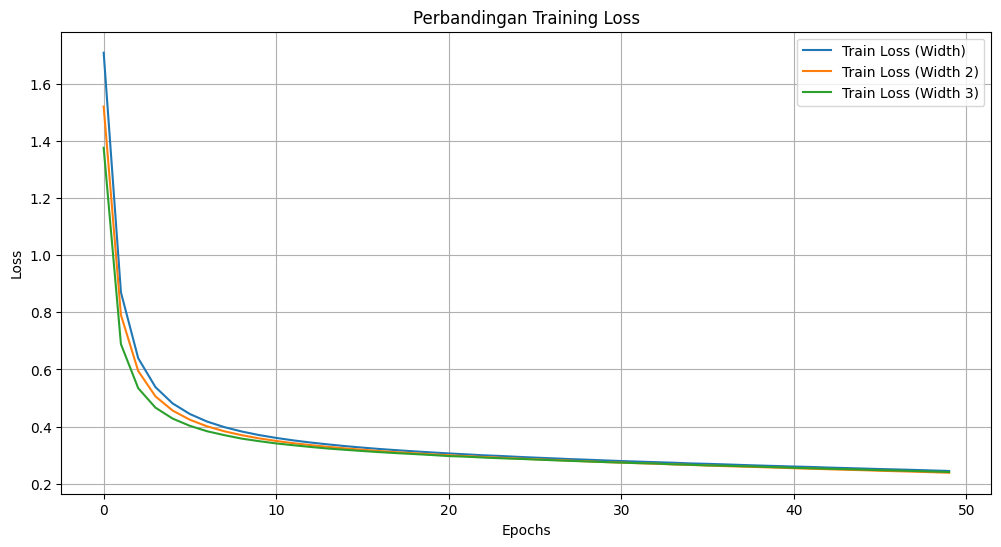

In [ ]:
print("Training model width configurations 1")
model_width = NeuralNetwork(
    layer_sizes=[784, 256, 256, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_width = model_width.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_width = model_width.forward(X_test)
pred_classes_width = np.argmax(pred_width, axis=1)
accuracy_width = np.mean(pred_classes_width == y_test)
print(f"Test Accuracy (Width): {accuracy_width:.4f}\n")

print("Training model width configurations 2")
model_width_2 = NeuralNetwork(
    layer_sizes=[784, 512, 512, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_width_2 = model_width_2.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_width_2 = model_width_2.forward(X_test)
pred_classes_width_2 = np.argmax(pred_width_2, axis=1)
accuracy_width_2 = np.mean(pred_classes_width_2 == y_test)
print(f"Test Accuracy (Width 2): {accuracy_width_2:.4f}\n")

print("Training model width configurations 3")
model_width_3 = NeuralNetwork(
    layer_sizes=[784, 1024, 1024, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_width_3 = model_width_3.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_width_3 = model_width_3.forward(X_test)
pred_classes_width_3 = np.argmax(pred_width_3, axis=1)
accuracy_width_3 = np.mean(pred_classes_width_3 == y_test)
print(f"Test Accuracy (Width 3): {accuracy_width_3:.4f}")

# Plot perbandingan loss
plt.figure(figsize=(12, 6))
plt.plot(
    history_width["train_loss"], label="Train Loss (Width)"
)
plt.plot(
    history_width_2["train_loss"], label="Train Loss (Width 2)"
)
plt.plot(
    history_width_3["train_loss"], label="Train Loss (Width 3)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

### Pengaruh Fungsi Aktivasi Hidden Layer

Training model activation linear


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 2093.37it/s]


Epoch 1/50, Train Loss: 1.5347, Val Loss: 0.9770, Val Acc: 0.7615


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 2046.35it/s]


Epoch 2/50, Train Loss: 0.7958, Val Loss: 0.6759, Val Acc: 0.8304


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 2239.76it/s]


Epoch 3/50, Train Loss: 0.6061, Val Loss: 0.5604, Val Acc: 0.8496


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 2262.27it/s]


Epoch 4/50, Train Loss: 0.5193, Val Loss: 0.4989, Val Acc: 0.8640


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 2075.32it/s]


Epoch 5/50, Train Loss: 0.4698, Val Loss: 0.4605, Val Acc: 0.8712


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 2235.33it/s]


Epoch 6/50, Train Loss: 0.4372, Val Loss: 0.4345, Val Acc: 0.8772


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 2310.60it/s]


Epoch 7/50, Train Loss: 0.4138, Val Loss: 0.4151, Val Acc: 0.8806


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 2096.95it/s]


Epoch 8/50, Train Loss: 0.3962, Val Loss: 0.3998, Val Acc: 0.8852


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 2233.36it/s]


Epoch 9/50, Train Loss: 0.3821, Val Loss: 0.3870, Val Acc: 0.8876


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 2153.17it/s]


Epoch 10/50, Train Loss: 0.3705, Val Loss: 0.3762, Val Acc: 0.8909


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 2385.63it/s]


Epoch 11/50, Train Loss: 0.3608, Val Loss: 0.3677, Val Acc: 0.8925


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 2231.06it/s]


Epoch 12/50, Train Loss: 0.3527, Val Loss: 0.3599, Val Acc: 0.8946


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 2126.75it/s]


Epoch 13/50, Train Loss: 0.3454, Val Loss: 0.3536, Val Acc: 0.8968


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 2385.85it/s]


Epoch 14/50, Train Loss: 0.3391, Val Loss: 0.3475, Val Acc: 0.8982


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 2074.40it/s]


Epoch 15/50, Train Loss: 0.3336, Val Loss: 0.3437, Val Acc: 0.8997


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 2163.93it/s]


Epoch 16/50, Train Loss: 0.3286, Val Loss: 0.3381, Val Acc: 0.9011


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 2271.61it/s]


Epoch 17/50, Train Loss: 0.3239, Val Loss: 0.3337, Val Acc: 0.9021


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 2394.07it/s]


Epoch 18/50, Train Loss: 0.3198, Val Loss: 0.3300, Val Acc: 0.9024


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 2204.20it/s]


Epoch 19/50, Train Loss: 0.3159, Val Loss: 0.3277, Val Acc: 0.9046


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 2393.14it/s]


Epoch 20/50, Train Loss: 0.3124, Val Loss: 0.3230, Val Acc: 0.9051


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 2243.49it/s]


Epoch 21/50, Train Loss: 0.3093, Val Loss: 0.3203, Val Acc: 0.9069


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 2275.81it/s]


Epoch 22/50, Train Loss: 0.3061, Val Loss: 0.3175, Val Acc: 0.9067


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1988.91it/s]


Epoch 23/50, Train Loss: 0.3030, Val Loss: 0.3151, Val Acc: 0.9086


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 2352.64it/s]


Epoch 24/50, Train Loss: 0.3005, Val Loss: 0.3122, Val Acc: 0.9092


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 2211.09it/s]


Epoch 25/50, Train Loss: 0.2979, Val Loss: 0.3102, Val Acc: 0.9096


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 2426.24it/s]


Epoch 26/50, Train Loss: 0.2954, Val Loss: 0.3094, Val Acc: 0.9097


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 2451.88it/s]


Epoch 27/50, Train Loss: 0.2930, Val Loss: 0.3050, Val Acc: 0.9113


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 2441.15it/s]


Epoch 28/50, Train Loss: 0.2908, Val Loss: 0.3031, Val Acc: 0.9124


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 2329.07it/s]


Epoch 29/50, Train Loss: 0.2887, Val Loss: 0.3015, Val Acc: 0.9127


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 2142.36it/s]


Epoch 30/50, Train Loss: 0.2866, Val Loss: 0.2997, Val Acc: 0.9138


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 2163.73it/s]


Epoch 31/50, Train Loss: 0.2845, Val Loss: 0.2994, Val Acc: 0.9125


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 2075.36it/s]


Epoch 32/50, Train Loss: 0.2825, Val Loss: 0.2973, Val Acc: 0.9144


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 2114.75it/s]


Epoch 33/50, Train Loss: 0.2807, Val Loss: 0.2947, Val Acc: 0.9139


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 2107.78it/s]


Epoch 34/50, Train Loss: 0.2788, Val Loss: 0.2937, Val Acc: 0.9157


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1903.85it/s]


Epoch 35/50, Train Loss: 0.2770, Val Loss: 0.2915, Val Acc: 0.9158


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 2169.69it/s]


Epoch 36/50, Train Loss: 0.2753, Val Loss: 0.2897, Val Acc: 0.9155


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 2242.38it/s]


Epoch 37/50, Train Loss: 0.2735, Val Loss: 0.2886, Val Acc: 0.9175


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 2245.41it/s]


Epoch 38/50, Train Loss: 0.2721, Val Loss: 0.2870, Val Acc: 0.9179


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 2385.78it/s]


Epoch 39/50, Train Loss: 0.2701, Val Loss: 0.2857, Val Acc: 0.9177


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 2227.35it/s]


Epoch 40/50, Train Loss: 0.2687, Val Loss: 0.2844, Val Acc: 0.9179


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 2471.77it/s]


Epoch 41/50, Train Loss: 0.2669, Val Loss: 0.2826, Val Acc: 0.9182


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 2460.40it/s]


Epoch 42/50, Train Loss: 0.2656, Val Loss: 0.2812, Val Acc: 0.9197


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 2413.62it/s]


Epoch 43/50, Train Loss: 0.2640, Val Loss: 0.2805, Val Acc: 0.9192


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 2475.28it/s]


Epoch 44/50, Train Loss: 0.2624, Val Loss: 0.2790, Val Acc: 0.9200


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 2395.47it/s]


Epoch 45/50, Train Loss: 0.2609, Val Loss: 0.2771, Val Acc: 0.9189


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 2434.04it/s]


Epoch 46/50, Train Loss: 0.2593, Val Loss: 0.2757, Val Acc: 0.9204


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 2465.08it/s]


Epoch 47/50, Train Loss: 0.2577, Val Loss: 0.2744, Val Acc: 0.9204


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 2396.16it/s]


Epoch 48/50, Train Loss: 0.2564, Val Loss: 0.2733, Val Acc: 0.9196


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 2484.90it/s]


Epoch 49/50, Train Loss: 0.2550, Val Loss: 0.2719, Val Acc: 0.9211


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 2418.25it/s]


Epoch 50/50, Train Loss: 0.2536, Val Loss: 0.2712, Val Acc: 0.9213
Test Accuracy (Activation Linear): 0.9216

Training model activation relu


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 2508.97it/s]


Epoch 1/50, Train Loss: 1.9952, Val Loss: 1.5672, Val Acc: 0.6246


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 2356.57it/s]


Epoch 2/50, Train Loss: 1.2828, Val Loss: 1.0566, Val Acc: 0.7572


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 2389.11it/s]


Epoch 3/50, Train Loss: 0.8983, Val Loss: 0.7906, Val Acc: 0.8121


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 2353.82it/s]


Epoch 4/50, Train Loss: 0.7035, Val Loss: 0.6539, Val Acc: 0.8346


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 2362.85it/s]


Epoch 5/50, Train Loss: 0.5972, Val Loss: 0.5731, Val Acc: 0.8476


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 2390.72it/s]


Epoch 6/50, Train Loss: 0.5317, Val Loss: 0.5213, Val Acc: 0.8580


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 2377.17it/s]


Epoch 7/50, Train Loss: 0.4880, Val Loss: 0.4849, Val Acc: 0.8652


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 2415.97it/s]


Epoch 8/50, Train Loss: 0.4564, Val Loss: 0.4579, Val Acc: 0.8693


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 2332.60it/s]


Epoch 9/50, Train Loss: 0.4326, Val Loss: 0.4377, Val Acc: 0.8737


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 2428.83it/s]


Epoch 10/50, Train Loss: 0.4138, Val Loss: 0.4205, Val Acc: 0.8795


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 2342.40it/s]


Epoch 11/50, Train Loss: 0.3985, Val Loss: 0.4073, Val Acc: 0.8818


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 2453.92it/s]


Epoch 12/50, Train Loss: 0.3856, Val Loss: 0.3968, Val Acc: 0.8845


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 2090.89it/s]


Epoch 13/50, Train Loss: 0.3749, Val Loss: 0.3855, Val Acc: 0.8885


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1934.66it/s]


Epoch 14/50, Train Loss: 0.3655, Val Loss: 0.3767, Val Acc: 0.8911


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 2088.98it/s]


Epoch 15/50, Train Loss: 0.3571, Val Loss: 0.3702, Val Acc: 0.8918


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 2431.21it/s]


Epoch 16/50, Train Loss: 0.3497, Val Loss: 0.3628, Val Acc: 0.8945


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1940.35it/s]


Epoch 17/50, Train Loss: 0.3430, Val Loss: 0.3572, Val Acc: 0.8969


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 2313.03it/s]


Epoch 18/50, Train Loss: 0.3369, Val Loss: 0.3513, Val Acc: 0.8962


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 2172.69it/s]


Epoch 19/50, Train Loss: 0.3313, Val Loss: 0.3452, Val Acc: 0.8983


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 2042.55it/s]


Epoch 20/50, Train Loss: 0.3262, Val Loss: 0.3406, Val Acc: 0.9021


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 2323.70it/s]


Epoch 21/50, Train Loss: 0.3213, Val Loss: 0.3364, Val Acc: 0.9017


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 2093.15it/s]


Epoch 22/50, Train Loss: 0.3169, Val Loss: 0.3316, Val Acc: 0.9049


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 2022.14it/s]


Epoch 23/50, Train Loss: 0.3124, Val Loss: 0.3284, Val Acc: 0.9050


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 2029.46it/s]


Epoch 24/50, Train Loss: 0.3086, Val Loss: 0.3246, Val Acc: 0.9063


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 2181.58it/s]


Epoch 25/50, Train Loss: 0.3046, Val Loss: 0.3209, Val Acc: 0.9075


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 2229.29it/s]


Epoch 26/50, Train Loss: 0.3009, Val Loss: 0.3171, Val Acc: 0.9096


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 2150.12it/s]


Epoch 27/50, Train Loss: 0.2974, Val Loss: 0.3136, Val Acc: 0.9101


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 2155.40it/s]


Epoch 28/50, Train Loss: 0.2940, Val Loss: 0.3112, Val Acc: 0.9118


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 2109.83it/s]


Epoch 29/50, Train Loss: 0.2910, Val Loss: 0.3077, Val Acc: 0.9131


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 2324.64it/s]


Epoch 30/50, Train Loss: 0.2879, Val Loss: 0.3056, Val Acc: 0.9121


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 2325.88it/s]


Epoch 31/50, Train Loss: 0.2847, Val Loss: 0.3022, Val Acc: 0.9133


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 2284.24it/s]


Epoch 32/50, Train Loss: 0.2818, Val Loss: 0.2993, Val Acc: 0.9139


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 2062.89it/s]


Epoch 33/50, Train Loss: 0.2793, Val Loss: 0.2971, Val Acc: 0.9149


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 2414.51it/s]


Epoch 34/50, Train Loss: 0.2764, Val Loss: 0.2952, Val Acc: 0.9152


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 2304.11it/s]


Epoch 35/50, Train Loss: 0.2738, Val Loss: 0.2925, Val Acc: 0.9146


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 2460.53it/s]


Epoch 36/50, Train Loss: 0.2712, Val Loss: 0.2905, Val Acc: 0.9155


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 2290.80it/s]


Epoch 37/50, Train Loss: 0.2688, Val Loss: 0.2878, Val Acc: 0.9164


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 2408.19it/s]


Epoch 38/50, Train Loss: 0.2664, Val Loss: 0.2854, Val Acc: 0.9177


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 2430.02it/s]


Epoch 39/50, Train Loss: 0.2640, Val Loss: 0.2846, Val Acc: 0.9173


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 2499.43it/s]


Epoch 40/50, Train Loss: 0.2618, Val Loss: 0.2817, Val Acc: 0.9180


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 2406.22it/s]


Epoch 41/50, Train Loss: 0.2595, Val Loss: 0.2798, Val Acc: 0.9186


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 2408.28it/s]


Epoch 42/50, Train Loss: 0.2572, Val Loss: 0.2778, Val Acc: 0.9197


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 2377.47it/s]


Epoch 43/50, Train Loss: 0.2551, Val Loss: 0.2751, Val Acc: 0.9201


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 2351.76it/s]


Epoch 44/50, Train Loss: 0.2529, Val Loss: 0.2742, Val Acc: 0.9196


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 2291.15it/s]


Epoch 45/50, Train Loss: 0.2509, Val Loss: 0.2721, Val Acc: 0.9212


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 2353.14it/s]


Epoch 46/50, Train Loss: 0.2488, Val Loss: 0.2700, Val Acc: 0.9208


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 2046.73it/s]


Epoch 47/50, Train Loss: 0.2468, Val Loss: 0.2691, Val Acc: 0.9219


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 2311.12it/s]


Epoch 48/50, Train Loss: 0.2448, Val Loss: 0.2667, Val Acc: 0.9215


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 2350.42it/s]


Epoch 49/50, Train Loss: 0.2428, Val Loss: 0.2658, Val Acc: 0.9224


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 2338.24it/s]


Epoch 50/50, Train Loss: 0.2410, Val Loss: 0.2634, Val Acc: 0.9234
Test Accuracy (Activation ReLU): 0.9266

Training model activation sigmoid


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 2164.81it/s]


Epoch 1/50, Train Loss: 2.3045, Val Loss: 2.1926, Val Acc: 0.3469


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 2090.16it/s]


Epoch 2/50, Train Loss: 2.1422, Val Loss: 2.0865, Val Acc: 0.5342


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 2103.99it/s]


Epoch 3/50, Train Loss: 2.0313, Val Loss: 1.9701, Val Acc: 0.5711


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 2078.49it/s]


Epoch 4/50, Train Loss: 1.9077, Val Loss: 1.8403, Val Acc: 0.6167


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1851.77it/s]


Epoch 5/50, Train Loss: 1.7720, Val Loss: 1.7000, Val Acc: 0.6325


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1813.47it/s]


Epoch 6/50, Train Loss: 1.6289, Val Loss: 1.5558, Val Acc: 0.6724


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1998.35it/s]


Epoch 7/50, Train Loss: 1.4832, Val Loss: 1.4121, Val Acc: 0.6953


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1834.45it/s]


Epoch 8/50, Train Loss: 1.3416, Val Loss: 1.2762, Val Acc: 0.7171


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1782.12it/s]


Epoch 9/50, Train Loss: 1.2107, Val Loss: 1.1528, Val Acc: 0.7448


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1907.10it/s]


Epoch 10/50, Train Loss: 1.0946, Val Loss: 1.0474, Val Acc: 0.7632


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1816.68it/s]


Epoch 11/50, Train Loss: 0.9955, Val Loss: 0.9573, Val Acc: 0.7879


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1948.24it/s]


Epoch 12/50, Train Loss: 0.9124, Val Loss: 0.8824, Val Acc: 0.8014


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1730.43it/s]


Epoch 13/50, Train Loss: 0.8432, Val Loss: 0.8206, Val Acc: 0.8088


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1800.60it/s]


Epoch 14/50, Train Loss: 0.7855, Val Loss: 0.7686, Val Acc: 0.8196


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1722.01it/s]


Epoch 15/50, Train Loss: 0.7372, Val Loss: 0.7257, Val Acc: 0.8260


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1821.05it/s]


Epoch 16/50, Train Loss: 0.6964, Val Loss: 0.6880, Val Acc: 0.8336


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1699.13it/s]


Epoch 17/50, Train Loss: 0.6617, Val Loss: 0.6566, Val Acc: 0.8371


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1749.93it/s]


Epoch 18/50, Train Loss: 0.6318, Val Loss: 0.6292, Val Acc: 0.8437


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1791.46it/s]


Epoch 19/50, Train Loss: 0.6060, Val Loss: 0.6060, Val Acc: 0.8438


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1926.08it/s]


Epoch 20/50, Train Loss: 0.5833, Val Loss: 0.5853, Val Acc: 0.8482


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1701.67it/s]


Epoch 21/50, Train Loss: 0.5635, Val Loss: 0.5665, Val Acc: 0.8529


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 2002.49it/s]


Epoch 22/50, Train Loss: 0.5460, Val Loss: 0.5501, Val Acc: 0.8549


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1994.42it/s]


Epoch 23/50, Train Loss: 0.5303, Val Loss: 0.5350, Val Acc: 0.8588


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1990.92it/s]


Epoch 24/50, Train Loss: 0.5161, Val Loss: 0.5221, Val Acc: 0.8605


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1955.86it/s]


Epoch 25/50, Train Loss: 0.5033, Val Loss: 0.5101, Val Acc: 0.8632


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1957.34it/s]


Epoch 26/50, Train Loss: 0.4917, Val Loss: 0.4989, Val Acc: 0.8658


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1941.23it/s]


Epoch 27/50, Train Loss: 0.4811, Val Loss: 0.4893, Val Acc: 0.8662


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1960.44it/s]


Epoch 28/50, Train Loss: 0.4713, Val Loss: 0.4798, Val Acc: 0.8681


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1977.59it/s]


Epoch 29/50, Train Loss: 0.4625, Val Loss: 0.4715, Val Acc: 0.8709


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 2023.44it/s]


Epoch 30/50, Train Loss: 0.4543, Val Loss: 0.4642, Val Acc: 0.8726


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1956.97it/s]


Epoch 31/50, Train Loss: 0.4468, Val Loss: 0.4562, Val Acc: 0.8744


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 2036.00it/s]


Epoch 32/50, Train Loss: 0.4397, Val Loss: 0.4499, Val Acc: 0.8755


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1949.59it/s]


Epoch 33/50, Train Loss: 0.4333, Val Loss: 0.4437, Val Acc: 0.8766


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1895.29it/s]


Epoch 34/50, Train Loss: 0.4272, Val Loss: 0.4379, Val Acc: 0.8779


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1998.76it/s]


Epoch 35/50, Train Loss: 0.4216, Val Loss: 0.4323, Val Acc: 0.8792


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1981.94it/s]


Epoch 36/50, Train Loss: 0.4161, Val Loss: 0.4281, Val Acc: 0.8804


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1997.80it/s]


Epoch 37/50, Train Loss: 0.4113, Val Loss: 0.4231, Val Acc: 0.8806


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 2004.31it/s]


Epoch 38/50, Train Loss: 0.4065, Val Loss: 0.4183, Val Acc: 0.8826


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1997.57it/s]


Epoch 39/50, Train Loss: 0.4022, Val Loss: 0.4138, Val Acc: 0.8834


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1771.51it/s]


Epoch 40/50, Train Loss: 0.3980, Val Loss: 0.4099, Val Acc: 0.8845


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1754.21it/s]


Epoch 41/50, Train Loss: 0.3940, Val Loss: 0.4062, Val Acc: 0.8848


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1724.88it/s]


Epoch 42/50, Train Loss: 0.3903, Val Loss: 0.4024, Val Acc: 0.8856


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1679.43it/s]


Epoch 43/50, Train Loss: 0.3867, Val Loss: 0.3991, Val Acc: 0.8860


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1800.43it/s]


Epoch 44/50, Train Loss: 0.3833, Val Loss: 0.3962, Val Acc: 0.8866


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1920.60it/s]


Epoch 45/50, Train Loss: 0.3802, Val Loss: 0.3932, Val Acc: 0.8876


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1919.15it/s]


Epoch 46/50, Train Loss: 0.3770, Val Loss: 0.3896, Val Acc: 0.8899


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1721.55it/s]


Epoch 47/50, Train Loss: 0.3741, Val Loss: 0.3870, Val Acc: 0.8905


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1594.41it/s]


Epoch 48/50, Train Loss: 0.3712, Val Loss: 0.3847, Val Acc: 0.8899


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1894.12it/s]


Epoch 49/50, Train Loss: 0.3684, Val Loss: 0.3818, Val Acc: 0.8913


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1656.25it/s]


Epoch 50/50, Train Loss: 0.3659, Val Loss: 0.3795, Val Acc: 0.8904
Test Accuracy (Activation Sigmoid): 0.8960

Training model activation tanh


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1853.91it/s]


Epoch 1/50, Train Loss: 2.1594, Val Loss: 1.6736, Val Acc: 0.6188


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1878.53it/s]


Epoch 2/50, Train Loss: 1.4097, Val Loss: 1.1741, Val Acc: 0.7419


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 2089.98it/s]


Epoch 3/50, Train Loss: 1.0101, Val Loss: 0.8775, Val Acc: 0.8021


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1866.19it/s]


Epoch 4/50, Train Loss: 0.7822, Val Loss: 0.7117, Val Acc: 0.8319


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 2103.00it/s]


Epoch 5/50, Train Loss: 0.6519, Val Loss: 0.6138, Val Acc: 0.8496


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1982.54it/s]


Epoch 6/50, Train Loss: 0.5715, Val Loss: 0.5507, Val Acc: 0.8588


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1985.11it/s]


Epoch 7/50, Train Loss: 0.5176, Val Loss: 0.5061, Val Acc: 0.8674


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 2132.85it/s]


Epoch 8/50, Train Loss: 0.4790, Val Loss: 0.4733, Val Acc: 0.8754


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 2145.06it/s]


Epoch 9/50, Train Loss: 0.4499, Val Loss: 0.4484, Val Acc: 0.8788


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 2121.95it/s]


Epoch 10/50, Train Loss: 0.4271, Val Loss: 0.4281, Val Acc: 0.8829


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 2065.66it/s]


Epoch 11/50, Train Loss: 0.4086, Val Loss: 0.4126, Val Acc: 0.8849


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 2180.89it/s]


Epoch 12/50, Train Loss: 0.3933, Val Loss: 0.3985, Val Acc: 0.8876


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 2084.98it/s]


Epoch 13/50, Train Loss: 0.3804, Val Loss: 0.3873, Val Acc: 0.8909


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 2191.05it/s]


Epoch 14/50, Train Loss: 0.3695, Val Loss: 0.3777, Val Acc: 0.8919


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 2179.35it/s]


Epoch 15/50, Train Loss: 0.3600, Val Loss: 0.3686, Val Acc: 0.8961


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 2134.47it/s]


Epoch 16/50, Train Loss: 0.3515, Val Loss: 0.3613, Val Acc: 0.8974


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 2207.92it/s]


Epoch 17/50, Train Loss: 0.3441, Val Loss: 0.3545, Val Acc: 0.8987


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 2115.72it/s]


Epoch 18/50, Train Loss: 0.3374, Val Loss: 0.3484, Val Acc: 0.8999


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 2168.88it/s]


Epoch 19/50, Train Loss: 0.3312, Val Loss: 0.3430, Val Acc: 0.9009


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 2130.05it/s]


Epoch 20/50, Train Loss: 0.3256, Val Loss: 0.3376, Val Acc: 0.9018


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 2089.78it/s]


Epoch 21/50, Train Loss: 0.3205, Val Loss: 0.3329, Val Acc: 0.9028


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 2210.24it/s]


Epoch 22/50, Train Loss: 0.3156, Val Loss: 0.3289, Val Acc: 0.9043


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 2178.22it/s]


Epoch 23/50, Train Loss: 0.3112, Val Loss: 0.3250, Val Acc: 0.9048


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 2118.26it/s]


Epoch 24/50, Train Loss: 0.3070, Val Loss: 0.3211, Val Acc: 0.9050


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 2111.06it/s]


Epoch 25/50, Train Loss: 0.3032, Val Loss: 0.3174, Val Acc: 0.9062


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 2109.27it/s]


Epoch 26/50, Train Loss: 0.2994, Val Loss: 0.3138, Val Acc: 0.9076


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1887.23it/s]


Epoch 27/50, Train Loss: 0.2957, Val Loss: 0.3109, Val Acc: 0.9092


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1967.19it/s]


Epoch 28/50, Train Loss: 0.2924, Val Loss: 0.3077, Val Acc: 0.9088


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1935.19it/s]


Epoch 29/50, Train Loss: 0.2892, Val Loss: 0.3047, Val Acc: 0.9102


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1892.34it/s]


Epoch 30/50, Train Loss: 0.2860, Val Loss: 0.3017, Val Acc: 0.9112


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1838.15it/s]


Epoch 31/50, Train Loss: 0.2831, Val Loss: 0.2991, Val Acc: 0.9113


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1929.22it/s]


Epoch 32/50, Train Loss: 0.2801, Val Loss: 0.2960, Val Acc: 0.9127


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1973.26it/s]


Epoch 33/50, Train Loss: 0.2774, Val Loss: 0.2936, Val Acc: 0.9137


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 2086.54it/s]


Epoch 34/50, Train Loss: 0.2749, Val Loss: 0.2911, Val Acc: 0.9142


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1816.96it/s]


Epoch 35/50, Train Loss: 0.2723, Val Loss: 0.2890, Val Acc: 0.9138


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 2004.99it/s]


Epoch 36/50, Train Loss: 0.2698, Val Loss: 0.2869, Val Acc: 0.9146


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1793.99it/s]


Epoch 37/50, Train Loss: 0.2674, Val Loss: 0.2847, Val Acc: 0.9159


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1905.22it/s]


Epoch 38/50, Train Loss: 0.2651, Val Loss: 0.2821, Val Acc: 0.9168


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1947.89it/s]


Epoch 39/50, Train Loss: 0.2628, Val Loss: 0.2799, Val Acc: 0.9170


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 2044.91it/s]


Epoch 40/50, Train Loss: 0.2605, Val Loss: 0.2783, Val Acc: 0.9187


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1822.49it/s]


Epoch 41/50, Train Loss: 0.2583, Val Loss: 0.2762, Val Acc: 0.9187


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1940.84it/s]


Epoch 42/50, Train Loss: 0.2562, Val Loss: 0.2741, Val Acc: 0.9193


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1927.92it/s]


Epoch 43/50, Train Loss: 0.2541, Val Loss: 0.2725, Val Acc: 0.9193


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1999.78it/s]


Epoch 44/50, Train Loss: 0.2521, Val Loss: 0.2707, Val Acc: 0.9202


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1987.00it/s]


Epoch 45/50, Train Loss: 0.2501, Val Loss: 0.2686, Val Acc: 0.9208


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 2140.31it/s]


Epoch 46/50, Train Loss: 0.2482, Val Loss: 0.2669, Val Acc: 0.9217


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 2116.55it/s]


Epoch 47/50, Train Loss: 0.2463, Val Loss: 0.2651, Val Acc: 0.9217


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 2121.84it/s]


Epoch 48/50, Train Loss: 0.2444, Val Loss: 0.2635, Val Acc: 0.9229


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 2131.47it/s]


Epoch 49/50, Train Loss: 0.2425, Val Loss: 0.2613, Val Acc: 0.9239


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 2175.29it/s]


Epoch 50/50, Train Loss: 0.2407, Val Loss: 0.2599, Val Acc: 0.9234
Test Accuracy (Activation Tanh): 0.9276

Training model activation swish


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 2127.09it/s]


Epoch 1/50, Train Loss: 1.9548, Val Loss: 1.4262, Val Acc: 0.6626


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 2094.85it/s]


Epoch 2/50, Train Loss: 1.1417, Val Loss: 0.9398, Val Acc: 0.7756


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 2120.26it/s]


Epoch 3/50, Train Loss: 0.8080, Val Loss: 0.7250, Val Acc: 0.8138


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 2070.28it/s]


Epoch 4/50, Train Loss: 0.6503, Val Loss: 0.6119, Val Acc: 0.8375


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 2109.95it/s]


Epoch 5/50, Train Loss: 0.5614, Val Loss: 0.5440, Val Acc: 0.8528


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 2099.15it/s]


Epoch 6/50, Train Loss: 0.5046, Val Loss: 0.4988, Val Acc: 0.8629


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 2110.09it/s]


Epoch 7/50, Train Loss: 0.4658, Val Loss: 0.4659, Val Acc: 0.8701


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 2077.73it/s]


Epoch 8/50, Train Loss: 0.4374, Val Loss: 0.4409, Val Acc: 0.8754


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 2110.87it/s]


Epoch 9/50, Train Loss: 0.4158, Val Loss: 0.4223, Val Acc: 0.8796


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 2064.72it/s]


Epoch 10/50, Train Loss: 0.3990, Val Loss: 0.4072, Val Acc: 0.8837


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 2108.54it/s]


Epoch 11/50, Train Loss: 0.3854, Val Loss: 0.3950, Val Acc: 0.8867


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 2095.55it/s]


Epoch 12/50, Train Loss: 0.3739, Val Loss: 0.3842, Val Acc: 0.8898


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 2054.41it/s]


Epoch 13/50, Train Loss: 0.3645, Val Loss: 0.3756, Val Acc: 0.8920


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 2074.58it/s]


Epoch 14/50, Train Loss: 0.3563, Val Loss: 0.3678, Val Acc: 0.8936


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1746.41it/s]


Epoch 15/50, Train Loss: 0.3490, Val Loss: 0.3615, Val Acc: 0.8956


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1713.08it/s]


Epoch 16/50, Train Loss: 0.3429, Val Loss: 0.3558, Val Acc: 0.8965


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1919.74it/s]


Epoch 17/50, Train Loss: 0.3373, Val Loss: 0.3514, Val Acc: 0.8983


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1782.79it/s]


Epoch 18/50, Train Loss: 0.3324, Val Loss: 0.3457, Val Acc: 0.9012


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 2017.62it/s]


Epoch 19/50, Train Loss: 0.3281, Val Loss: 0.3417, Val Acc: 0.9019


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1714.18it/s]


Epoch 20/50, Train Loss: 0.3239, Val Loss: 0.3382, Val Acc: 0.9036


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1785.19it/s]


Epoch 21/50, Train Loss: 0.3201, Val Loss: 0.3353, Val Acc: 0.9029


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1811.19it/s]


Epoch 22/50, Train Loss: 0.3166, Val Loss: 0.3322, Val Acc: 0.9039


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1761.13it/s]


Epoch 23/50, Train Loss: 0.3134, Val Loss: 0.3282, Val Acc: 0.9050


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1915.83it/s]


Epoch 24/50, Train Loss: 0.3104, Val Loss: 0.3255, Val Acc: 0.9061


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1723.92it/s]


Epoch 25/50, Train Loss: 0.3078, Val Loss: 0.3228, Val Acc: 0.9079


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1723.07it/s]


Epoch 26/50, Train Loss: 0.3050, Val Loss: 0.3207, Val Acc: 0.9069


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1770.26it/s]


Epoch 27/50, Train Loss: 0.3024, Val Loss: 0.3175, Val Acc: 0.9084


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1950.45it/s]


Epoch 28/50, Train Loss: 0.3001, Val Loss: 0.3154, Val Acc: 0.9086


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1962.60it/s]


Epoch 29/50, Train Loss: 0.2978, Val Loss: 0.3141, Val Acc: 0.9089


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1749.05it/s]


Epoch 30/50, Train Loss: 0.2954, Val Loss: 0.3105, Val Acc: 0.9102


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1857.03it/s]


Epoch 31/50, Train Loss: 0.2938, Val Loss: 0.3091, Val Acc: 0.9110


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 2042.90it/s]


Epoch 32/50, Train Loss: 0.2915, Val Loss: 0.3069, Val Acc: 0.9124


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 2094.03it/s]


Epoch 33/50, Train Loss: 0.2896, Val Loss: 0.3060, Val Acc: 0.9116


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 2071.70it/s]


Epoch 34/50, Train Loss: 0.2877, Val Loss: 0.3039, Val Acc: 0.9132


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 2075.86it/s]


Epoch 35/50, Train Loss: 0.2860, Val Loss: 0.3020, Val Acc: 0.9137


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 2122.24it/s]


Epoch 36/50, Train Loss: 0.2840, Val Loss: 0.3001, Val Acc: 0.9139


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 2001.38it/s]


Epoch 37/50, Train Loss: 0.2822, Val Loss: 0.2987, Val Acc: 0.9145


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 2113.83it/s]


Epoch 38/50, Train Loss: 0.2807, Val Loss: 0.2970, Val Acc: 0.9142


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 2001.02it/s]


Epoch 39/50, Train Loss: 0.2790, Val Loss: 0.2963, Val Acc: 0.9141


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1965.98it/s]


Epoch 40/50, Train Loss: 0.2773, Val Loss: 0.2937, Val Acc: 0.9159


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1999.81it/s]


Epoch 41/50, Train Loss: 0.2756, Val Loss: 0.2936, Val Acc: 0.9148


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 2057.05it/s]


Epoch 42/50, Train Loss: 0.2740, Val Loss: 0.2916, Val Acc: 0.9162


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 2040.67it/s]


Epoch 43/50, Train Loss: 0.2726, Val Loss: 0.2895, Val Acc: 0.9167


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1796.20it/s]


Epoch 44/50, Train Loss: 0.2711, Val Loss: 0.2880, Val Acc: 0.9167


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 2018.65it/s]


Epoch 45/50, Train Loss: 0.2695, Val Loss: 0.2894, Val Acc: 0.9156


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 2034.48it/s]


Epoch 46/50, Train Loss: 0.2681, Val Loss: 0.2854, Val Acc: 0.9177


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 2061.76it/s]


Epoch 47/50, Train Loss: 0.2666, Val Loss: 0.2850, Val Acc: 0.9180


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 2081.24it/s]


Epoch 48/50, Train Loss: 0.2653, Val Loss: 0.2828, Val Acc: 0.9192


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 2087.02it/s]


Epoch 49/50, Train Loss: 0.2637, Val Loss: 0.2817, Val Acc: 0.9187


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 2025.56it/s]


Epoch 50/50, Train Loss: 0.2624, Val Loss: 0.2808, Val Acc: 0.9195
Test Accuracy (Activation Swish): 0.9215

Training model activation gelu


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1432.12it/s]


Epoch 1/50, Train Loss: 1.9499, Val Loss: 1.4408, Val Acc: 0.6406


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1444.12it/s]


Epoch 2/50, Train Loss: 1.1908, Val Loss: 0.9966, Val Acc: 0.7650


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1355.50it/s]


Epoch 3/50, Train Loss: 0.8605, Val Loss: 0.7636, Val Acc: 0.8128


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1407.56it/s]


Epoch 4/50, Train Loss: 0.6842, Val Loss: 0.6338, Val Acc: 0.8361


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1423.81it/s]


Epoch 5/50, Train Loss: 0.5821, Val Loss: 0.5550, Val Acc: 0.8522


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1454.78it/s]


Epoch 6/50, Train Loss: 0.5176, Val Loss: 0.5037, Val Acc: 0.8633


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1396.47it/s]


Epoch 7/50, Train Loss: 0.4741, Val Loss: 0.4674, Val Acc: 0.8706


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1367.51it/s]


Epoch 8/50, Train Loss: 0.4432, Val Loss: 0.4409, Val Acc: 0.8769


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1403.94it/s]


Epoch 9/50, Train Loss: 0.4200, Val Loss: 0.4208, Val Acc: 0.8820


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1418.94it/s]


Epoch 10/50, Train Loss: 0.4021, Val Loss: 0.4056, Val Acc: 0.8842


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1431.36it/s]


Epoch 11/50, Train Loss: 0.3878, Val Loss: 0.3925, Val Acc: 0.8882


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1462.19it/s]


Epoch 12/50, Train Loss: 0.3758, Val Loss: 0.3813, Val Acc: 0.8909


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1483.36it/s]


Epoch 13/50, Train Loss: 0.3659, Val Loss: 0.3727, Val Acc: 0.8918


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1458.71it/s]


Epoch 14/50, Train Loss: 0.3574, Val Loss: 0.3650, Val Acc: 0.8935


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1477.87it/s]


Epoch 15/50, Train Loss: 0.3499, Val Loss: 0.3581, Val Acc: 0.8946


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1532.22it/s]


Epoch 16/50, Train Loss: 0.3433, Val Loss: 0.3519, Val Acc: 0.8964


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1519.32it/s]


Epoch 17/50, Train Loss: 0.3373, Val Loss: 0.3464, Val Acc: 0.8985


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1508.23it/s]


Epoch 18/50, Train Loss: 0.3319, Val Loss: 0.3418, Val Acc: 0.8996


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1511.47it/s]


Epoch 19/50, Train Loss: 0.3269, Val Loss: 0.3373, Val Acc: 0.9010


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1504.63it/s]


Epoch 20/50, Train Loss: 0.3224, Val Loss: 0.3339, Val Acc: 0.9024


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1513.32it/s]


Epoch 21/50, Train Loss: 0.3181, Val Loss: 0.3290, Val Acc: 0.9038


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1515.80it/s]


Epoch 22/50, Train Loss: 0.3142, Val Loss: 0.3254, Val Acc: 0.9044


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1496.98it/s]


Epoch 23/50, Train Loss: 0.3103, Val Loss: 0.3228, Val Acc: 0.9052


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1524.83it/s]


Epoch 24/50, Train Loss: 0.3069, Val Loss: 0.3185, Val Acc: 0.9076


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1503.70it/s]


Epoch 25/50, Train Loss: 0.3034, Val Loss: 0.3158, Val Acc: 0.9087


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1463.38it/s]


Epoch 26/50, Train Loss: 0.3003, Val Loss: 0.3127, Val Acc: 0.9111


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1507.98it/s]


Epoch 27/50, Train Loss: 0.2970, Val Loss: 0.3104, Val Acc: 0.9100


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1436.08it/s]


Epoch 28/50, Train Loss: 0.2942, Val Loss: 0.3070, Val Acc: 0.9113


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1384.90it/s]


Epoch 29/50, Train Loss: 0.2911, Val Loss: 0.3054, Val Acc: 0.9105


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1369.22it/s]


Epoch 30/50, Train Loss: 0.2883, Val Loss: 0.3018, Val Acc: 0.9141


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1416.86it/s]


Epoch 31/50, Train Loss: 0.2855, Val Loss: 0.2997, Val Acc: 0.9138


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1364.50it/s]


Epoch 32/50, Train Loss: 0.2829, Val Loss: 0.2967, Val Acc: 0.9154


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1266.43it/s]


Epoch 33/50, Train Loss: 0.2801, Val Loss: 0.2953, Val Acc: 0.9163


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1413.86it/s]


Epoch 34/50, Train Loss: 0.2776, Val Loss: 0.2926, Val Acc: 0.9140


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1421.24it/s]


Epoch 35/50, Train Loss: 0.2751, Val Loss: 0.2904, Val Acc: 0.9166


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1412.30it/s]


Epoch 36/50, Train Loss: 0.2726, Val Loss: 0.2880, Val Acc: 0.9176


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1381.83it/s]


Epoch 37/50, Train Loss: 0.2702, Val Loss: 0.2870, Val Acc: 0.9181


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1411.26it/s]


Epoch 38/50, Train Loss: 0.2680, Val Loss: 0.2838, Val Acc: 0.9196


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1386.35it/s]


Epoch 39/50, Train Loss: 0.2655, Val Loss: 0.2826, Val Acc: 0.9198


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1439.17it/s]


Epoch 40/50, Train Loss: 0.2633, Val Loss: 0.2802, Val Acc: 0.9199


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1470.98it/s]


Epoch 41/50, Train Loss: 0.2609, Val Loss: 0.2773, Val Acc: 0.9208


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1491.40it/s]


Epoch 42/50, Train Loss: 0.2586, Val Loss: 0.2758, Val Acc: 0.9217


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1470.14it/s]


Epoch 43/50, Train Loss: 0.2567, Val Loss: 0.2742, Val Acc: 0.9220


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1507.76it/s]


Epoch 44/50, Train Loss: 0.2545, Val Loss: 0.2714, Val Acc: 0.9228


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1500.40it/s]


Epoch 45/50, Train Loss: 0.2523, Val Loss: 0.2702, Val Acc: 0.9238


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1482.37it/s]


Epoch 46/50, Train Loss: 0.2501, Val Loss: 0.2681, Val Acc: 0.9236


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1483.69it/s]


Epoch 47/50, Train Loss: 0.2482, Val Loss: 0.2664, Val Acc: 0.9233


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1432.84it/s]


Epoch 48/50, Train Loss: 0.2461, Val Loss: 0.2646, Val Acc: 0.9233


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1520.10it/s]


Epoch 49/50, Train Loss: 0.2439, Val Loss: 0.2624, Val Acc: 0.9249


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1477.60it/s]


Epoch 50/50, Train Loss: 0.2419, Val Loss: 0.2612, Val Acc: 0.9245
Test Accuracy (Activation GELU): 0.9278



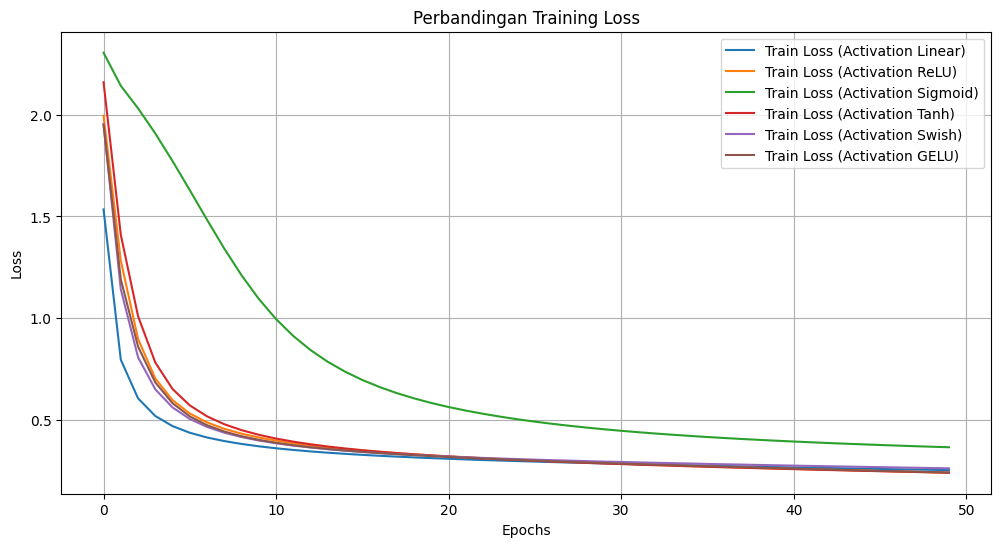

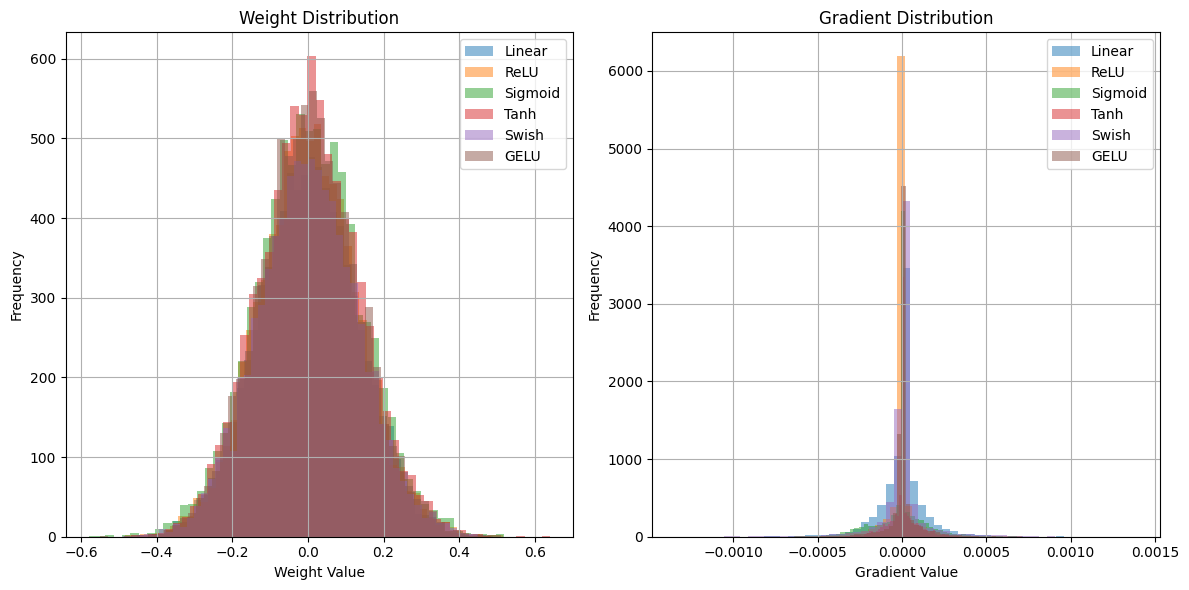

In [ ]:
activation_models = {}
activation_histories = {}
activation_accuracies = {}

# List fungsi aktivasi
activations = ["linear", "relu", "sigmoid", "tanh", "swish", "gelu"]

for activation in activations:
    print(f"Training model with activation {activation}")

    model = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, activation, "relu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )

    history = model.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        verbose=1,
        early_stopping_patience=3,
    )

    pred = model.forward(X_test)
    pred_classes = np.argmax(pred, axis=1)
    accuracy = np.mean(pred_classes == y_test)

    activation_models[activation] = model
    activation_histories[activation] = history
    activation_accuracies[activation] = accuracy
    
    print(f"Test Accuracy (Activation {activation}): {accuracy:.4f}\n")

# Plot perbandingan loss untuk semua aktivasi
plt.figure(figsize=(12, 6))
for activation in activations:
    plt.plot(
        activation_histories[activation]["train_loss"], 
        label=f"Train Loss ({activation})"
    )
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for activation, model in activation_models.items():
    print(f"\nWeight Distribution for {activation} activation:")
    model.plot_weight_distribution([0, 1])

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for activation, model in activation_models.items():
    print(f"\nGradient Distribution for {activation} activation:")
    model.plot_gradient_distribution([0, 1])


plt.figure(figsize=(12, 6))

# Plot perbandingan distribusi bobot
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison")

for activation, model in activation_models.items():
    plt.hist(
        model.layers[0].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=activation
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison")

for activation, model in activation_models.items():
    plt.hist(
        model.layers[0].gradients['weights'].flatten(),
        bins=50, alpha=0.5, label=activation,
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print("\n--- Accuracy Summary ---")
for activation, accuracy in activation_accuracies.items():
    print(f"Activation {activation}: {accuracy:.4f}")

### Pengaruh Learning Rate

Training model with learning rate: 0.001


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1559.11it/s]


Epoch 1/50, Train Loss: 2.5019, Val Loss: 2.2872, Val Acc: 0.1487


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1602.45it/s]


Epoch 2/50, Train Loss: 2.2122, Val Loss: 2.1503, Val Acc: 0.2680


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1602.32it/s]


Epoch 3/50, Train Loss: 2.0924, Val Loss: 2.0371, Val Acc: 0.3578


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1526.37it/s]


Epoch 4/50, Train Loss: 1.9820, Val Loss: 1.9294, Val Acc: 0.4193


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1555.31it/s]


Epoch 5/50, Train Loss: 1.8765, Val Loss: 1.8264, Val Acc: 0.4838


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1498.83it/s]


Epoch 6/50, Train Loss: 1.7761, Val Loss: 1.7285, Val Acc: 0.5313


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1538.87it/s]


Epoch 7/50, Train Loss: 1.6806, Val Loss: 1.6355, Val Acc: 0.5751


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1611.45it/s]


Epoch 8/50, Train Loss: 1.5899, Val Loss: 1.5476, Val Acc: 0.6105


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1502.90it/s]


Epoch 9/50, Train Loss: 1.5045, Val Loss: 1.4649, Val Acc: 0.6419


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1601.21it/s]


Epoch 10/50, Train Loss: 1.4246, Val Loss: 1.3884, Val Acc: 0.6679


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1608.35it/s]


Epoch 11/50, Train Loss: 1.3507, Val Loss: 1.3179, Val Acc: 0.6905


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1588.39it/s]


Epoch 12/50, Train Loss: 1.2826, Val Loss: 1.2531, Val Acc: 0.7084


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1517.18it/s]


Epoch 13/50, Train Loss: 1.2203, Val Loss: 1.1940, Val Acc: 0.7196


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1483.23it/s]


Epoch 14/50, Train Loss: 1.1632, Val Loss: 1.1399, Val Acc: 0.7329


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1587.82it/s]


Epoch 15/50, Train Loss: 1.1110, Val Loss: 1.0903, Val Acc: 0.7434


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1537.37it/s]


Epoch 16/50, Train Loss: 1.0631, Val Loss: 1.0455, Val Acc: 0.7513


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1517.33it/s]


Epoch 17/50, Train Loss: 1.0195, Val Loss: 1.0039, Val Acc: 0.7612


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1493.77it/s]


Epoch 18/50, Train Loss: 0.9795, Val Loss: 0.9660, Val Acc: 0.7704


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1544.67it/s]


Epoch 19/50, Train Loss: 0.9430, Val Loss: 0.9314, Val Acc: 0.7764


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1022.33it/s]


Epoch 20/50, Train Loss: 0.9094, Val Loss: 0.8997, Val Acc: 0.7830


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1568.78it/s]


Epoch 21/50, Train Loss: 0.8787, Val Loss: 0.8705, Val Acc: 0.7887


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1607.13it/s]


Epoch 22/50, Train Loss: 0.8504, Val Loss: 0.8437, Val Acc: 0.7930


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1632.25it/s]


Epoch 23/50, Train Loss: 0.8244, Val Loss: 0.8190, Val Acc: 0.7978


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1603.31it/s]


Epoch 24/50, Train Loss: 0.8003, Val Loss: 0.7962, Val Acc: 0.8029


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1632.44it/s]


Epoch 25/50, Train Loss: 0.7781, Val Loss: 0.7751, Val Acc: 0.8062


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1616.40it/s]


Epoch 26/50, Train Loss: 0.7576, Val Loss: 0.7556, Val Acc: 0.8086


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1594.91it/s]


Epoch 27/50, Train Loss: 0.7385, Val Loss: 0.7374, Val Acc: 0.8129


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1629.67it/s]


Epoch 28/50, Train Loss: 0.7208, Val Loss: 0.7205, Val Acc: 0.8150


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1555.84it/s]


Epoch 29/50, Train Loss: 0.7042, Val Loss: 0.7048, Val Acc: 0.8181


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1501.04it/s]


Epoch 30/50, Train Loss: 0.6888, Val Loss: 0.6901, Val Acc: 0.8216


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1571.42it/s]


Epoch 31/50, Train Loss: 0.6743, Val Loss: 0.6761, Val Acc: 0.8249


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1328.19it/s]


Epoch 32/50, Train Loss: 0.6608, Val Loss: 0.6633, Val Acc: 0.8279


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1315.92it/s]


Epoch 33/50, Train Loss: 0.6481, Val Loss: 0.6510, Val Acc: 0.8311


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1369.26it/s]


Epoch 34/50, Train Loss: 0.6362, Val Loss: 0.6395, Val Acc: 0.8336


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1320.52it/s]


Epoch 35/50, Train Loss: 0.6250, Val Loss: 0.6290, Val Acc: 0.8359


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1239.75it/s]


Epoch 36/50, Train Loss: 0.6144, Val Loss: 0.6188, Val Acc: 0.8380


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1421.46it/s]


Epoch 37/50, Train Loss: 0.6044, Val Loss: 0.6091, Val Acc: 0.8396


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1449.33it/s]


Epoch 38/50, Train Loss: 0.5949, Val Loss: 0.5999, Val Acc: 0.8423


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1410.76it/s]


Epoch 39/50, Train Loss: 0.5860, Val Loss: 0.5913, Val Acc: 0.8441


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1496.00it/s]


Epoch 40/50, Train Loss: 0.5775, Val Loss: 0.5833, Val Acc: 0.8454


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1493.08it/s]


Epoch 41/50, Train Loss: 0.5695, Val Loss: 0.5754, Val Acc: 0.8483


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1553.81it/s]


Epoch 42/50, Train Loss: 0.5618, Val Loss: 0.5681, Val Acc: 0.8494


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1582.67it/s]


Epoch 43/50, Train Loss: 0.5545, Val Loss: 0.5610, Val Acc: 0.8512


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1455.42it/s]


Epoch 44/50, Train Loss: 0.5476, Val Loss: 0.5543, Val Acc: 0.8525


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1483.57it/s]


Epoch 45/50, Train Loss: 0.5409, Val Loss: 0.5478, Val Acc: 0.8546


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1477.01it/s]


Epoch 46/50, Train Loss: 0.5346, Val Loss: 0.5418, Val Acc: 0.8553


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1448.04it/s]


Epoch 47/50, Train Loss: 0.5286, Val Loss: 0.5359, Val Acc: 0.8563


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1589.10it/s]


Epoch 48/50, Train Loss: 0.5228, Val Loss: 0.5303, Val Acc: 0.8577


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1511.97it/s]


Epoch 49/50, Train Loss: 0.5173, Val Loss: 0.5250, Val Acc: 0.8591


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1416.96it/s]


Epoch 50/50, Train Loss: 0.5120, Val Loss: 0.5198, Val Acc: 0.8603
Test Accuracy (Learning Rate 0.001): 0.8608

Training model with learning rate: 0.01


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1416.89it/s]


Epoch 1/50, Train Loss: 1.8598, Val Loss: 1.4187, Val Acc: 0.6456


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1344.69it/s]


Epoch 2/50, Train Loss: 1.1451, Val Loss: 0.9443, Val Acc: 0.7804


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1542.15it/s]


Epoch 3/50, Train Loss: 0.8168, Val Loss: 0.7285, Val Acc: 0.8275


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1521.01it/s]


Epoch 4/50, Train Loss: 0.6577, Val Loss: 0.6139, Val Acc: 0.8468


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1270.93it/s]


Epoch 5/50, Train Loss: 0.5670, Val Loss: 0.5443, Val Acc: 0.8596


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1423.16it/s]


Epoch 6/50, Train Loss: 0.5092, Val Loss: 0.4974, Val Acc: 0.8666


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1509.87it/s]


Epoch 7/50, Train Loss: 0.4691, Val Loss: 0.4639, Val Acc: 0.8741


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1368.99it/s]


Epoch 8/50, Train Loss: 0.4402, Val Loss: 0.4393, Val Acc: 0.8789


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1295.74it/s]


Epoch 9/50, Train Loss: 0.4182, Val Loss: 0.4206, Val Acc: 0.8839


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1544.69it/s]


Epoch 10/50, Train Loss: 0.4008, Val Loss: 0.4054, Val Acc: 0.8863


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1415.96it/s]


Epoch 11/50, Train Loss: 0.3871, Val Loss: 0.3930, Val Acc: 0.8888


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1512.10it/s]


Epoch 12/50, Train Loss: 0.3755, Val Loss: 0.3821, Val Acc: 0.8912


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1303.63it/s]


Epoch 13/50, Train Loss: 0.3658, Val Loss: 0.3736, Val Acc: 0.8933


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1530.48it/s]


Epoch 14/50, Train Loss: 0.3573, Val Loss: 0.3658, Val Acc: 0.8962


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1447.73it/s]


Epoch 15/50, Train Loss: 0.3498, Val Loss: 0.3594, Val Acc: 0.8981


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1616.36it/s]


Epoch 16/50, Train Loss: 0.3431, Val Loss: 0.3531, Val Acc: 0.8996


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1562.58it/s]


Epoch 17/50, Train Loss: 0.3372, Val Loss: 0.3478, Val Acc: 0.9000


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1530.20it/s]


Epoch 18/50, Train Loss: 0.3319, Val Loss: 0.3430, Val Acc: 0.9002


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1484.33it/s]


Epoch 19/50, Train Loss: 0.3269, Val Loss: 0.3394, Val Acc: 0.9031


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1296.76it/s]


Epoch 20/50, Train Loss: 0.3223, Val Loss: 0.3337, Val Acc: 0.9046


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1478.11it/s]


Epoch 21/50, Train Loss: 0.3179, Val Loss: 0.3310, Val Acc: 0.9052


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1607.89it/s]


Epoch 22/50, Train Loss: 0.3140, Val Loss: 0.3263, Val Acc: 0.9065


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1480.64it/s]


Epoch 23/50, Train Loss: 0.3102, Val Loss: 0.3228, Val Acc: 0.9072


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1265.09it/s]


Epoch 24/50, Train Loss: 0.3067, Val Loss: 0.3194, Val Acc: 0.9082


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1469.91it/s]


Epoch 25/50, Train Loss: 0.3033, Val Loss: 0.3172, Val Acc: 0.9104


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1444.27it/s]


Epoch 26/50, Train Loss: 0.3001, Val Loss: 0.3137, Val Acc: 0.9102


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1434.40it/s]


Epoch 27/50, Train Loss: 0.2971, Val Loss: 0.3106, Val Acc: 0.9090


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1377.64it/s]


Epoch 28/50, Train Loss: 0.2941, Val Loss: 0.3077, Val Acc: 0.9116


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1546.42it/s]


Epoch 29/50, Train Loss: 0.2914, Val Loss: 0.3053, Val Acc: 0.9129


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1519.72it/s]


Epoch 30/50, Train Loss: 0.2886, Val Loss: 0.3027, Val Acc: 0.9113


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1420.96it/s]


Epoch 31/50, Train Loss: 0.2859, Val Loss: 0.3002, Val Acc: 0.9131


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1349.87it/s]


Epoch 32/50, Train Loss: 0.2835, Val Loss: 0.2985, Val Acc: 0.9137


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1250.45it/s]


Epoch 33/50, Train Loss: 0.2809, Val Loss: 0.2959, Val Acc: 0.9146


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1450.34it/s]


Epoch 34/50, Train Loss: 0.2786, Val Loss: 0.2948, Val Acc: 0.9152


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1458.66it/s]


Epoch 35/50, Train Loss: 0.2763, Val Loss: 0.2917, Val Acc: 0.9160


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1567.67it/s]


Epoch 36/50, Train Loss: 0.2740, Val Loss: 0.2893, Val Acc: 0.9163


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1346.44it/s]


Epoch 37/50, Train Loss: 0.2717, Val Loss: 0.2877, Val Acc: 0.9178


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1349.28it/s]


Epoch 38/50, Train Loss: 0.2695, Val Loss: 0.2857, Val Acc: 0.9175


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1377.51it/s]


Epoch 39/50, Train Loss: 0.2675, Val Loss: 0.2839, Val Acc: 0.9184


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1522.35it/s]


Epoch 40/50, Train Loss: 0.2655, Val Loss: 0.2821, Val Acc: 0.9183


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1486.56it/s]


Epoch 41/50, Train Loss: 0.2634, Val Loss: 0.2803, Val Acc: 0.9196


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1472.32it/s]


Epoch 42/50, Train Loss: 0.2614, Val Loss: 0.2778, Val Acc: 0.9202


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1472.67it/s]


Epoch 43/50, Train Loss: 0.2594, Val Loss: 0.2758, Val Acc: 0.9210


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1315.79it/s]


Epoch 44/50, Train Loss: 0.2575, Val Loss: 0.2753, Val Acc: 0.9214


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1467.50it/s]


Epoch 45/50, Train Loss: 0.2554, Val Loss: 0.2725, Val Acc: 0.9216


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1555.67it/s]


Epoch 46/50, Train Loss: 0.2536, Val Loss: 0.2710, Val Acc: 0.9220


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1528.07it/s]


Epoch 47/50, Train Loss: 0.2518, Val Loss: 0.2695, Val Acc: 0.9222


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1474.77it/s]


Epoch 48/50, Train Loss: 0.2500, Val Loss: 0.2672, Val Acc: 0.9229


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1546.25it/s]


Epoch 49/50, Train Loss: 0.2482, Val Loss: 0.2663, Val Acc: 0.9237


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1490.49it/s]


Epoch 50/50, Train Loss: 0.2464, Val Loss: 0.2637, Val Acc: 0.9245
Test Accuracy (Learning Rate 0.01): 0.9270

Training model with learning rate: 0.1


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1454.75it/s]


Epoch 1/50, Train Loss: 0.7654, Val Loss: 0.4109, Val Acc: 0.8813


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1394.88it/s]


Epoch 2/50, Train Loss: 0.3564, Val Loss: 0.3377, Val Acc: 0.9029


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1488.55it/s]


Epoch 3/50, Train Loss: 0.3118, Val Loss: 0.3051, Val Acc: 0.9117


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1435.55it/s]


Epoch 4/50, Train Loss: 0.2859, Val Loss: 0.2874, Val Acc: 0.9158


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1329.70it/s]


Epoch 5/50, Train Loss: 0.2665, Val Loss: 0.2723, Val Acc: 0.9210


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1375.36it/s]


Epoch 6/50, Train Loss: 0.2500, Val Loss: 0.2548, Val Acc: 0.9279


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1178.72it/s]


Epoch 7/50, Train Loss: 0.2350, Val Loss: 0.2465, Val Acc: 0.9284


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1286.83it/s]


Epoch 8/50, Train Loss: 0.2213, Val Loss: 0.2375, Val Acc: 0.9319


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1292.47it/s]


Epoch 9/50, Train Loss: 0.2086, Val Loss: 0.2264, Val Acc: 0.9332


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1428.52it/s]


Epoch 10/50, Train Loss: 0.1978, Val Loss: 0.2117, Val Acc: 0.9391


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1331.36it/s]


Epoch 11/50, Train Loss: 0.1865, Val Loss: 0.2039, Val Acc: 0.9402


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1377.46it/s]


Epoch 12/50, Train Loss: 0.1762, Val Loss: 0.1968, Val Acc: 0.9423


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1455.12it/s]


Epoch 13/50, Train Loss: 0.1665, Val Loss: 0.1876, Val Acc: 0.9437


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1250.07it/s]


Epoch 14/50, Train Loss: 0.1578, Val Loss: 0.1790, Val Acc: 0.9472


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1294.27it/s]


Epoch 15/50, Train Loss: 0.1501, Val Loss: 0.1733, Val Acc: 0.9489


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1306.08it/s]


Epoch 16/50, Train Loss: 0.1425, Val Loss: 0.1687, Val Acc: 0.9500


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1441.92it/s]


Epoch 17/50, Train Loss: 0.1357, Val Loss: 0.1622, Val Acc: 0.9522


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1459.19it/s]


Epoch 18/50, Train Loss: 0.1294, Val Loss: 0.1566, Val Acc: 0.9531


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1469.42it/s]


Epoch 19/50, Train Loss: 0.1238, Val Loss: 0.1557, Val Acc: 0.9529


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1435.23it/s]


Epoch 20/50, Train Loss: 0.1184, Val Loss: 0.1499, Val Acc: 0.9567


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1449.45it/s]


Epoch 21/50, Train Loss: 0.1138, Val Loss: 0.1455, Val Acc: 0.9567


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1424.39it/s]


Epoch 22/50, Train Loss: 0.1090, Val Loss: 0.1391, Val Acc: 0.9593


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1469.21it/s]


Epoch 23/50, Train Loss: 0.1046, Val Loss: 0.1389, Val Acc: 0.9582


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1461.92it/s]


Epoch 24/50, Train Loss: 0.1009, Val Loss: 0.1343, Val Acc: 0.9604


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1450.99it/s]


Epoch 25/50, Train Loss: 0.0967, Val Loss: 0.1306, Val Acc: 0.9625


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1431.44it/s]


Epoch 26/50, Train Loss: 0.0939, Val Loss: 0.1264, Val Acc: 0.9639


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1466.65it/s]


Epoch 27/50, Train Loss: 0.0901, Val Loss: 0.1273, Val Acc: 0.9625


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1338.39it/s]


Epoch 28/50, Train Loss: 0.0868, Val Loss: 0.1224, Val Acc: 0.9644


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1271.26it/s]


Epoch 29/50, Train Loss: 0.0837, Val Loss: 0.1203, Val Acc: 0.9644


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1360.64it/s]


Epoch 30/50, Train Loss: 0.0811, Val Loss: 0.1201, Val Acc: 0.9645


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1358.44it/s]


Epoch 31/50, Train Loss: 0.0785, Val Loss: 0.1182, Val Acc: 0.9649


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1442.95it/s]


Epoch 32/50, Train Loss: 0.0758, Val Loss: 0.1166, Val Acc: 0.9656


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1452.20it/s]


Epoch 33/50, Train Loss: 0.0733, Val Loss: 0.1134, Val Acc: 0.9660


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1385.43it/s]


Epoch 34/50, Train Loss: 0.0711, Val Loss: 0.1127, Val Acc: 0.9676


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1304.33it/s]


Epoch 35/50, Train Loss: 0.0688, Val Loss: 0.1123, Val Acc: 0.9671


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1397.42it/s]


Epoch 36/50, Train Loss: 0.0664, Val Loss: 0.1124, Val Acc: 0.9678


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1418.29it/s]


Epoch 37/50, Train Loss: 0.0647, Val Loss: 0.1086, Val Acc: 0.9685


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1419.76it/s]


Epoch 38/50, Train Loss: 0.0625, Val Loss: 0.1077, Val Acc: 0.9679


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1451.11it/s]


Epoch 39/50, Train Loss: 0.0608, Val Loss: 0.1088, Val Acc: 0.9678


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1437.92it/s]


Epoch 40/50, Train Loss: 0.0588, Val Loss: 0.1072, Val Acc: 0.9694


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1482.30it/s]


Epoch 41/50, Train Loss: 0.0573, Val Loss: 0.1065, Val Acc: 0.9693


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1487.27it/s]


Epoch 42/50, Train Loss: 0.0557, Val Loss: 0.1047, Val Acc: 0.9697


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1416.47it/s]


Epoch 43/50, Train Loss: 0.0544, Val Loss: 0.1031, Val Acc: 0.9704


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1174.43it/s]


Epoch 44/50, Train Loss: 0.0526, Val Loss: 0.1025, Val Acc: 0.9694


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1445.96it/s]


Epoch 45/50, Train Loss: 0.0511, Val Loss: 0.1039, Val Acc: 0.9701


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1495.87it/s]


Epoch 46/50, Train Loss: 0.0494, Val Loss: 0.1020, Val Acc: 0.9702


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1382.63it/s]


Epoch 47/50, Train Loss: 0.0482, Val Loss: 0.1022, Val Acc: 0.9702


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1275.54it/s]


Epoch 48/50, Train Loss: 0.0465, Val Loss: 0.1038, Val Acc: 0.9692


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1376.05it/s]


Epoch 49/50, Train Loss: 0.0457, Val Loss: 0.1010, Val Acc: 0.9706


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1373.76it/s]


Epoch 50/50, Train Loss: 0.0444, Val Loss: 0.0997, Val Acc: 0.9707
Test Accuracy (Learning Rate 0.1): 0.9694



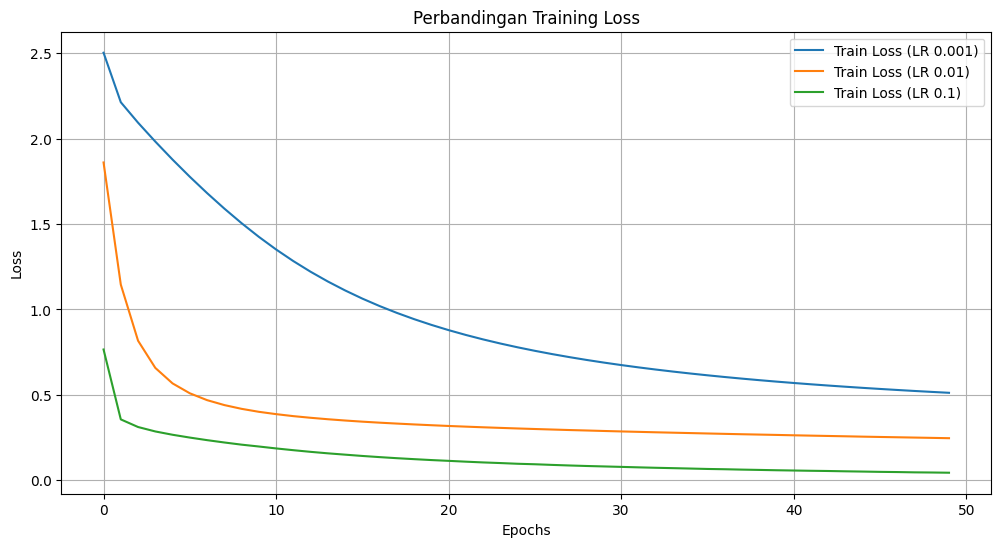

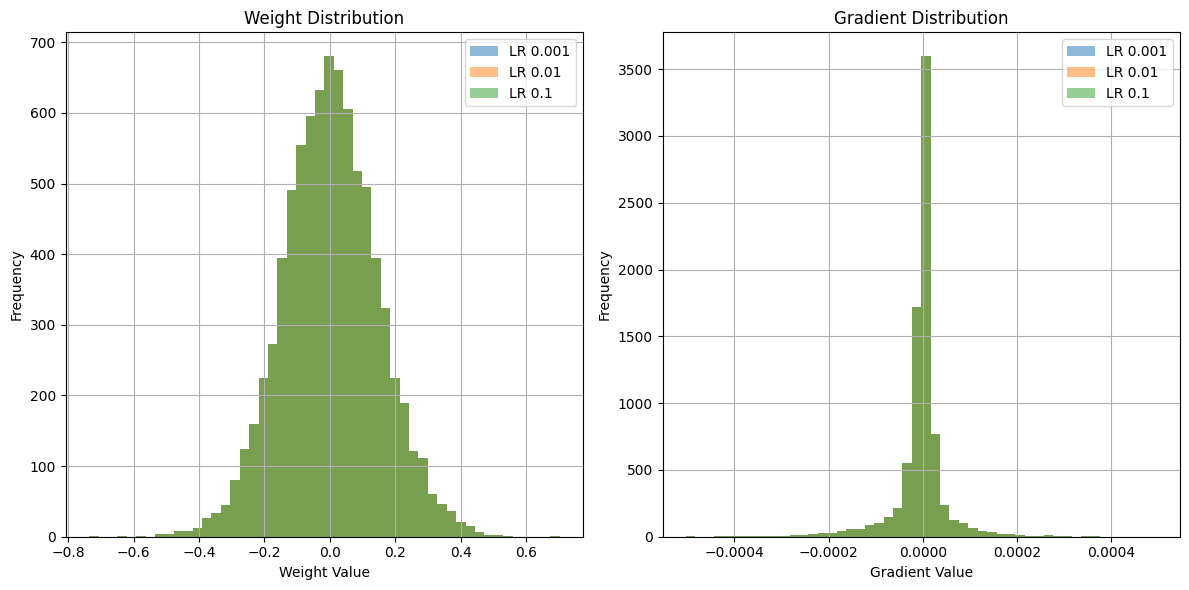

In [ ]:
# Variasi learning rate
learning_rates = [0.001, 0.01, 0.1]
results = {}
histories = {}
models = {}

for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")
    model_lr = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "swish", "gelu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )
    history_lr = model_lr.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=lr,
        epochs=50,
        momentum=0.9,
        verbose=1,
        early_stopping_patience=3,
    )
    histories[lr] = history_lr
    models[lr] = model_lr
    pred_lr = model_lr.forward(X_test)
    pred_classes_lr = np.argmax(pred_lr, axis=1)
    accuracy_lr = np.mean(pred_classes_lr == y_test)
    results[lr] = accuracy_lr
    print(f"Test Accuracy (Learning Rate {lr}): {accuracy_lr:.4f}\n")

# Plot perbandingan loss
plt.figure(figsize=(12, 6))
plt.plot(
    histories[0.001]["train_loss"], label="Train Loss (LR 0.001)"
)
plt.plot(
    histories[0.01]["train_loss"], label="Train Loss (LR 0.01)"
)
plt.plot(
    histories[0.1]["train_loss"], label="Train Loss (LR 0.1)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot
print("Weight Distributions by Learning Rate:")
for lr, model in models.items():
    print(f"\nModel with Learning Rate: {lr}")
    model.plot_weight_distribution([0, 1, 2])

# Plot distribusi gradien
print("\nGradient Distributions by Learning Rate:")
for lr, model in models.items():
    print(f"\nModel with Learning Rate: {lr}")
    model.plot_gradient_distribution([0, 1, 2])

# Plot perbandingan distribusi bobot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison")

for lr, model in models.items():
    plt.hist(
        model.layers[0].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=f"LR {lr}"
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison")

for lr, model in models.items():
    plt.hist(
        model.layers[0].gradients['weights'].flatten(),
        bins=50, alpha=0.5, label=f"LR {lr}",
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for lr, accuracy in results.items():
    print(f"Learning Rate {lr}: {accuracy:.4f}")


### Pengaruh Inisialisasi Bobot

Training model with Zero initializer


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1854.13it/s]


Epoch 1/50, Train Loss: 2.3025, Val Loss: 2.3023, Val Acc: 0.1138


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1700.33it/s]


Epoch 2/50, Train Loss: 2.3022, Val Loss: 2.3021, Val Acc: 0.1138


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1836.90it/s]


Epoch 3/50, Train Loss: 2.3020, Val Loss: 2.3020, Val Acc: 0.1138


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1803.30it/s]


Epoch 4/50, Train Loss: 2.3018, Val Loss: 2.3018, Val Acc: 0.1138


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1646.92it/s]


Epoch 5/50, Train Loss: 2.3017, Val Loss: 2.3017, Val Acc: 0.1138


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1427.68it/s]


Epoch 6/50, Train Loss: 2.3016, Val Loss: 2.3016, Val Acc: 0.1138


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1795.18it/s]


Epoch 7/50, Train Loss: 2.3015, Val Loss: 2.3016, Val Acc: 0.1138


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1582.42it/s]


Epoch 8/50, Train Loss: 2.3015, Val Loss: 2.3015, Val Acc: 0.1138


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1568.91it/s]


Epoch 9/50, Train Loss: 2.3014, Val Loss: 2.3015, Val Acc: 0.1138


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1571.19it/s]


Epoch 10/50, Train Loss: 2.3014, Val Loss: 2.3015, Val Acc: 0.1138


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1619.14it/s]


Epoch 11/50, Train Loss: 2.3013, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1618.99it/s]


Epoch 12/50, Train Loss: 2.3013, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1583.92it/s]


Epoch 13/50, Train Loss: 2.3013, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1534.87it/s]


Epoch 14/50, Train Loss: 2.3013, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1467.11it/s]


Epoch 15/50, Train Loss: 2.3013, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1615.30it/s]


Epoch 16/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1465.09it/s]


Epoch 17/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1809.84it/s]


Epoch 18/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1824.88it/s]


Epoch 19/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1840.23it/s]


Epoch 20/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1832.08it/s]


Epoch 21/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1758.38it/s]


Epoch 22/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1833.61it/s]


Epoch 23/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1843.14it/s]


Epoch 24/50, Train Loss: 2.3012, Val Loss: 2.3014, Val Acc: 0.1138


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1674.52it/s]



Early stopping at epoch 25
Test Accuracy (Zero Initializer): 0.1143

Training model with Uniform initializer


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1525.80it/s]


Epoch 1/50, Train Loss: 2.2906, Val Loss: 2.2777, Val Acc: 0.1672


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1494.34it/s]


Epoch 2/50, Train Loss: 2.2635, Val Loss: 2.2477, Val Acc: 0.3226


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1468.45it/s]


Epoch 3/50, Train Loss: 2.2281, Val Loss: 2.2047, Val Acc: 0.5294


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1524.57it/s]


Epoch 4/50, Train Loss: 2.1718, Val Loss: 2.1300, Val Acc: 0.6319


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1523.13it/s]


Epoch 5/50, Train Loss: 2.0654, Val Loss: 1.9814, Val Acc: 0.6345


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1566.42it/s]


Epoch 6/50, Train Loss: 1.8578, Val Loss: 1.7091, Val Acc: 0.6507


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1357.16it/s]


Epoch 7/50, Train Loss: 1.5295, Val Loss: 1.3466, Val Acc: 0.7081


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1472.46it/s]


Epoch 8/50, Train Loss: 1.1797, Val Loss: 1.0425, Val Acc: 0.7459


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1443.10it/s]


Epoch 9/50, Train Loss: 0.9337, Val Loss: 0.8584, Val Acc: 0.7798


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1324.01it/s]


Epoch 10/50, Train Loss: 0.7859, Val Loss: 0.7452, Val Acc: 0.8039


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1431.62it/s]


Epoch 11/50, Train Loss: 0.6911, Val Loss: 0.6680, Val Acc: 0.8204


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1441.20it/s]


Epoch 12/50, Train Loss: 0.6245, Val Loss: 0.6118, Val Acc: 0.8337


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1415.53it/s]


Epoch 13/50, Train Loss: 0.5751, Val Loss: 0.5692, Val Acc: 0.8430


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1417.42it/s]


Epoch 14/50, Train Loss: 0.5370, Val Loss: 0.5353, Val Acc: 0.8539


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1470.11it/s]


Epoch 15/50, Train Loss: 0.5068, Val Loss: 0.5074, Val Acc: 0.8629


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1394.31it/s]


Epoch 16/50, Train Loss: 0.4826, Val Loss: 0.4853, Val Acc: 0.8668


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1294.06it/s]


Epoch 17/50, Train Loss: 0.4626, Val Loss: 0.4674, Val Acc: 0.8705


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1476.61it/s]


Epoch 18/50, Train Loss: 0.4460, Val Loss: 0.4523, Val Acc: 0.8749


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1603.05it/s]


Epoch 19/50, Train Loss: 0.4318, Val Loss: 0.4386, Val Acc: 0.8788


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1601.82it/s]


Epoch 20/50, Train Loss: 0.4196, Val Loss: 0.4273, Val Acc: 0.8807


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1577.60it/s]


Epoch 21/50, Train Loss: 0.4091, Val Loss: 0.4174, Val Acc: 0.8838


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1532.70it/s]


Epoch 22/50, Train Loss: 0.3997, Val Loss: 0.4078, Val Acc: 0.8865


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1568.98it/s]


Epoch 23/50, Train Loss: 0.3915, Val Loss: 0.4006, Val Acc: 0.8857


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1620.92it/s]


Epoch 24/50, Train Loss: 0.3840, Val Loss: 0.3925, Val Acc: 0.8895


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1558.81it/s]


Epoch 25/50, Train Loss: 0.3770, Val Loss: 0.3863, Val Acc: 0.8905


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1602.34it/s]


Epoch 26/50, Train Loss: 0.3707, Val Loss: 0.3802, Val Acc: 0.8938


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1579.81it/s]


Epoch 27/50, Train Loss: 0.3649, Val Loss: 0.3746, Val Acc: 0.8940


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1595.39it/s]


Epoch 28/50, Train Loss: 0.3596, Val Loss: 0.3701, Val Acc: 0.8942


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1615.40it/s]


Epoch 29/50, Train Loss: 0.3544, Val Loss: 0.3662, Val Acc: 0.8953


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1618.54it/s]


Epoch 30/50, Train Loss: 0.3499, Val Loss: 0.3607, Val Acc: 0.8973


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1506.93it/s]


Epoch 31/50, Train Loss: 0.3453, Val Loss: 0.3576, Val Acc: 0.8982


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1213.92it/s]


Epoch 32/50, Train Loss: 0.3413, Val Loss: 0.3530, Val Acc: 0.8988


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1432.77it/s]


Epoch 33/50, Train Loss: 0.3375, Val Loss: 0.3493, Val Acc: 0.9003


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1300.30it/s]


Epoch 34/50, Train Loss: 0.3335, Val Loss: 0.3456, Val Acc: 0.9013


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1406.66it/s]


Epoch 35/50, Train Loss: 0.3302, Val Loss: 0.3433, Val Acc: 0.9025


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1481.37it/s]


Epoch 36/50, Train Loss: 0.3268, Val Loss: 0.3394, Val Acc: 0.9031


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1424.98it/s]


Epoch 37/50, Train Loss: 0.3236, Val Loss: 0.3359, Val Acc: 0.9042


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1400.67it/s]


Epoch 38/50, Train Loss: 0.3205, Val Loss: 0.3331, Val Acc: 0.9047


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1434.53it/s]


Epoch 39/50, Train Loss: 0.3176, Val Loss: 0.3303, Val Acc: 0.9059


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1588.71it/s]


Epoch 40/50, Train Loss: 0.3148, Val Loss: 0.3279, Val Acc: 0.9057


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1583.32it/s]


Epoch 41/50, Train Loss: 0.3121, Val Loss: 0.3253, Val Acc: 0.9069


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1529.97it/s]


Epoch 42/50, Train Loss: 0.3094, Val Loss: 0.3231, Val Acc: 0.9071


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1538.91it/s]


Epoch 43/50, Train Loss: 0.3071, Val Loss: 0.3206, Val Acc: 0.9080


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1580.59it/s]


Epoch 44/50, Train Loss: 0.3045, Val Loss: 0.3181, Val Acc: 0.9079


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1419.93it/s]


Epoch 45/50, Train Loss: 0.3023, Val Loss: 0.3164, Val Acc: 0.9085


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1427.09it/s]


Epoch 46/50, Train Loss: 0.2999, Val Loss: 0.3143, Val Acc: 0.9089


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1479.59it/s]


Epoch 47/50, Train Loss: 0.2977, Val Loss: 0.3122, Val Acc: 0.9087


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1528.60it/s]


Epoch 48/50, Train Loss: 0.2956, Val Loss: 0.3101, Val Acc: 0.9096


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1590.98it/s]


Epoch 49/50, Train Loss: 0.2936, Val Loss: 0.3087, Val Acc: 0.9103


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1490.56it/s]


Epoch 50/50, Train Loss: 0.2915, Val Loss: 0.3066, Val Acc: 0.9110
Test Accuracy (Uniform Initializer): 0.9135

Training model with Normal initializer


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1451.79it/s]


Epoch 1/50, Train Loss: 2.1909, Val Loss: 2.0097, Val Acc: 0.3937


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1452.47it/s]


Epoch 2/50, Train Loss: 1.8037, Val Loss: 1.5802, Val Acc: 0.6288


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1457.54it/s]


Epoch 3/50, Train Loss: 1.3563, Val Loss: 1.1611, Val Acc: 0.7165


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1462.36it/s]


Epoch 4/50, Train Loss: 1.0122, Val Loss: 0.9060, Val Acc: 0.7621


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1490.66it/s]


Epoch 5/50, Train Loss: 0.8155, Val Loss: 0.7637, Val Acc: 0.7920


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1454.65it/s]


Epoch 6/50, Train Loss: 0.7008, Val Loss: 0.6753, Val Acc: 0.8102


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1305.56it/s]


Epoch 7/50, Train Loss: 0.6263, Val Loss: 0.6153, Val Acc: 0.8248


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1429.24it/s]


Epoch 8/50, Train Loss: 0.5734, Val Loss: 0.5701, Val Acc: 0.8379


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1490.86it/s]


Epoch 9/50, Train Loss: 0.5336, Val Loss: 0.5358, Val Acc: 0.8449


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1505.86it/s]


Epoch 10/50, Train Loss: 0.5021, Val Loss: 0.5076, Val Acc: 0.8527


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1521.13it/s]


Epoch 11/50, Train Loss: 0.4766, Val Loss: 0.4847, Val Acc: 0.8597


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1436.99it/s]


Epoch 12/50, Train Loss: 0.4552, Val Loss: 0.4651, Val Acc: 0.8637


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1493.88it/s]


Epoch 13/50, Train Loss: 0.4371, Val Loss: 0.4485, Val Acc: 0.8686


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1539.97it/s]


Epoch 14/50, Train Loss: 0.4218, Val Loss: 0.4342, Val Acc: 0.8722


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1532.42it/s]


Epoch 15/50, Train Loss: 0.4084, Val Loss: 0.4222, Val Acc: 0.8762


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1535.22it/s]


Epoch 16/50, Train Loss: 0.3967, Val Loss: 0.4105, Val Acc: 0.8804


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1537.44it/s]


Epoch 17/50, Train Loss: 0.3863, Val Loss: 0.4006, Val Acc: 0.8830


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1541.05it/s]


Epoch 18/50, Train Loss: 0.3771, Val Loss: 0.3922, Val Acc: 0.8855


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1537.38it/s]


Epoch 19/50, Train Loss: 0.3688, Val Loss: 0.3845, Val Acc: 0.8872


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1535.28it/s]


Epoch 20/50, Train Loss: 0.3612, Val Loss: 0.3777, Val Acc: 0.8890


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1543.39it/s]


Epoch 21/50, Train Loss: 0.3543, Val Loss: 0.3710, Val Acc: 0.8916


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1336.65it/s]


Epoch 22/50, Train Loss: 0.3479, Val Loss: 0.3643, Val Acc: 0.8941


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1478.75it/s]


Epoch 23/50, Train Loss: 0.3421, Val Loss: 0.3588, Val Acc: 0.8951


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1441.12it/s]


Epoch 24/50, Train Loss: 0.3367, Val Loss: 0.3537, Val Acc: 0.8971


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1520.00it/s]


Epoch 25/50, Train Loss: 0.3316, Val Loss: 0.3492, Val Acc: 0.8977


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1492.21it/s]


Epoch 26/50, Train Loss: 0.3268, Val Loss: 0.3441, Val Acc: 0.8997


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1474.41it/s]


Epoch 27/50, Train Loss: 0.3221, Val Loss: 0.3399, Val Acc: 0.9009


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1484.06it/s]


Epoch 28/50, Train Loss: 0.3179, Val Loss: 0.3361, Val Acc: 0.9007


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1518.84it/s]


Epoch 29/50, Train Loss: 0.3139, Val Loss: 0.3317, Val Acc: 0.9021


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1429.97it/s]


Epoch 30/50, Train Loss: 0.3099, Val Loss: 0.3275, Val Acc: 0.9040


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1514.68it/s]


Epoch 31/50, Train Loss: 0.3063, Val Loss: 0.3242, Val Acc: 0.9050


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1472.88it/s]


Epoch 32/50, Train Loss: 0.3026, Val Loss: 0.3212, Val Acc: 0.9053


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1513.05it/s]


Epoch 33/50, Train Loss: 0.2993, Val Loss: 0.3179, Val Acc: 0.9075


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1533.72it/s]


Epoch 34/50, Train Loss: 0.2960, Val Loss: 0.3147, Val Acc: 0.9084


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1541.38it/s]


Epoch 35/50, Train Loss: 0.2926, Val Loss: 0.3122, Val Acc: 0.9087


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1551.03it/s]


Epoch 36/50, Train Loss: 0.2897, Val Loss: 0.3085, Val Acc: 0.9096


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1362.67it/s]


Epoch 37/50, Train Loss: 0.2865, Val Loss: 0.3063, Val Acc: 0.9100


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1530.94it/s]


Epoch 38/50, Train Loss: 0.2838, Val Loss: 0.3029, Val Acc: 0.9121


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1547.10it/s]


Epoch 39/50, Train Loss: 0.2808, Val Loss: 0.3004, Val Acc: 0.9121


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1482.45it/s]


Epoch 40/50, Train Loss: 0.2782, Val Loss: 0.2974, Val Acc: 0.9143


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1547.03it/s]


Epoch 41/50, Train Loss: 0.2754, Val Loss: 0.2947, Val Acc: 0.9149


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1547.84it/s]


Epoch 42/50, Train Loss: 0.2727, Val Loss: 0.2923, Val Acc: 0.9154


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1463.38it/s]


Epoch 43/50, Train Loss: 0.2702, Val Loss: 0.2899, Val Acc: 0.9154


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1554.05it/s]


Epoch 44/50, Train Loss: 0.2676, Val Loss: 0.2877, Val Acc: 0.9164


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1516.83it/s]


Epoch 45/50, Train Loss: 0.2652, Val Loss: 0.2855, Val Acc: 0.9170


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1500.19it/s]


Epoch 46/50, Train Loss: 0.2628, Val Loss: 0.2829, Val Acc: 0.9187


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1495.65it/s]


Epoch 47/50, Train Loss: 0.2604, Val Loss: 0.2810, Val Acc: 0.9191


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1458.91it/s]


Epoch 48/50, Train Loss: 0.2580, Val Loss: 0.2788, Val Acc: 0.9201


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1427.25it/s]


Epoch 49/50, Train Loss: 0.2559, Val Loss: 0.2763, Val Acc: 0.9200


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1488.30it/s]


Epoch 50/50, Train Loss: 0.2536, Val Loss: 0.2744, Val Acc: 0.9215
Test Accuracy (Normal Initializer): 0.9224

Training model with Xavier initializer


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1436.90it/s]


Epoch 1/50, Train Loss: 2.1949, Val Loss: 2.0076, Val Acc: 0.4333


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1317.21it/s]


Epoch 2/50, Train Loss: 1.7727, Val Loss: 1.5152, Val Acc: 0.6496


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1496.79it/s]


Epoch 3/50, Train Loss: 1.2607, Val Loss: 1.0421, Val Acc: 0.7571


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1531.81it/s]


Epoch 4/50, Train Loss: 0.8911, Val Loss: 0.7828, Val Acc: 0.8069


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1503.19it/s]


Epoch 5/50, Train Loss: 0.7007, Val Loss: 0.6492, Val Acc: 0.8325


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1525.00it/s]


Epoch 6/50, Train Loss: 0.5962, Val Loss: 0.5687, Val Acc: 0.8521


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1559.26it/s]


Epoch 7/50, Train Loss: 0.5308, Val Loss: 0.5162, Val Acc: 0.8628


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1549.64it/s]


Epoch 8/50, Train Loss: 0.4862, Val Loss: 0.4790, Val Acc: 0.8704


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1506.39it/s]


Epoch 9/50, Train Loss: 0.4539, Val Loss: 0.4513, Val Acc: 0.8773


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1597.00it/s]


Epoch 10/50, Train Loss: 0.4293, Val Loss: 0.4296, Val Acc: 0.8821


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1484.24it/s]


Epoch 11/50, Train Loss: 0.4099, Val Loss: 0.4120, Val Acc: 0.8863


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1584.15it/s]


Epoch 12/50, Train Loss: 0.3944, Val Loss: 0.3988, Val Acc: 0.8884


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1598.22it/s]


Epoch 13/50, Train Loss: 0.3814, Val Loss: 0.3866, Val Acc: 0.8918


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1603.62it/s]


Epoch 14/50, Train Loss: 0.3703, Val Loss: 0.3757, Val Acc: 0.8951


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1567.14it/s]


Epoch 15/50, Train Loss: 0.3609, Val Loss: 0.3670, Val Acc: 0.8969


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1446.68it/s]


Epoch 16/50, Train Loss: 0.3527, Val Loss: 0.3595, Val Acc: 0.8986


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1410.02it/s]


Epoch 17/50, Train Loss: 0.3455, Val Loss: 0.3528, Val Acc: 0.9008


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1605.39it/s]


Epoch 18/50, Train Loss: 0.3388, Val Loss: 0.3472, Val Acc: 0.9023


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1607.11it/s]


Epoch 19/50, Train Loss: 0.3331, Val Loss: 0.3412, Val Acc: 0.9035


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1524.07it/s]


Epoch 20/50, Train Loss: 0.3280, Val Loss: 0.3370, Val Acc: 0.9039


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1514.07it/s]


Epoch 21/50, Train Loss: 0.3229, Val Loss: 0.3317, Val Acc: 0.9058


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1545.23it/s]


Epoch 22/50, Train Loss: 0.3187, Val Loss: 0.3281, Val Acc: 0.9070


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1471.33it/s]


Epoch 23/50, Train Loss: 0.3144, Val Loss: 0.3245, Val Acc: 0.9079


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1536.66it/s]


Epoch 24/50, Train Loss: 0.3107, Val Loss: 0.3207, Val Acc: 0.9087


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1579.65it/s]


Epoch 25/50, Train Loss: 0.3072, Val Loss: 0.3181, Val Acc: 0.9087


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1580.00it/s]


Epoch 26/50, Train Loss: 0.3037, Val Loss: 0.3146, Val Acc: 0.9083


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1519.77it/s]


Epoch 27/50, Train Loss: 0.3006, Val Loss: 0.3118, Val Acc: 0.9104


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1557.41it/s]


Epoch 28/50, Train Loss: 0.2975, Val Loss: 0.3088, Val Acc: 0.9099


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1528.76it/s]


Epoch 29/50, Train Loss: 0.2947, Val Loss: 0.3055, Val Acc: 0.9116


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1529.67it/s]


Epoch 30/50, Train Loss: 0.2920, Val Loss: 0.3027, Val Acc: 0.9120


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1525.35it/s]


Epoch 31/50, Train Loss: 0.2892, Val Loss: 0.3010, Val Acc: 0.9118


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1404.06it/s]


Epoch 32/50, Train Loss: 0.2868, Val Loss: 0.2983, Val Acc: 0.9140


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1601.66it/s]


Epoch 33/50, Train Loss: 0.2844, Val Loss: 0.2968, Val Acc: 0.9114


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1600.03it/s]


Epoch 34/50, Train Loss: 0.2819, Val Loss: 0.2936, Val Acc: 0.9149


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1595.36it/s]


Epoch 35/50, Train Loss: 0.2795, Val Loss: 0.2921, Val Acc: 0.9145


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1607.03it/s]


Epoch 36/50, Train Loss: 0.2773, Val Loss: 0.2901, Val Acc: 0.9138


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1607.07it/s]


Epoch 37/50, Train Loss: 0.2751, Val Loss: 0.2879, Val Acc: 0.9160


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1595.04it/s]


Epoch 38/50, Train Loss: 0.2731, Val Loss: 0.2859, Val Acc: 0.9169


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1588.17it/s]


Epoch 39/50, Train Loss: 0.2710, Val Loss: 0.2839, Val Acc: 0.9164


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1599.53it/s]


Epoch 40/50, Train Loss: 0.2687, Val Loss: 0.2818, Val Acc: 0.9171


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1610.27it/s]


Epoch 41/50, Train Loss: 0.2667, Val Loss: 0.2805, Val Acc: 0.9178


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1599.29it/s]


Epoch 42/50, Train Loss: 0.2649, Val Loss: 0.2788, Val Acc: 0.9179


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1603.69it/s]


Epoch 43/50, Train Loss: 0.2628, Val Loss: 0.2770, Val Acc: 0.9180


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1575.39it/s]


Epoch 44/50, Train Loss: 0.2609, Val Loss: 0.2741, Val Acc: 0.9196


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1536.90it/s]


Epoch 45/50, Train Loss: 0.2589, Val Loss: 0.2734, Val Acc: 0.9199


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1564.37it/s]


Epoch 46/50, Train Loss: 0.2572, Val Loss: 0.2709, Val Acc: 0.9198


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1361.64it/s]


Epoch 47/50, Train Loss: 0.2552, Val Loss: 0.2692, Val Acc: 0.9196


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1561.53it/s]


Epoch 48/50, Train Loss: 0.2533, Val Loss: 0.2673, Val Acc: 0.9213


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1548.62it/s]


Epoch 49/50, Train Loss: 0.2514, Val Loss: 0.2666, Val Acc: 0.9211


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1513.08it/s]


Epoch 50/50, Train Loss: 0.2498, Val Loss: 0.2641, Val Acc: 0.9223
Test Accuracy (Xavier Initializer): 0.9249

Training model with He initializer


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1503.19it/s]


Epoch 1/50, Train Loss: 1.7803, Val Loss: 1.2780, Val Acc: 0.7137


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1585.91it/s]


Epoch 2/50, Train Loss: 1.0114, Val Loss: 0.8303, Val Acc: 0.8099


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1513.23it/s]


Epoch 3/50, Train Loss: 0.7208, Val Loss: 0.6505, Val Acc: 0.8373


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1601.12it/s]


Epoch 4/50, Train Loss: 0.5911, Val Loss: 0.5586, Val Acc: 0.8544


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1576.81it/s]


Epoch 5/50, Train Loss: 0.5187, Val Loss: 0.5030, Val Acc: 0.8629


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1583.04it/s]


Epoch 6/50, Train Loss: 0.4726, Val Loss: 0.4667, Val Acc: 0.8706


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1607.37it/s]


Epoch 7/50, Train Loss: 0.4407, Val Loss: 0.4410, Val Acc: 0.8754


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1440.71it/s]


Epoch 8/50, Train Loss: 0.4171, Val Loss: 0.4202, Val Acc: 0.8816


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1555.61it/s]


Epoch 9/50, Train Loss: 0.3987, Val Loss: 0.4038, Val Acc: 0.8862


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1625.32it/s]


Epoch 10/50, Train Loss: 0.3841, Val Loss: 0.3911, Val Acc: 0.8888


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1328.34it/s]


Epoch 11/50, Train Loss: 0.3719, Val Loss: 0.3803, Val Acc: 0.8908


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1629.11it/s]


Epoch 12/50, Train Loss: 0.3617, Val Loss: 0.3717, Val Acc: 0.8921


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1494.35it/s]


Epoch 13/50, Train Loss: 0.3529, Val Loss: 0.3633, Val Acc: 0.8952


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1459.70it/s]


Epoch 14/50, Train Loss: 0.3451, Val Loss: 0.3567, Val Acc: 0.8969


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1513.12it/s]


Epoch 15/50, Train Loss: 0.3383, Val Loss: 0.3502, Val Acc: 0.8979


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1456.26it/s]


Epoch 16/50, Train Loss: 0.3321, Val Loss: 0.3446, Val Acc: 0.8992


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1464.54it/s]


Epoch 17/50, Train Loss: 0.3265, Val Loss: 0.3400, Val Acc: 0.8998


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1446.37it/s]


Epoch 18/50, Train Loss: 0.3214, Val Loss: 0.3348, Val Acc: 0.9026


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1417.76it/s]


Epoch 19/50, Train Loss: 0.3166, Val Loss: 0.3306, Val Acc: 0.9034


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1328.21it/s]


Epoch 20/50, Train Loss: 0.3123, Val Loss: 0.3268, Val Acc: 0.9050


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1285.92it/s]


Epoch 21/50, Train Loss: 0.3080, Val Loss: 0.3233, Val Acc: 0.9063


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1499.48it/s]


Epoch 22/50, Train Loss: 0.3043, Val Loss: 0.3193, Val Acc: 0.9070


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1529.48it/s]


Epoch 23/50, Train Loss: 0.3005, Val Loss: 0.3161, Val Acc: 0.9077


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1542.20it/s]


Epoch 24/50, Train Loss: 0.2971, Val Loss: 0.3128, Val Acc: 0.9090


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1535.86it/s]


Epoch 25/50, Train Loss: 0.2939, Val Loss: 0.3097, Val Acc: 0.9087


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1439.74it/s]


Epoch 26/50, Train Loss: 0.2906, Val Loss: 0.3067, Val Acc: 0.9114


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1571.58it/s]


Epoch 27/50, Train Loss: 0.2876, Val Loss: 0.3044, Val Acc: 0.9121


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1596.46it/s]


Epoch 28/50, Train Loss: 0.2845, Val Loss: 0.3021, Val Acc: 0.9123


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1601.04it/s]


Epoch 29/50, Train Loss: 0.2818, Val Loss: 0.2990, Val Acc: 0.9122


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1472.79it/s]


Epoch 30/50, Train Loss: 0.2790, Val Loss: 0.2974, Val Acc: 0.9129


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1578.10it/s]


Epoch 31/50, Train Loss: 0.2764, Val Loss: 0.2944, Val Acc: 0.9140


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1547.86it/s]


Epoch 32/50, Train Loss: 0.2737, Val Loss: 0.2919, Val Acc: 0.9154


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1573.85it/s]


Epoch 33/50, Train Loss: 0.2713, Val Loss: 0.2889, Val Acc: 0.9156


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1599.21it/s]


Epoch 34/50, Train Loss: 0.2688, Val Loss: 0.2873, Val Acc: 0.9163


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1598.76it/s]


Epoch 35/50, Train Loss: 0.2664, Val Loss: 0.2848, Val Acc: 0.9182


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1556.09it/s]


Epoch 36/50, Train Loss: 0.2640, Val Loss: 0.2825, Val Acc: 0.9187


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1453.53it/s]


Epoch 37/50, Train Loss: 0.2618, Val Loss: 0.2810, Val Acc: 0.9185


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1305.61it/s]


Epoch 38/50, Train Loss: 0.2596, Val Loss: 0.2785, Val Acc: 0.9200


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1414.98it/s]


Epoch 39/50, Train Loss: 0.2573, Val Loss: 0.2767, Val Acc: 0.9205


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1400.14it/s]


Epoch 40/50, Train Loss: 0.2554, Val Loss: 0.2752, Val Acc: 0.9210


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1314.39it/s]


Epoch 41/50, Train Loss: 0.2532, Val Loss: 0.2728, Val Acc: 0.9220


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1529.19it/s]


Epoch 42/50, Train Loss: 0.2509, Val Loss: 0.2711, Val Acc: 0.9216


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1492.07it/s]


Epoch 43/50, Train Loss: 0.2492, Val Loss: 0.2690, Val Acc: 0.9226


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1560.91it/s]


Epoch 44/50, Train Loss: 0.2470, Val Loss: 0.2674, Val Acc: 0.9237


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1492.72it/s]


Epoch 45/50, Train Loss: 0.2452, Val Loss: 0.2654, Val Acc: 0.9240


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1427.99it/s]


Epoch 46/50, Train Loss: 0.2432, Val Loss: 0.2638, Val Acc: 0.9256


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1524.39it/s]


Epoch 47/50, Train Loss: 0.2414, Val Loss: 0.2629, Val Acc: 0.9243


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1452.71it/s]


Epoch 48/50, Train Loss: 0.2395, Val Loss: 0.2605, Val Acc: 0.9257


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1372.43it/s]


Epoch 49/50, Train Loss: 0.2376, Val Loss: 0.2592, Val Acc: 0.9261


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1178.42it/s]


Epoch 50/50, Train Loss: 0.2358, Val Loss: 0.2574, Val Acc: 0.9264
Test Accuracy (He Initializer): 0.9279



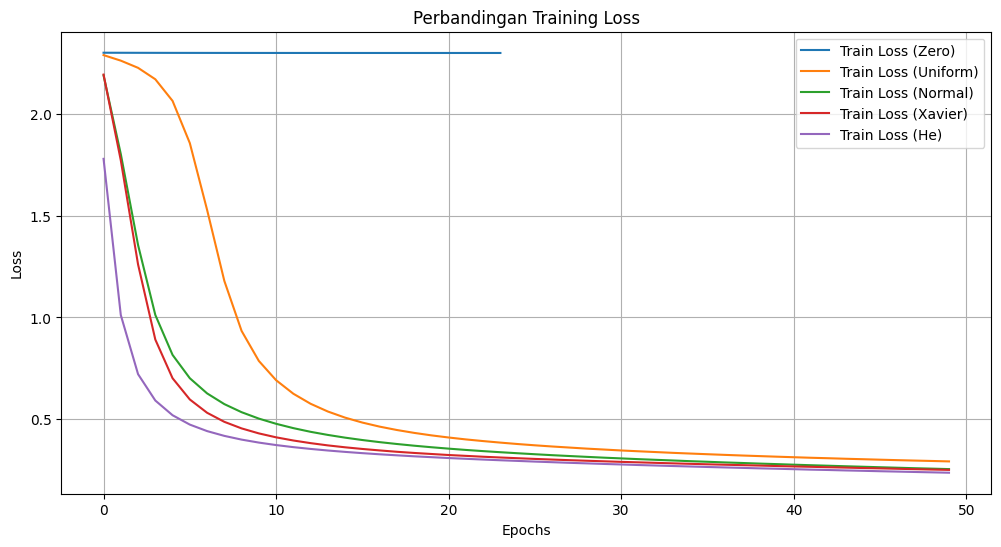

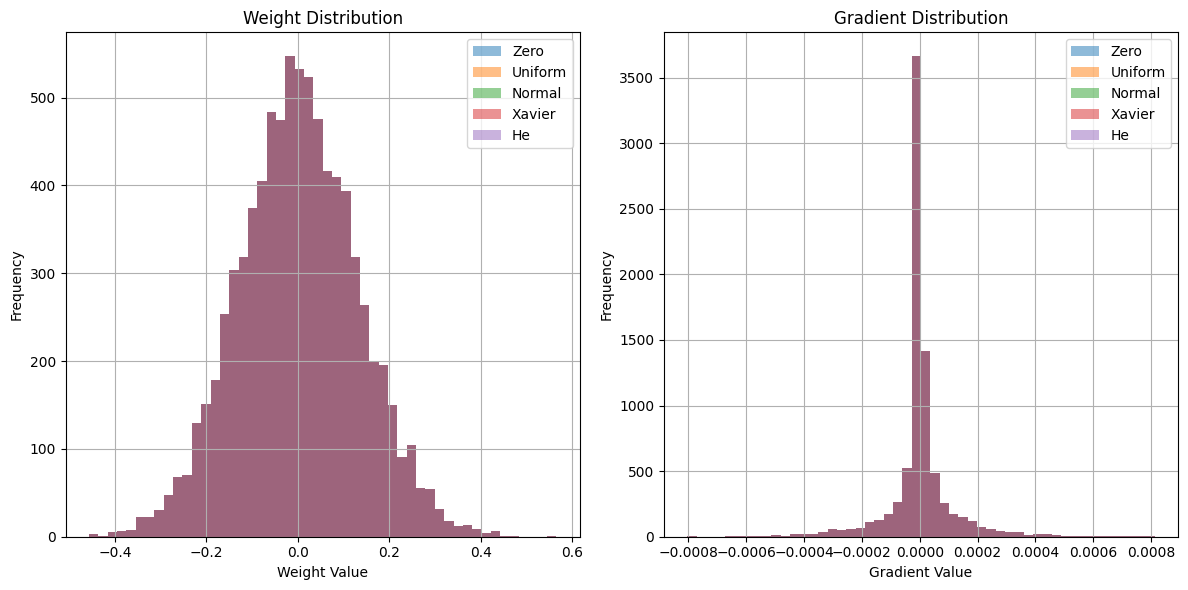

In [ ]:
# Variasi weight initializer
weight_initializers = {
    "Zero": ZeroInitializer(),
    "Uniform": UniformInitializer(),
    "Normal": NormalInitializer(),
    "Xavier": XavierInitializer(),
    "He": HeInitializer(),
}

results_initializers = {}
histories_initializers = {}
models_initializers = {}

for name, initializer in weight_initializers.items():
    print(f"Training model with {name} initializer")
    model_initializer = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "swish", "gelu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=initializer,
    )
    history_initializer = model_initializer.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        verbose=1,
        early_stopping_patience=3,
    )

    models_initializers[name] = model_initializer
    histories_initializers[name] = history_initializer

    pred_initializer = model_initializer.forward(X_test)
    pred_classes_initializer = np.argmax(pred_initializer, axis=1)
    accuracy_initializer = np.mean(pred_classes_initializer == y_test)
    results_initializers[name] = accuracy_initializer
    
    print(f"Test Accuracy ({name} Initializer): {accuracy_initializer:.4f}\n")

# Plot perbandingan loss
plt.figure(figsize=(12, 6))
for name in weight_initializers.keys():
    plt.plot(
        histories_initializers[name]["train_loss"], 
        label=f"Train Loss ({name})"
    )

plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for name, model in models_initializers.items():
    print(f"\nWeight Distribution for {name} initializer:")
    model.plot_weight_distribution([0, 1])  # Plot for specific layers

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for name, model in models_initializers.items():
    print(f"\nGradient Distribution for {name} initializer:")
    model.plot_gradient_distribution([0, 1])  # Plot for specific layers

plt.figure(figsize=(12, 6))

# Plot perbandingan distribusi bobot
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison (Layer 1)")

for name, model in models_initializers.items():
    plt.hist(
        model.layers[0].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=name
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison (Layer 1)")

for name, model in models_initializers.items():
    plt.hist(
        model.layers[0].gradients['weights'].flatten(),
        bins=50, alpha=0.5, label=name,
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for name, accuracy in results_initializers.items():
    print(f"Initializer {name}: {accuracy:.4f}")

## Perbandingan dengan MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

ffnn_model = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "relu", "relu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)
history_ffnn = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)
pred_ffnn = ffnn_model.forward(X_test)
pred_classes_ffnn = np.argmax(pred_ffnn, axis=1)
accuracy_ffnn = np.mean(pred_classes_ffnn == y_test)
print(f"Test Accuracy (FFNN): {accuracy_ffnn:.4f}\n")

mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="sgd",
    learning_rate_init=0.01,
    batch_size=64,
    max_iter=50,
    momentum=0.9,
    random_state=42,
)
mlp_model.fit(X_train, y_train_cat.argmax(axis=1))
pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = np.mean(pred_mlp == y_test)
print(f"Test Accuracy (MLPClassifier): {accuracy_mlp:.4f}\n")

# Akurasi perbandingan
print("\n--- Accuracy Summary ---")
print(f"Custom FFNN Model: {accuracy_ffnn:.4f}")
print(f"MLPClassifier: {accuracy_mlp:.4f}")

Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 2438.41it/s]


Epoch 1/50, Train Loss: 2.0642, Val Loss: 1.5402, Val Acc: 0.6204


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 2105.40it/s]


Epoch 2/50, Train Loss: 1.2718, Val Loss: 1.0473, Val Acc: 0.7545


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 2287.13it/s]


Epoch 3/50, Train Loss: 0.8979, Val Loss: 0.7920, Val Acc: 0.7974


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 2183.36it/s]


Epoch 4/50, Train Loss: 0.7099, Val Loss: 0.6565, Val Acc: 0.8287


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 2385.46it/s]


Epoch 5/50, Train Loss: 0.6022, Val Loss: 0.5734, Val Acc: 0.8469


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 2279.11it/s]


Epoch 6/50, Train Loss: 0.5347, Val Loss: 0.5192, Val Acc: 0.8592


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 2313.27it/s]


Epoch 7/50, Train Loss: 0.4889, Val Loss: 0.4812, Val Acc: 0.8681


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 2402.49it/s]


Epoch 8/50, Train Loss: 0.4556, Val Loss: 0.4528, Val Acc: 0.8746


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 2346.86it/s]


Epoch 9/50, Train Loss: 0.4304, Val Loss: 0.4312, Val Acc: 0.8787


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 2359.03it/s]


Epoch 10/50, Train Loss: 0.4110, Val Loss: 0.4149, Val Acc: 0.8824


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 2195.65it/s]


Epoch 11/50, Train Loss: 0.3952, Val Loss: 0.4007, Val Acc: 0.8843


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 2176.89it/s]


Epoch 12/50, Train Loss: 0.3822, Val Loss: 0.3892, Val Acc: 0.8869


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 2049.17it/s]


Epoch 13/50, Train Loss: 0.3712, Val Loss: 0.3793, Val Acc: 0.8909


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 2186.80it/s]


Epoch 14/50, Train Loss: 0.3617, Val Loss: 0.3702, Val Acc: 0.8929


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 2225.51it/s]


Epoch 15/50, Train Loss: 0.3532, Val Loss: 0.3626, Val Acc: 0.8958


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 2229.72it/s]


Epoch 16/50, Train Loss: 0.3462, Val Loss: 0.3568, Val Acc: 0.8947


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 2255.15it/s]


Epoch 17/50, Train Loss: 0.3395, Val Loss: 0.3505, Val Acc: 0.8981


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 2414.92it/s]


Epoch 18/50, Train Loss: 0.3336, Val Loss: 0.3442, Val Acc: 0.8993


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 2280.07it/s]


Epoch 19/50, Train Loss: 0.3282, Val Loss: 0.3397, Val Acc: 0.8996


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 2485.86it/s]


Epoch 20/50, Train Loss: 0.3231, Val Loss: 0.3348, Val Acc: 0.9012


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 2474.22it/s]


Epoch 21/50, Train Loss: 0.3185, Val Loss: 0.3317, Val Acc: 0.9012


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 2052.23it/s]


Epoch 22/50, Train Loss: 0.3141, Val Loss: 0.3268, Val Acc: 0.9029


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 2423.73it/s]


Epoch 23/50, Train Loss: 0.3100, Val Loss: 0.3227, Val Acc: 0.9040


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1970.37it/s]


Epoch 24/50, Train Loss: 0.3064, Val Loss: 0.3194, Val Acc: 0.9044


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 2509.62it/s]


Epoch 25/50, Train Loss: 0.3025, Val Loss: 0.3170, Val Acc: 0.9050


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1967.99it/s]


Epoch 26/50, Train Loss: 0.2991, Val Loss: 0.3131, Val Acc: 0.9071


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1983.97it/s]


Epoch 27/50, Train Loss: 0.2958, Val Loss: 0.3108, Val Acc: 0.9088


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 2297.54it/s]


Epoch 28/50, Train Loss: 0.2929, Val Loss: 0.3067, Val Acc: 0.9089


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 2177.94it/s]


Epoch 29/50, Train Loss: 0.2897, Val Loss: 0.3046, Val Acc: 0.9099


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 2286.03it/s]


Epoch 30/50, Train Loss: 0.2868, Val Loss: 0.3017, Val Acc: 0.9103


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1817.27it/s]


Epoch 31/50, Train Loss: 0.2839, Val Loss: 0.2986, Val Acc: 0.9121


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 2202.72it/s]


Epoch 32/50, Train Loss: 0.2813, Val Loss: 0.2962, Val Acc: 0.9129


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 2274.60it/s]


Epoch 33/50, Train Loss: 0.2787, Val Loss: 0.2939, Val Acc: 0.9135


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 2440.15it/s]


Epoch 34/50, Train Loss: 0.2760, Val Loss: 0.2916, Val Acc: 0.9147


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 2176.62it/s]


Epoch 35/50, Train Loss: 0.2735, Val Loss: 0.2890, Val Acc: 0.9147


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 2054.36it/s]


Epoch 36/50, Train Loss: 0.2711, Val Loss: 0.2873, Val Acc: 0.9162


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 2226.33it/s]


Epoch 37/50, Train Loss: 0.2687, Val Loss: 0.2851, Val Acc: 0.9163


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 2295.47it/s]


Epoch 38/50, Train Loss: 0.2663, Val Loss: 0.2833, Val Acc: 0.9171


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 2108.72it/s]


Epoch 39/50, Train Loss: 0.2639, Val Loss: 0.2807, Val Acc: 0.9174


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 2417.47it/s]


Epoch 40/50, Train Loss: 0.2619, Val Loss: 0.2784, Val Acc: 0.9186


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 2153.93it/s]


Epoch 41/50, Train Loss: 0.2595, Val Loss: 0.2766, Val Acc: 0.9192


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 2124.12it/s]


Epoch 42/50, Train Loss: 0.2574, Val Loss: 0.2746, Val Acc: 0.9191


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 2043.04it/s]


Epoch 43/50, Train Loss: 0.2553, Val Loss: 0.2727, Val Acc: 0.9206


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 2120.43it/s]


Epoch 44/50, Train Loss: 0.2532, Val Loss: 0.2725, Val Acc: 0.9196


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 2247.67it/s]


Epoch 45/50, Train Loss: 0.2510, Val Loss: 0.2685, Val Acc: 0.9226


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1842.79it/s]


Epoch 46/50, Train Loss: 0.2491, Val Loss: 0.2672, Val Acc: 0.9220


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 2017.30it/s]


Epoch 47/50, Train Loss: 0.2469, Val Loss: 0.2659, Val Acc: 0.9221


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 2149.18it/s]


Epoch 48/50, Train Loss: 0.2450, Val Loss: 0.2640, Val Acc: 0.9226


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 2064.98it/s]


Epoch 49/50, Train Loss: 0.2432, Val Loss: 0.2615, Val Acc: 0.9231


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1770.09it/s]


Epoch 50/50, Train Loss: 0.2411, Val Loss: 0.2609, Val Acc: 0.9237
Test Accuracy (FFNN): 0.9266

Test Accuracy (MLPClassifier): 0.9772



## Eksperimen regulasi L1 / L2


Training model with No Regularization


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 2382.25it/s]


Epoch 1/50, Train Loss: 1.8634, Val Loss: 1.3999, Val Acc: 0.6588


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 2291.53it/s]


Epoch 2/50, Train Loss: 1.1320, Val Loss: 0.9264, Val Acc: 0.7776


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 2342.55it/s]


Epoch 3/50, Train Loss: 0.8051, Val Loss: 0.7177, Val Acc: 0.8194


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 2343.54it/s]


Epoch 4/50, Train Loss: 0.6522, Val Loss: 0.6097, Val Acc: 0.8400


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 2261.27it/s]


Epoch 5/50, Train Loss: 0.5668, Val Loss: 0.5442, Val Acc: 0.8529


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 2362.57it/s]


Epoch 6/50, Train Loss: 0.5121, Val Loss: 0.4998, Val Acc: 0.8615


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 2332.00it/s]


Epoch 7/50, Train Loss: 0.4735, Val Loss: 0.4675, Val Acc: 0.8699


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 2230.39it/s]


Epoch 8/50, Train Loss: 0.4449, Val Loss: 0.4431, Val Acc: 0.8745


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 2300.45it/s]


Epoch 9/50, Train Loss: 0.4227, Val Loss: 0.4235, Val Acc: 0.8808


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 2409.77it/s]


Epoch 10/50, Train Loss: 0.4052, Val Loss: 0.4095, Val Acc: 0.8829


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1994.73it/s]


Epoch 11/50, Train Loss: 0.3908, Val Loss: 0.3962, Val Acc: 0.8875


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 2050.45it/s]


Epoch 12/50, Train Loss: 0.3787, Val Loss: 0.3865, Val Acc: 0.8881


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 2235.66it/s]


Epoch 13/50, Train Loss: 0.3688, Val Loss: 0.3763, Val Acc: 0.8915


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 2158.57it/s]


Epoch 14/50, Train Loss: 0.3599, Val Loss: 0.3683, Val Acc: 0.8924


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 2047.38it/s]


Epoch 15/50, Train Loss: 0.3522, Val Loss: 0.3614, Val Acc: 0.8946


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 2127.47it/s]


Epoch 16/50, Train Loss: 0.3453, Val Loss: 0.3552, Val Acc: 0.8958


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1911.47it/s]


Epoch 17/50, Train Loss: 0.3392, Val Loss: 0.3495, Val Acc: 0.8985


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 2204.58it/s]


Epoch 18/50, Train Loss: 0.3337, Val Loss: 0.3443, Val Acc: 0.8992


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 2347.52it/s]


Epoch 19/50, Train Loss: 0.3285, Val Loss: 0.3403, Val Acc: 0.9011


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 2317.77it/s]


Epoch 20/50, Train Loss: 0.3238, Val Loss: 0.3356, Val Acc: 0.9008


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 2307.83it/s]


Epoch 21/50, Train Loss: 0.3195, Val Loss: 0.3316, Val Acc: 0.9023


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 2307.95it/s]


Epoch 22/50, Train Loss: 0.3154, Val Loss: 0.3278, Val Acc: 0.9035


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 2345.18it/s]


Epoch 23/50, Train Loss: 0.3116, Val Loss: 0.3251, Val Acc: 0.9048


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 2296.95it/s]


Epoch 24/50, Train Loss: 0.3079, Val Loss: 0.3208, Val Acc: 0.9058


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 2259.06it/s]


Epoch 25/50, Train Loss: 0.3047, Val Loss: 0.3180, Val Acc: 0.9074


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 2317.93it/s]


Epoch 26/50, Train Loss: 0.3015, Val Loss: 0.3160, Val Acc: 0.9070


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 2314.37it/s]


Epoch 27/50, Train Loss: 0.2983, Val Loss: 0.3125, Val Acc: 0.9083


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1878.56it/s]


Epoch 28/50, Train Loss: 0.2956, Val Loss: 0.3097, Val Acc: 0.9096


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1990.85it/s]


Epoch 29/50, Train Loss: 0.2926, Val Loss: 0.3070, Val Acc: 0.9101


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 2150.37it/s]


Epoch 30/50, Train Loss: 0.2897, Val Loss: 0.3057, Val Acc: 0.9092


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 2164.32it/s]


Epoch 31/50, Train Loss: 0.2872, Val Loss: 0.3029, Val Acc: 0.9115


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 2216.30it/s]


Epoch 32/50, Train Loss: 0.2845, Val Loss: 0.3004, Val Acc: 0.9121


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 2343.54it/s]


Epoch 33/50, Train Loss: 0.2820, Val Loss: 0.2983, Val Acc: 0.9127


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1934.15it/s]


Epoch 34/50, Train Loss: 0.2797, Val Loss: 0.2967, Val Acc: 0.9117


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 2325.96it/s]


Epoch 35/50, Train Loss: 0.2774, Val Loss: 0.2947, Val Acc: 0.9133


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 2152.99it/s]


Epoch 36/50, Train Loss: 0.2751, Val Loss: 0.2916, Val Acc: 0.9135


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 2331.41it/s]


Epoch 37/50, Train Loss: 0.2728, Val Loss: 0.2896, Val Acc: 0.9149


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 2280.55it/s]


Epoch 38/50, Train Loss: 0.2706, Val Loss: 0.2882, Val Acc: 0.9155


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 2304.46it/s]


Epoch 39/50, Train Loss: 0.2685, Val Loss: 0.2861, Val Acc: 0.9162


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 2245.49it/s]


Epoch 40/50, Train Loss: 0.2665, Val Loss: 0.2842, Val Acc: 0.9156


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 2380.82it/s]


Epoch 41/50, Train Loss: 0.2644, Val Loss: 0.2827, Val Acc: 0.9163


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 2227.53it/s]


Epoch 42/50, Train Loss: 0.2623, Val Loss: 0.2795, Val Acc: 0.9181


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 2158.74it/s]


Epoch 43/50, Train Loss: 0.2603, Val Loss: 0.2780, Val Acc: 0.9185


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 2380.07it/s]


Epoch 44/50, Train Loss: 0.2581, Val Loss: 0.2763, Val Acc: 0.9184


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 2267.59it/s]


Epoch 45/50, Train Loss: 0.2562, Val Loss: 0.2754, Val Acc: 0.9179


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 2295.37it/s]


Epoch 46/50, Train Loss: 0.2544, Val Loss: 0.2726, Val Acc: 0.9192


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 2299.32it/s]


Epoch 47/50, Train Loss: 0.2525, Val Loss: 0.2708, Val Acc: 0.9204


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 2236.65it/s]


Epoch 48/50, Train Loss: 0.2505, Val Loss: 0.2700, Val Acc: 0.9210


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 2340.29it/s]


Epoch 49/50, Train Loss: 0.2487, Val Loss: 0.2685, Val Acc: 0.9213


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 2168.46it/s]


Epoch 50/50, Train Loss: 0.2468, Val Loss: 0.2665, Val Acc: 0.9226
Test Accuracy (No Regularization): 0.9258


Training model with L1 Regularization


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 896.60it/s]


Epoch 1/50, Train Loss: 2.3461, Val Loss: 1.4337, Val Acc: 0.6736


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 941.33it/s]


Epoch 2/50, Train Loss: 1.6147, Val Loss: 1.0689, Val Acc: 0.7711


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 948.26it/s]


Epoch 3/50, Train Loss: 1.2946, Val Loss: 0.8993, Val Acc: 0.7997


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 959.66it/s]


Epoch 4/50, Train Loss: 1.1269, Val Loss: 0.8225, Val Acc: 0.8190


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 955.62it/s]


Epoch 5/50, Train Loss: 1.0286, Val Loss: 0.7865, Val Acc: 0.8285


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 972.20it/s]


Epoch 6/50, Train Loss: 0.9663, Val Loss: 0.7710, Val Acc: 0.8337


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 935.14it/s]


Epoch 7/50, Train Loss: 0.9260, Val Loss: 0.7672, Val Acc: 0.8374


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 970.26it/s]


Epoch 8/50, Train Loss: 0.8998, Val Loss: 0.7700, Val Acc: 0.8367


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 954.79it/s]


Epoch 9/50, Train Loss: 0.8821, Val Loss: 0.7740, Val Acc: 0.8374


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 924.43it/s]



Early stopping at epoch 10
Test Accuracy (L1 Regularization): 0.8369


Training model with L2 Regularization


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 1901.00it/s]


Epoch 1/50, Train Loss: 1.9205, Val Loss: 1.4450, Val Acc: 0.6754


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 1815.26it/s]


Epoch 2/50, Train Loss: 1.1941, Val Loss: 0.9613, Val Acc: 0.7749


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 1767.50it/s]


Epoch 3/50, Train Loss: 0.8549, Val Loss: 0.7417, Val Acc: 0.8144


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 1840.59it/s]


Epoch 4/50, Train Loss: 0.6920, Val Loss: 0.6256, Val Acc: 0.8376


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 1529.12it/s]


Epoch 5/50, Train Loss: 0.6005, Val Loss: 0.5562, Val Acc: 0.8512


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 1846.03it/s]


Epoch 6/50, Train Loss: 0.5420, Val Loss: 0.5091, Val Acc: 0.8596


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1810.55it/s]


Epoch 7/50, Train Loss: 0.5008, Val Loss: 0.4751, Val Acc: 0.8689


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 1772.87it/s]


Epoch 8/50, Train Loss: 0.4708, Val Loss: 0.4505, Val Acc: 0.8732


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 1865.05it/s]


Epoch 9/50, Train Loss: 0.4484, Val Loss: 0.4310, Val Acc: 0.8779


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 1880.90it/s]


Epoch 10/50, Train Loss: 0.4309, Val Loss: 0.4165, Val Acc: 0.8813


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 1804.26it/s]


Epoch 11/50, Train Loss: 0.4168, Val Loss: 0.4034, Val Acc: 0.8844


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 1858.29it/s]


Epoch 12/50, Train Loss: 0.4050, Val Loss: 0.3944, Val Acc: 0.8860


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 1924.42it/s]


Epoch 13/50, Train Loss: 0.3951, Val Loss: 0.3854, Val Acc: 0.8893


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 1933.72it/s]


Epoch 14/50, Train Loss: 0.3868, Val Loss: 0.3773, Val Acc: 0.8912


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 1870.96it/s]


Epoch 15/50, Train Loss: 0.3793, Val Loss: 0.3705, Val Acc: 0.8943


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 1887.77it/s]


Epoch 16/50, Train Loss: 0.3728, Val Loss: 0.3651, Val Acc: 0.8954


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1845.90it/s]


Epoch 17/50, Train Loss: 0.3671, Val Loss: 0.3603, Val Acc: 0.8958


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 1874.75it/s]


Epoch 18/50, Train Loss: 0.3618, Val Loss: 0.3559, Val Acc: 0.8960


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 1916.61it/s]


Epoch 19/50, Train Loss: 0.3571, Val Loss: 0.3504, Val Acc: 0.8985


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 1874.53it/s]


Epoch 20/50, Train Loss: 0.3528, Val Loss: 0.3477, Val Acc: 0.8981


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 1632.54it/s]


Epoch 21/50, Train Loss: 0.3489, Val Loss: 0.3429, Val Acc: 0.8995


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 1924.40it/s]


Epoch 22/50, Train Loss: 0.3451, Val Loss: 0.3404, Val Acc: 0.9015


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 1848.38it/s]


Epoch 23/50, Train Loss: 0.3417, Val Loss: 0.3374, Val Acc: 0.9013


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1879.04it/s]


Epoch 24/50, Train Loss: 0.3384, Val Loss: 0.3346, Val Acc: 0.9018


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 1881.01it/s]


Epoch 25/50, Train Loss: 0.3356, Val Loss: 0.3324, Val Acc: 0.9028


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 1920.69it/s]


Epoch 26/50, Train Loss: 0.3327, Val Loss: 0.3291, Val Acc: 0.9039


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 1846.00it/s]


Epoch 27/50, Train Loss: 0.3303, Val Loss: 0.3271, Val Acc: 0.9044


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 1769.31it/s]


Epoch 28/50, Train Loss: 0.3278, Val Loss: 0.3252, Val Acc: 0.9050


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 1850.73it/s]


Epoch 29/50, Train Loss: 0.3254, Val Loss: 0.3232, Val Acc: 0.9054


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1899.59it/s]


Epoch 30/50, Train Loss: 0.3231, Val Loss: 0.3213, Val Acc: 0.9068


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1795.54it/s]


Epoch 31/50, Train Loss: 0.3212, Val Loss: 0.3197, Val Acc: 0.9073


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1766.31it/s]


Epoch 32/50, Train Loss: 0.3191, Val Loss: 0.3177, Val Acc: 0.9080


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1954.74it/s]


Epoch 33/50, Train Loss: 0.3170, Val Loss: 0.3161, Val Acc: 0.9088


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 1745.34it/s]


Epoch 34/50, Train Loss: 0.3150, Val Loss: 0.3155, Val Acc: 0.9106


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 1634.23it/s]


Epoch 35/50, Train Loss: 0.3135, Val Loss: 0.3132, Val Acc: 0.9099


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1624.40it/s]


Epoch 36/50, Train Loss: 0.3116, Val Loss: 0.3117, Val Acc: 0.9099


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 1560.39it/s]


Epoch 37/50, Train Loss: 0.3099, Val Loss: 0.3102, Val Acc: 0.9105


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 1896.86it/s]


Epoch 38/50, Train Loss: 0.3082, Val Loss: 0.3093, Val Acc: 0.9128


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 1656.71it/s]


Epoch 39/50, Train Loss: 0.3066, Val Loss: 0.3080, Val Acc: 0.9109


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 1660.46it/s]


Epoch 40/50, Train Loss: 0.3051, Val Loss: 0.3061, Val Acc: 0.9115


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 1854.02it/s]


Epoch 41/50, Train Loss: 0.3036, Val Loss: 0.3054, Val Acc: 0.9130


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 1800.57it/s]


Epoch 42/50, Train Loss: 0.3022, Val Loss: 0.3040, Val Acc: 0.9121


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 1831.32it/s]


Epoch 43/50, Train Loss: 0.3008, Val Loss: 0.3028, Val Acc: 0.9138


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1824.50it/s]


Epoch 44/50, Train Loss: 0.2993, Val Loss: 0.3012, Val Acc: 0.9142


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1713.30it/s]


Epoch 45/50, Train Loss: 0.2980, Val Loss: 0.3013, Val Acc: 0.9129


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 1671.63it/s]


Epoch 46/50, Train Loss: 0.2967, Val Loss: 0.2991, Val Acc: 0.9154


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1722.44it/s]


Epoch 47/50, Train Loss: 0.2954, Val Loss: 0.2978, Val Acc: 0.9157


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 1941.20it/s]


Epoch 48/50, Train Loss: 0.2942, Val Loss: 0.2972, Val Acc: 0.9163


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1915.60it/s]


Epoch 49/50, Train Loss: 0.2931, Val Loss: 0.2961, Val Acc: 0.9147


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 1835.16it/s]


Epoch 50/50, Train Loss: 0.2918, Val Loss: 0.2952, Val Acc: 0.9153
Test Accuracy (L2 Regularization): 0.9199



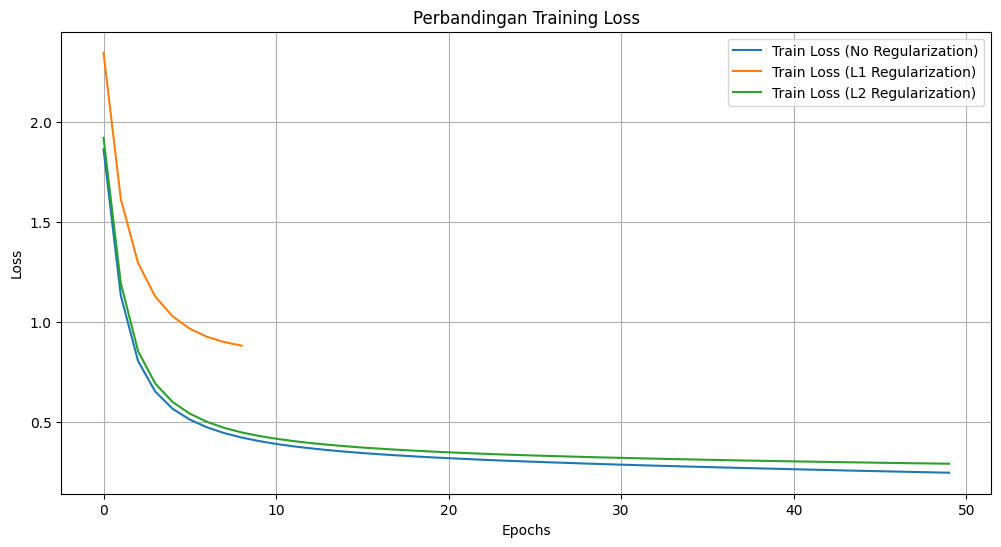

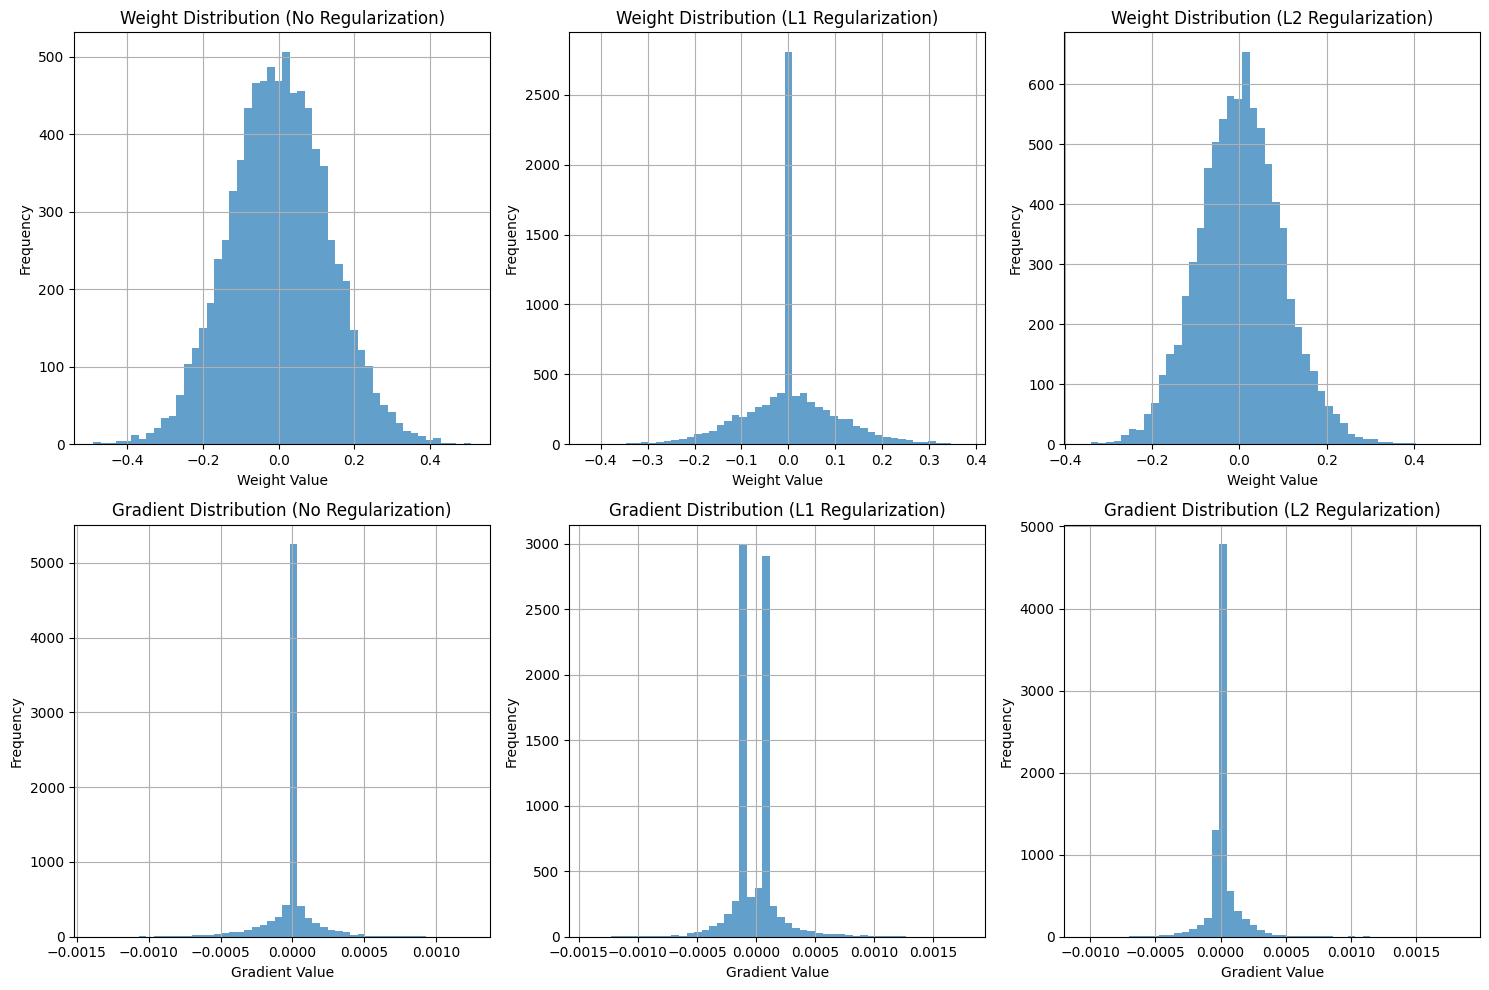

In [ ]:
regularization_results = {}
regularization_histories = {}
regularization_models = {}

reg_configs = [
    {"name": "No Regularization", "l1": 0, "l2": 0},
    {"name": "L1 Regularization", "l1": 0.0001, "l2": 0},
    {"name": "L2 Regularization", "l1": 0, "l2": 0.0001}
]

for config in reg_configs:
    print(f"\nTraining model with {config['name']}")
    
    model = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "relu", "relu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )
    
    history = model.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        l1_lambda=config["l1"],
        l2_lambda=config["l2"],
        verbose=1,
        early_stopping_patience=3,
    )
    
    pred = model.forward(X_test)
    pred_classes = np.argmax(pred, axis=1)
    accuracy = np.mean(pred_classes == y_test)

    regularization_results[config["name"]] = accuracy
    regularization_histories[config["name"]] = history
    regularization_models[config["name"]] = model
    
    print(f"Test Accuracy ({config['name']}): {accuracy:.4f}\n")

# Plot perbandingan loss
plt.figure(figsize=(12, 6))
for name, history in regularization_histories.items():
    plt.plot(history["train_loss"], label=f"Train Loss ({name})")

plt.title("Perbandingan Training Loss dengan Berbagai Teknik Regularisasi")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for name, model in regularization_models.items():
    print(f"\nWeight Distribution for {name}:")
    model.plot_weight_distribution([0, 1, 2])

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for name, model in regularization_models.items():
    print(f"\nGradient Distribution for {name}:")
    model.plot_gradient_distribution([0, 1, 2])

plt.figure(figsize=(15, 10))

# Weight distributions (top row)
for i, (name, model) in enumerate(regularization_models.items()):
    plt.subplot(2, 3, i+1)
    plt.title(f"Weight Distribution ({name})")
    plt.hist(
        model.layers[1].parameters['weights'].flatten(), 
        bins=50, alpha=0.7
    )
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
    plt.grid()

# Gradient distributions (bottom row)
for i, (name, model) in enumerate(regularization_models.items()):
    plt.subplot(2, 3, i+4)
    plt.title(f"Gradient Distribution ({name})")
    plt.hist(
        model.layers[1].gradients['weights'].flatten(), 
        bins=50, alpha=0.7
    )
    plt.xlabel("Gradient Value")
    plt.ylabel("Frequency")
    plt.grid()

plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for name, accuracy in regularization_results.items():
    print(f"{name}: {accuracy:.4f}")

## Eksperimen RMSNorm


Training model with No Normalization


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 2411.22it/s]


Epoch 1/50, Train Loss: 2.0037, Val Loss: 1.5321, Val Acc: 0.6641


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 2359.36it/s]


Epoch 2/50, Train Loss: 1.2325, Val Loss: 0.9940, Val Acc: 0.7729


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 2124.54it/s]


Epoch 3/50, Train Loss: 0.8458, Val Loss: 0.7413, Val Acc: 0.8182


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 2079.91it/s]


Epoch 4/50, Train Loss: 0.6623, Val Loss: 0.6131, Val Acc: 0.8397


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 2127.71it/s]


Epoch 5/50, Train Loss: 0.5628, Val Loss: 0.5382, Val Acc: 0.8562


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 2314.27it/s]


Epoch 6/50, Train Loss: 0.5013, Val Loss: 0.4880, Val Acc: 0.8675


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 1889.91it/s]


Epoch 7/50, Train Loss: 0.4597, Val Loss: 0.4543, Val Acc: 0.8744


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 2117.39it/s]


Epoch 8/50, Train Loss: 0.4301, Val Loss: 0.4295, Val Acc: 0.8789


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 2381.24it/s]


Epoch 9/50, Train Loss: 0.4077, Val Loss: 0.4100, Val Acc: 0.8837


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 2347.13it/s]


Epoch 10/50, Train Loss: 0.3900, Val Loss: 0.3962, Val Acc: 0.8851


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 2289.05it/s]


Epoch 11/50, Train Loss: 0.3758, Val Loss: 0.3824, Val Acc: 0.8886


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 2234.08it/s]


Epoch 12/50, Train Loss: 0.3641, Val Loss: 0.3718, Val Acc: 0.8919


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 2081.50it/s]


Epoch 13/50, Train Loss: 0.3539, Val Loss: 0.3640, Val Acc: 0.8954


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 2167.89it/s]


Epoch 14/50, Train Loss: 0.3452, Val Loss: 0.3548, Val Acc: 0.8965


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 2299.91it/s]


Epoch 15/50, Train Loss: 0.3375, Val Loss: 0.3483, Val Acc: 0.8995


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 2312.59it/s]


Epoch 16/50, Train Loss: 0.3306, Val Loss: 0.3414, Val Acc: 0.9000


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 1910.97it/s]


Epoch 17/50, Train Loss: 0.3245, Val Loss: 0.3365, Val Acc: 0.9021


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 2378.63it/s]


Epoch 18/50, Train Loss: 0.3187, Val Loss: 0.3314, Val Acc: 0.9028


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 2330.64it/s]


Epoch 19/50, Train Loss: 0.3136, Val Loss: 0.3265, Val Acc: 0.9051


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 2386.99it/s]


Epoch 20/50, Train Loss: 0.3088, Val Loss: 0.3218, Val Acc: 0.9065


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 2275.68it/s]


Epoch 21/50, Train Loss: 0.3043, Val Loss: 0.3172, Val Acc: 0.9070


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 2053.91it/s]


Epoch 22/50, Train Loss: 0.3001, Val Loss: 0.3138, Val Acc: 0.9082


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 2340.20it/s]


Epoch 23/50, Train Loss: 0.2961, Val Loss: 0.3099, Val Acc: 0.9092


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 2166.14it/s]


Epoch 24/50, Train Loss: 0.2922, Val Loss: 0.3071, Val Acc: 0.9105


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 2224.89it/s]


Epoch 25/50, Train Loss: 0.2888, Val Loss: 0.3041, Val Acc: 0.9118


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 2388.69it/s]


Epoch 26/50, Train Loss: 0.2851, Val Loss: 0.3002, Val Acc: 0.9127


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 2282.19it/s]


Epoch 27/50, Train Loss: 0.2820, Val Loss: 0.2974, Val Acc: 0.9137


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 2332.47it/s]


Epoch 28/50, Train Loss: 0.2788, Val Loss: 0.2940, Val Acc: 0.9152


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 2374.00it/s]


Epoch 29/50, Train Loss: 0.2756, Val Loss: 0.2908, Val Acc: 0.9155


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 2277.66it/s]


Epoch 30/50, Train Loss: 0.2726, Val Loss: 0.2884, Val Acc: 0.9166


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 2367.42it/s]


Epoch 31/50, Train Loss: 0.2697, Val Loss: 0.2867, Val Acc: 0.9165


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 2304.37it/s]


Epoch 32/50, Train Loss: 0.2669, Val Loss: 0.2832, Val Acc: 0.9176


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 2228.38it/s]


Epoch 33/50, Train Loss: 0.2643, Val Loss: 0.2806, Val Acc: 0.9196


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 2318.46it/s]


Epoch 34/50, Train Loss: 0.2616, Val Loss: 0.2793, Val Acc: 0.9188


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 2317.93it/s]


Epoch 35/50, Train Loss: 0.2590, Val Loss: 0.2761, Val Acc: 0.9204


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 2034.59it/s]


Epoch 36/50, Train Loss: 0.2564, Val Loss: 0.2738, Val Acc: 0.9215


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 2069.87it/s]


Epoch 37/50, Train Loss: 0.2541, Val Loss: 0.2716, Val Acc: 0.9220


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 2114.26it/s]


Epoch 38/50, Train Loss: 0.2516, Val Loss: 0.2697, Val Acc: 0.9214


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 2367.61it/s]


Epoch 39/50, Train Loss: 0.2493, Val Loss: 0.2674, Val Acc: 0.9220


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 2301.58it/s]


Epoch 40/50, Train Loss: 0.2470, Val Loss: 0.2655, Val Acc: 0.9237


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 2396.52it/s]


Epoch 41/50, Train Loss: 0.2448, Val Loss: 0.2633, Val Acc: 0.9231


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 2133.27it/s]


Epoch 42/50, Train Loss: 0.2425, Val Loss: 0.2605, Val Acc: 0.9244


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 2258.33it/s]


Epoch 43/50, Train Loss: 0.2404, Val Loss: 0.2591, Val Acc: 0.9243


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 2188.09it/s]


Epoch 44/50, Train Loss: 0.2383, Val Loss: 0.2576, Val Acc: 0.9246


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 1902.84it/s]


Epoch 45/50, Train Loss: 0.2362, Val Loss: 0.2552, Val Acc: 0.9259


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 2177.11it/s]


Epoch 46/50, Train Loss: 0.2341, Val Loss: 0.2528, Val Acc: 0.9256


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 2303.34it/s]


Epoch 47/50, Train Loss: 0.2320, Val Loss: 0.2518, Val Acc: 0.9265


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 2061.31it/s]


Epoch 48/50, Train Loss: 0.2302, Val Loss: 0.2500, Val Acc: 0.9270


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 2167.82it/s]


Epoch 49/50, Train Loss: 0.2284, Val Loss: 0.2475, Val Acc: 0.9275


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 2424.80it/s]


Epoch 50/50, Train Loss: 0.2264, Val Loss: 0.2459, Val Acc: 0.9278
Test Accuracy (No Normalization): 0.9306


Training model with RMSNorm


Epoch 1/50: 100%|██████████| 700/700 [00:00<00:00, 2195.56it/s]


Epoch 1/50, Train Loss: 1.9585, Val Loss: 1.4888, Val Acc: 0.6419


Epoch 2/50: 100%|██████████| 700/700 [00:00<00:00, 2188.48it/s]


Epoch 2/50, Train Loss: 1.2248, Val Loss: 1.0119, Val Acc: 0.7678


Epoch 3/50: 100%|██████████| 700/700 [00:00<00:00, 2271.74it/s]


Epoch 3/50, Train Loss: 0.8762, Val Loss: 0.7727, Val Acc: 0.8079


Epoch 4/50: 100%|██████████| 700/700 [00:00<00:00, 2365.33it/s]


Epoch 4/50, Train Loss: 0.6963, Val Loss: 0.6432, Val Acc: 0.8357


Epoch 5/50: 100%|██████████| 700/700 [00:00<00:00, 2214.40it/s]


Epoch 5/50, Train Loss: 0.5932, Val Loss: 0.5638, Val Acc: 0.8535


Epoch 6/50: 100%|██████████| 700/700 [00:00<00:00, 2131.78it/s]


Epoch 6/50, Train Loss: 0.5275, Val Loss: 0.5120, Val Acc: 0.8624


Epoch 7/50: 100%|██████████| 700/700 [00:00<00:00, 2272.35it/s]


Epoch 7/50, Train Loss: 0.4823, Val Loss: 0.4745, Val Acc: 0.8692


Epoch 8/50: 100%|██████████| 700/700 [00:00<00:00, 2260.41it/s]


Epoch 8/50, Train Loss: 0.4493, Val Loss: 0.4465, Val Acc: 0.8770


Epoch 9/50: 100%|██████████| 700/700 [00:00<00:00, 2242.18it/s]


Epoch 9/50, Train Loss: 0.4247, Val Loss: 0.4249, Val Acc: 0.8817


Epoch 10/50: 100%|██████████| 700/700 [00:00<00:00, 2290.26it/s]


Epoch 10/50, Train Loss: 0.4056, Val Loss: 0.4087, Val Acc: 0.8862


Epoch 11/50: 100%|██████████| 700/700 [00:00<00:00, 2277.28it/s]


Epoch 11/50, Train Loss: 0.3903, Val Loss: 0.3952, Val Acc: 0.8888


Epoch 12/50: 100%|██████████| 700/700 [00:00<00:00, 2269.23it/s]


Epoch 12/50, Train Loss: 0.3780, Val Loss: 0.3839, Val Acc: 0.8917


Epoch 13/50: 100%|██████████| 700/700 [00:00<00:00, 2067.86it/s]


Epoch 13/50, Train Loss: 0.3671, Val Loss: 0.3746, Val Acc: 0.8931


Epoch 14/50: 100%|██████████| 700/700 [00:00<00:00, 2191.30it/s]


Epoch 14/50, Train Loss: 0.3582, Val Loss: 0.3668, Val Acc: 0.8948


Epoch 15/50: 100%|██████████| 700/700 [00:00<00:00, 2367.80it/s]


Epoch 15/50, Train Loss: 0.3502, Val Loss: 0.3591, Val Acc: 0.8971


Epoch 16/50: 100%|██████████| 700/700 [00:00<00:00, 2404.66it/s]


Epoch 16/50, Train Loss: 0.3431, Val Loss: 0.3532, Val Acc: 0.8977


Epoch 17/50: 100%|██████████| 700/700 [00:00<00:00, 2236.82it/s]


Epoch 17/50, Train Loss: 0.3368, Val Loss: 0.3483, Val Acc: 0.8988


Epoch 18/50: 100%|██████████| 700/700 [00:00<00:00, 2200.69it/s]


Epoch 18/50, Train Loss: 0.3312, Val Loss: 0.3422, Val Acc: 0.9012


Epoch 19/50: 100%|██████████| 700/700 [00:00<00:00, 2450.64it/s]


Epoch 19/50, Train Loss: 0.3260, Val Loss: 0.3370, Val Acc: 0.9027


Epoch 20/50: 100%|██████████| 700/700 [00:00<00:00, 2350.92it/s]


Epoch 20/50, Train Loss: 0.3212, Val Loss: 0.3328, Val Acc: 0.9034


Epoch 21/50: 100%|██████████| 700/700 [00:00<00:00, 2111.47it/s]


Epoch 21/50, Train Loss: 0.3165, Val Loss: 0.3292, Val Acc: 0.9046


Epoch 22/50: 100%|██████████| 700/700 [00:00<00:00, 2345.90it/s]


Epoch 22/50, Train Loss: 0.3123, Val Loss: 0.3250, Val Acc: 0.9054


Epoch 23/50: 100%|██████████| 700/700 [00:00<00:00, 2264.68it/s]


Epoch 23/50, Train Loss: 0.3084, Val Loss: 0.3213, Val Acc: 0.9068


Epoch 24/50: 100%|██████████| 700/700 [00:00<00:00, 1768.40it/s]


Epoch 24/50, Train Loss: 0.3046, Val Loss: 0.3177, Val Acc: 0.9085


Epoch 25/50: 100%|██████████| 700/700 [00:00<00:00, 2151.83it/s]


Epoch 25/50, Train Loss: 0.3011, Val Loss: 0.3143, Val Acc: 0.9095


Epoch 26/50: 100%|██████████| 700/700 [00:00<00:00, 2381.52it/s]


Epoch 26/50, Train Loss: 0.2977, Val Loss: 0.3114, Val Acc: 0.9096


Epoch 27/50: 100%|██████████| 700/700 [00:00<00:00, 2245.61it/s]


Epoch 27/50, Train Loss: 0.2945, Val Loss: 0.3085, Val Acc: 0.9104


Epoch 28/50: 100%|██████████| 700/700 [00:00<00:00, 2264.10it/s]


Epoch 28/50, Train Loss: 0.2911, Val Loss: 0.3064, Val Acc: 0.9099


Epoch 29/50: 100%|██████████| 700/700 [00:00<00:00, 2106.34it/s]


Epoch 29/50, Train Loss: 0.2883, Val Loss: 0.3025, Val Acc: 0.9121


Epoch 30/50: 100%|██████████| 700/700 [00:00<00:00, 1960.89it/s]


Epoch 30/50, Train Loss: 0.2853, Val Loss: 0.3002, Val Acc: 0.9121


Epoch 31/50: 100%|██████████| 700/700 [00:00<00:00, 1727.90it/s]


Epoch 31/50, Train Loss: 0.2825, Val Loss: 0.2972, Val Acc: 0.9128


Epoch 32/50: 100%|██████████| 700/700 [00:00<00:00, 1779.47it/s]


Epoch 32/50, Train Loss: 0.2797, Val Loss: 0.2952, Val Acc: 0.9146


Epoch 33/50: 100%|██████████| 700/700 [00:00<00:00, 1976.65it/s]


Epoch 33/50, Train Loss: 0.2771, Val Loss: 0.2926, Val Acc: 0.9146


Epoch 34/50: 100%|██████████| 700/700 [00:00<00:00, 2044.25it/s]


Epoch 34/50, Train Loss: 0.2744, Val Loss: 0.2902, Val Acc: 0.9154


Epoch 35/50: 100%|██████████| 700/700 [00:00<00:00, 2165.59it/s]


Epoch 35/50, Train Loss: 0.2719, Val Loss: 0.2882, Val Acc: 0.9168


Epoch 36/50: 100%|██████████| 700/700 [00:00<00:00, 1925.30it/s]


Epoch 36/50, Train Loss: 0.2694, Val Loss: 0.2860, Val Acc: 0.9174


Epoch 37/50: 100%|██████████| 700/700 [00:00<00:00, 2119.13it/s]


Epoch 37/50, Train Loss: 0.2670, Val Loss: 0.2837, Val Acc: 0.9173


Epoch 38/50: 100%|██████████| 700/700 [00:00<00:00, 2059.74it/s]


Epoch 38/50, Train Loss: 0.2646, Val Loss: 0.2810, Val Acc: 0.9190


Epoch 39/50: 100%|██████████| 700/700 [00:00<00:00, 2370.55it/s]


Epoch 39/50, Train Loss: 0.2623, Val Loss: 0.2791, Val Acc: 0.9193


Epoch 40/50: 100%|██████████| 700/700 [00:00<00:00, 2182.90it/s]


Epoch 40/50, Train Loss: 0.2599, Val Loss: 0.2773, Val Acc: 0.9199


Epoch 41/50: 100%|██████████| 700/700 [00:00<00:00, 2227.06it/s]


Epoch 41/50, Train Loss: 0.2579, Val Loss: 0.2749, Val Acc: 0.9203


Epoch 42/50: 100%|██████████| 700/700 [00:00<00:00, 2151.48it/s]


Epoch 42/50, Train Loss: 0.2556, Val Loss: 0.2736, Val Acc: 0.9212


Epoch 43/50: 100%|██████████| 700/700 [00:00<00:00, 2139.20it/s]


Epoch 43/50, Train Loss: 0.2535, Val Loss: 0.2716, Val Acc: 0.9222


Epoch 44/50: 100%|██████████| 700/700 [00:00<00:00, 1979.62it/s]


Epoch 44/50, Train Loss: 0.2512, Val Loss: 0.2694, Val Acc: 0.9223


Epoch 45/50: 100%|██████████| 700/700 [00:00<00:00, 2388.87it/s]


Epoch 45/50, Train Loss: 0.2492, Val Loss: 0.2676, Val Acc: 0.9239


Epoch 46/50: 100%|██████████| 700/700 [00:00<00:00, 2318.63it/s]


Epoch 46/50, Train Loss: 0.2471, Val Loss: 0.2651, Val Acc: 0.9233


Epoch 47/50: 100%|██████████| 700/700 [00:00<00:00, 1732.57it/s]


Epoch 47/50, Train Loss: 0.2452, Val Loss: 0.2632, Val Acc: 0.9247


Epoch 48/50: 100%|██████████| 700/700 [00:00<00:00, 2135.04it/s]


Epoch 48/50, Train Loss: 0.2432, Val Loss: 0.2613, Val Acc: 0.9257


Epoch 49/50: 100%|██████████| 700/700 [00:00<00:00, 1840.20it/s]


Epoch 49/50, Train Loss: 0.2411, Val Loss: 0.2599, Val Acc: 0.9254


Epoch 50/50: 100%|██████████| 700/700 [00:00<00:00, 2010.77it/s]


Epoch 50/50, Train Loss: 0.2392, Val Loss: 0.2582, Val Acc: 0.9264
Test Accuracy (RMSNorm): 0.9267



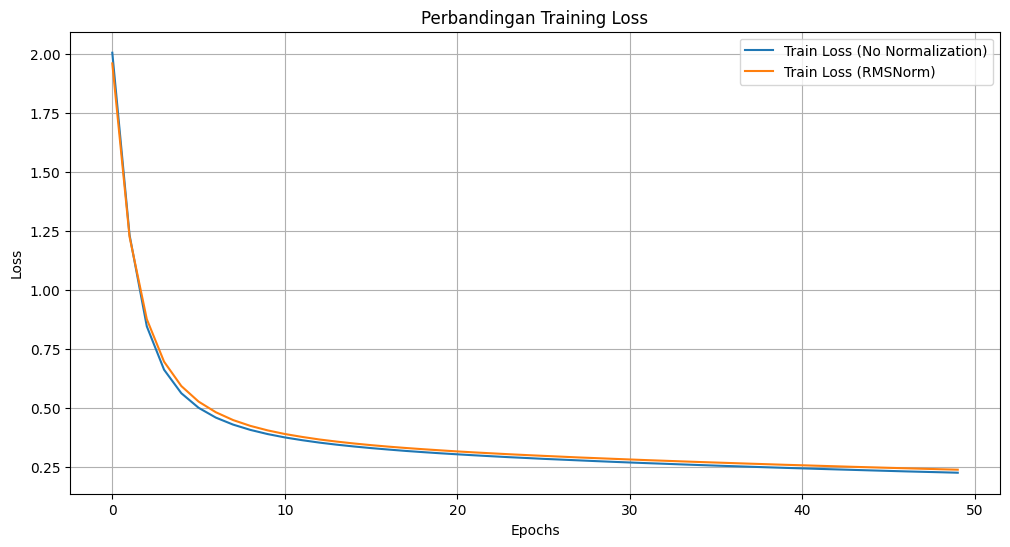

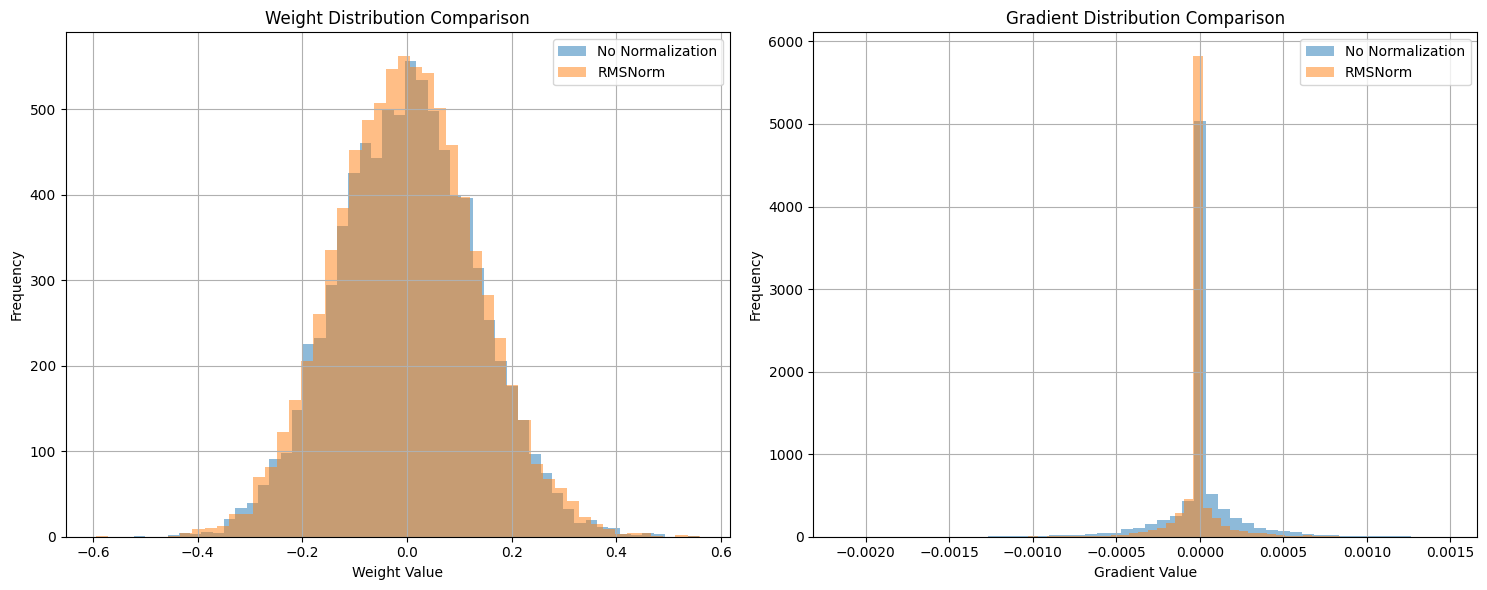

In [ ]:
normalization_results = {}
normalization_histories = {}
normalization_models = {}

norm_configs = [
    {"name": "No Normalization", "use_rmsnorm": False},
    {"name": "RMSNorm", "use_rmsnorm": True}
]

for config in norm_configs:
    print(f"\nTraining model with {config['name']}")
    
    model = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "relu", "relu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )
    
    history = model.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        use_rmsnorm=config["use_rmsnorm"],
        verbose=1,
        early_stopping_patience=3,
    )
    
    pred = model.forward(X_test)
    pred_classes = np.argmax(pred, axis=1)
    accuracy = np.mean(pred_classes == y_test)

    normalization_results[config["name"]] = accuracy
    normalization_histories[config["name"]] = history
    normalization_models[config["name"]] = model
    
    print(f"Test Accuracy ({config['name']}): {accuracy:.4f}\n")

# Plot perbandingan loss
plt.figure(figsize=(12, 6))
for name, history in normalization_histories.items():
    plt.plot(history["train_loss"], label=f"Train Loss ({name})")

plt.title("Perbandingan Training Loss dengan Teknik Normalisasi")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for name, model in normalization_models.items():
    print(f"\nWeight Distribution for {name}:")
    model.plot_weight_distribution([0, 1, 2])

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for name, model in normalization_models.items():
    print(f"\nGradient Distribution for {name}:")
    model.plot_gradient_distribution([0, 1, 2])

plt.figure(figsize=(15, 6))

# Plot perbandingan distribusi bobot
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison (Layer 1)")
for name, model in normalization_models.items():
    plt.hist(
        model.layers[1].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=name
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison (Layer 1)")
for name, model in normalization_models.items():
    plt.hist(
        model.layers[1].gradients['weights'].flatten(), 
        bins=50, alpha=0.5, label=name
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for name, accuracy in normalization_results.items():
    print(f"{name}: {accuracy:.4f}")